In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline

In [2]:
poke_df = pd.read_json("pokemon.json")

In [4]:
pd.set_option('display.max_columns', None)
poke_df.head()

pokedex_number           name  generation  status         species  \
0               1      Bulbasaur           1  Normal    Seed Pokémon   
1               2        Ivysaur           1  Normal    Seed Pokémon   
2               3       Venusaur           1  Normal    Seed Pokémon   
3               3  Mega Venusaur           1  Normal    Seed Pokémon   
4               4     Charmander           1  Normal  Lizard Pokémon   

   type_number type_1  height_m  weight_kg  abilities_number  ability_1  \
0            2  Grass       0.7        6.9                 2   Overgrow   
1            2  Grass       1.0       13.0                 2   Overgrow   
2            2  Grass       2.0      100.0                 2   Overgrow   
3            2  Grass       2.4      155.5                 1  Thick Fat   
4            1   Fire       0.6        8.5                 2      Blaze   

   total_points  hp  attack  defense  sp_attack  sp_defense  speed  \
0           318  45      49       49         65          65     45   
1           405  60      62       63         80          80     60   
2           525  80      82       83        100         100     80   
3           625  80     100      123        122         120     80   
4           309  39      52       43         60          50     65   

   catch_rate  growth_rate  egg_type_number egg_type_1  egg_cycles  \
0          45  Medium Slow                2      Grass          20   
1          45  Medium Slow                2      Grass          20   
2          45  Medium Slow                2      Grass          20   
3          45  Medium Slow                2      Grass          20   
4          45  Medium Slow                2     Dragon          20   

   against_normal  against_fire  against_water  against_electric  \
0             1.0           2.0            0.5               0.5   
1             1.0           2.0            0.5               0.5   
2             1.0           2.0            0.5               0.5   
3             1.0           1.0            0.5               0.5   
4             1.0           0.5            2.0               1.0   

   against_grass  against_ice  against_fight  against_poison  against_ground  \
0           0.25          2.0            0.5             1.0             1.0   
1           0.25          2.0            0.5             1.0             1.0   
2           0.25          2.0            0.5             1.0             1.0   
3           0.25          1.0            0.5             1.0             1.0   
4           0.50          0.5            1.0             1.0             2.0   

   against_flying  against_psychic  against_bug  against_rock  against_ghost  \
0             2.0              2.0          1.0           1.0            1.0   
1             2.0              2.0          1.0           1.0            1.0   
2             2.0              2.0          1.0           1.0            1.0   
3             2.0              2.0          1.0           1.0            1.0   
4             1.0              1.0          0.5           2.0            1.0   

   against_dragon  against_dark  against_steel  against_fairy  
0             1.0           1.0            1.0            0.5  
1             1.0           1.0            1.0            0.5  
2             1.0           1.0            1.0            0.5  
3             1.0           1.0            1.0            0.5  
4             1.0           1.0            0.5            0.5

In [ ]:
#I have to get dummies but here are the collumns i think need to be converted 

## LOOKING at the data before asking any questions

- the whole point of this project will be to use ML Models to predict what status new pokemon would fall into 

In [22]:
#im going to check for duplicates

poke_df.name.duplicated().sum()

0

In [8]:
poke_df.status.value_counts()

Normal           901
Sub Legendary     55
Legendary         39
Mythical          30
Name: status, dtype: int64

<AxesSubplot:>

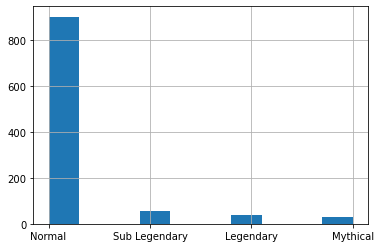

In [7]:
poke_df.status.hist()

- looks like there is alot of normal 

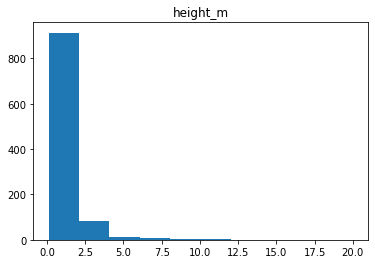

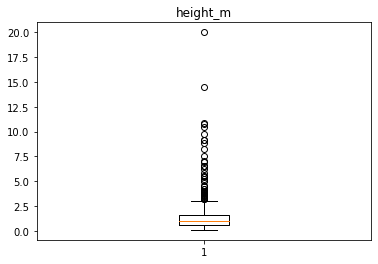

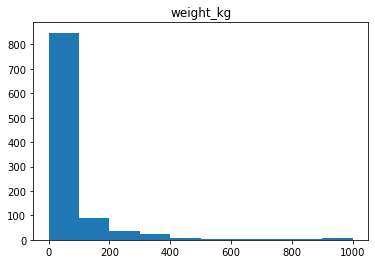

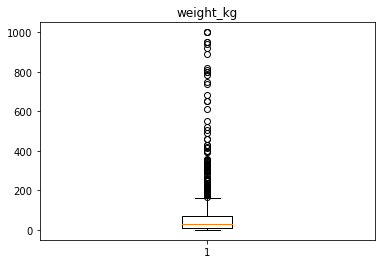

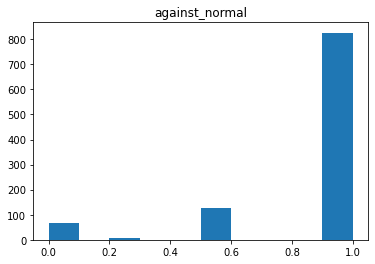

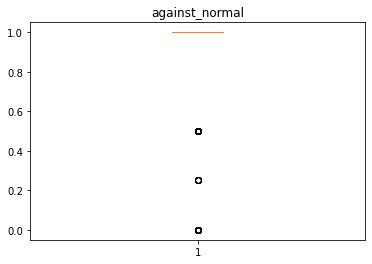

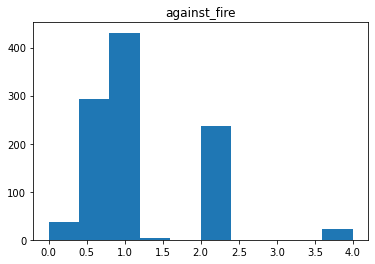

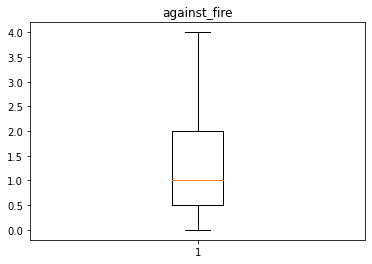

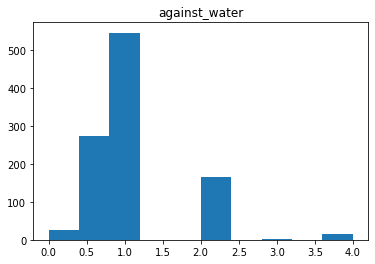

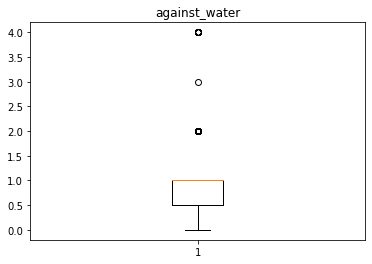

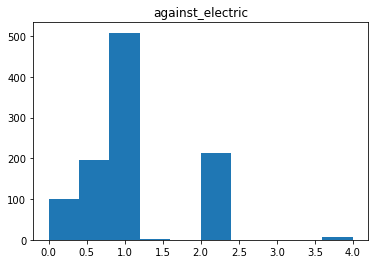

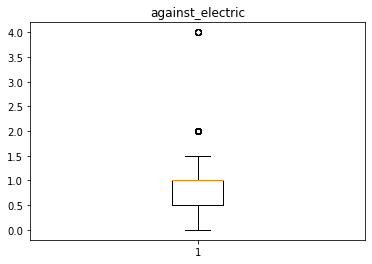

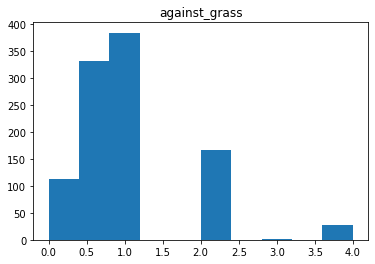

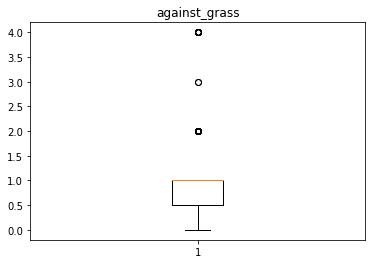

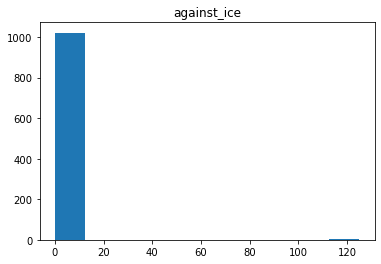

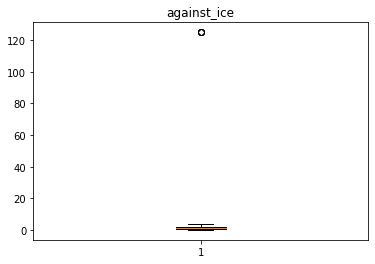

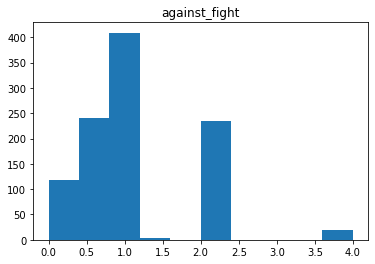

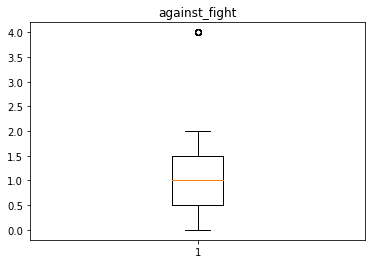

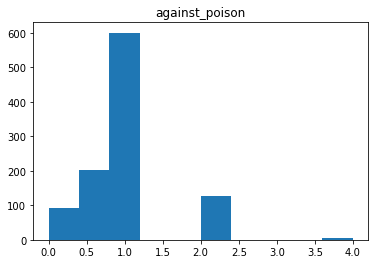

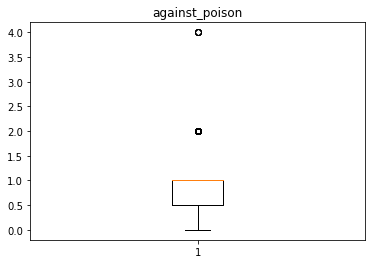

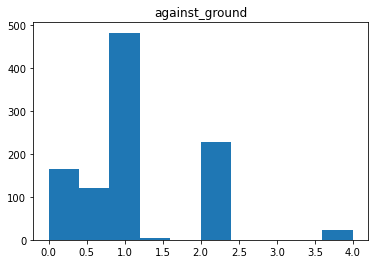

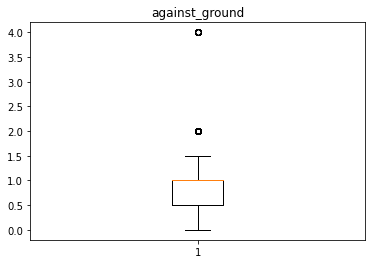

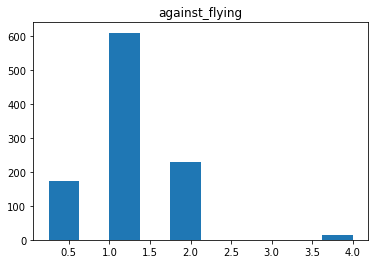

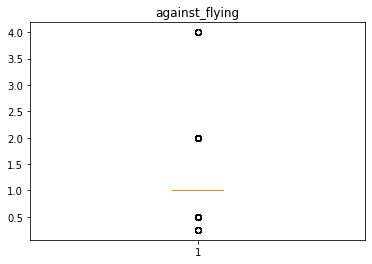

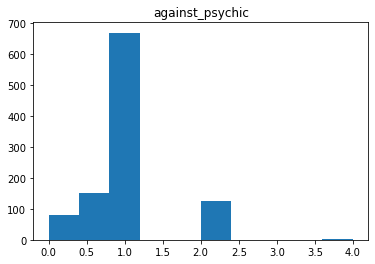

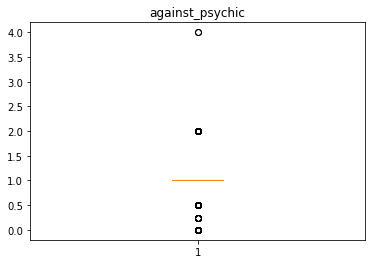

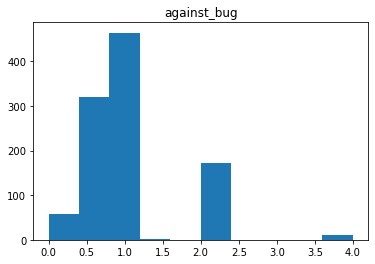

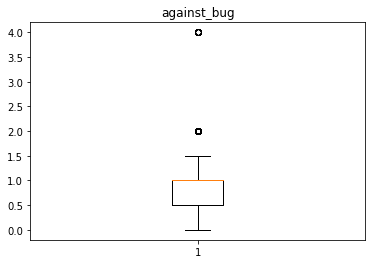

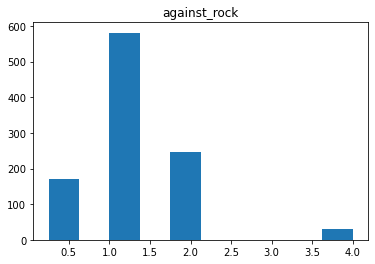

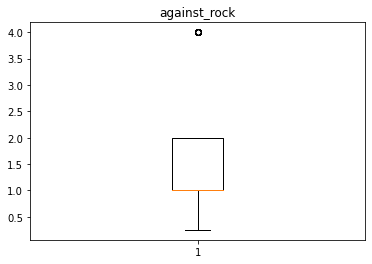

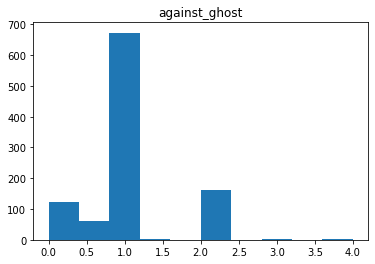

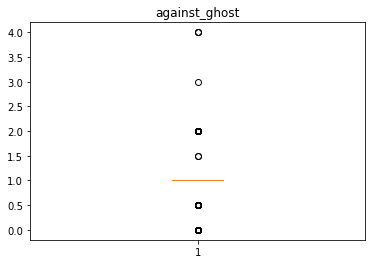

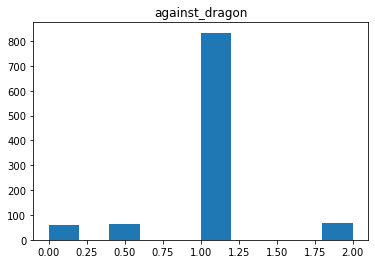

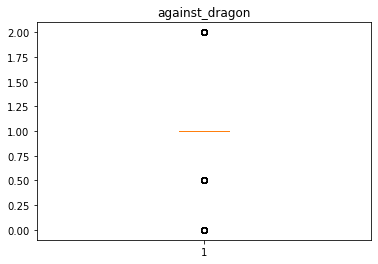

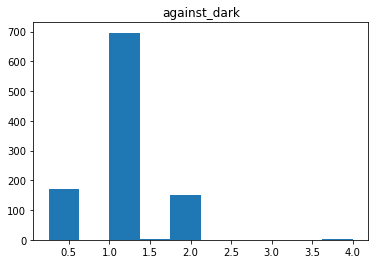

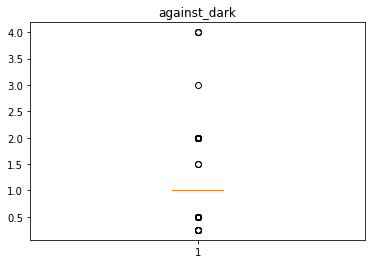

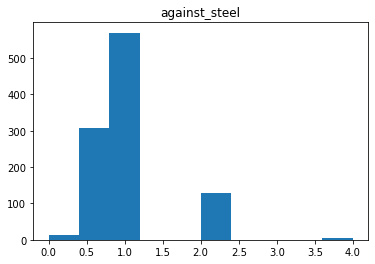

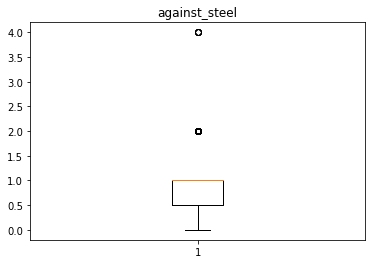

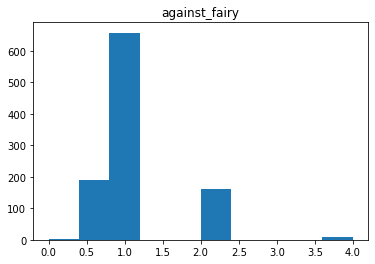

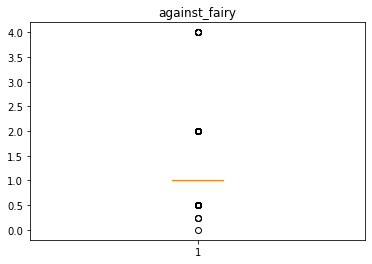

In [12]:
# Plot numeric columns
num_cols = poke_df.columns[[poke_df[col].dtype == 'float64' for col in poke_df.columns]]
for col in num_cols:
    plt.hist(poke_df[col])
    plt.title(col)
    plt.show()
    plt.boxplot(poke_df[col])
    plt.title(col)
    plt.show()

In [15]:
def column_hist_plots():
    for col in poke_df.drop(columns = 'generation').columns:
        plt.figure(figsize=(30,15))
        sns.set(font_scale=2.5)
        plt.xticks(rotation=45)
        sns.histplot(data = poke_df, x = col, hue = 'status')

/var/folders/f1/8blv52r50y1cffy2qpp05b5c0000gn/T/ipykernel_95871/2569458682.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(30,15))


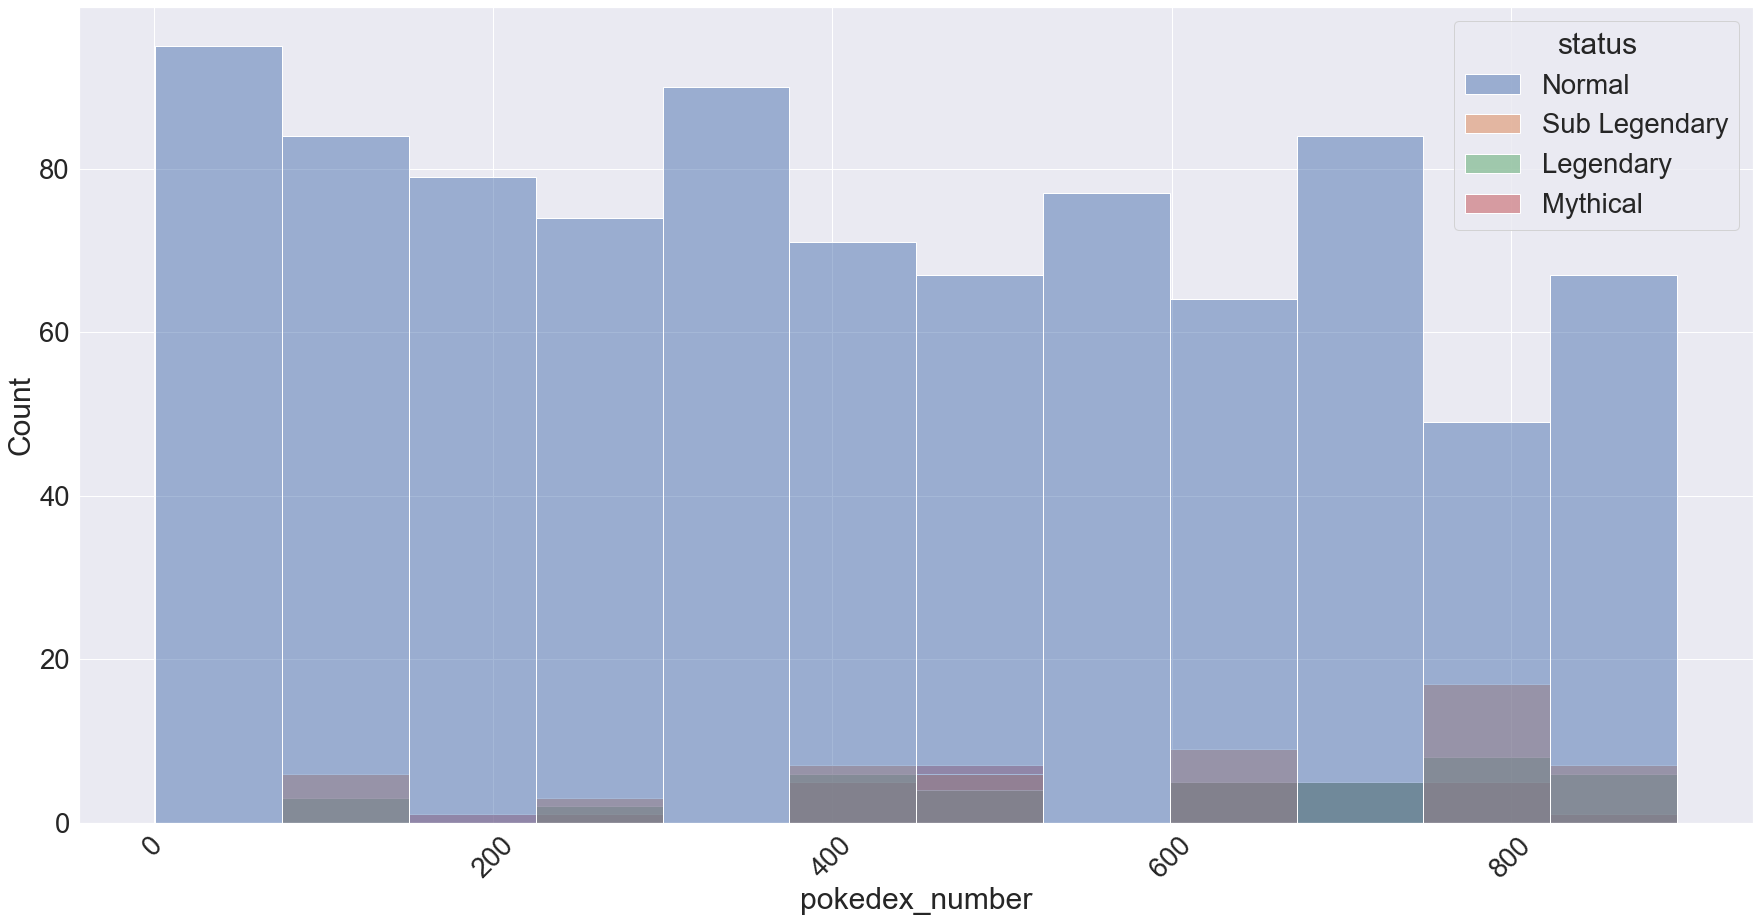

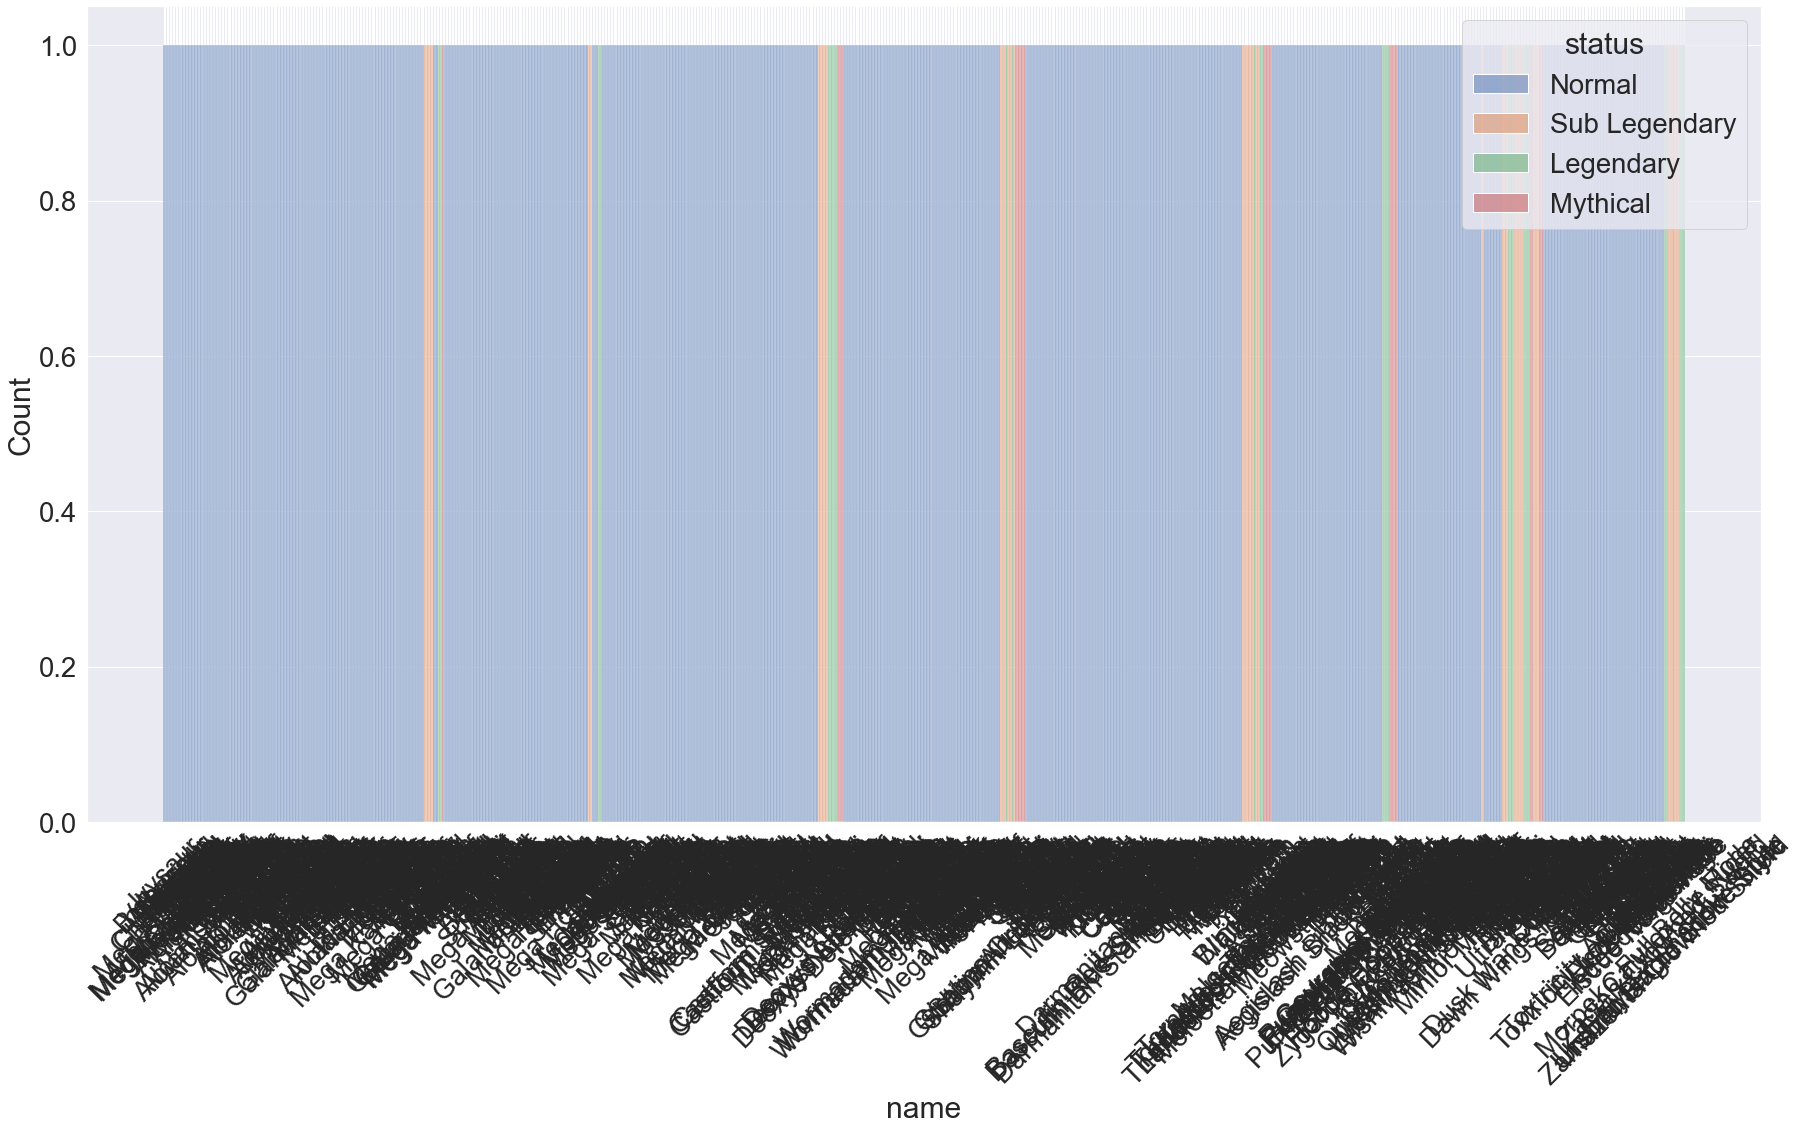

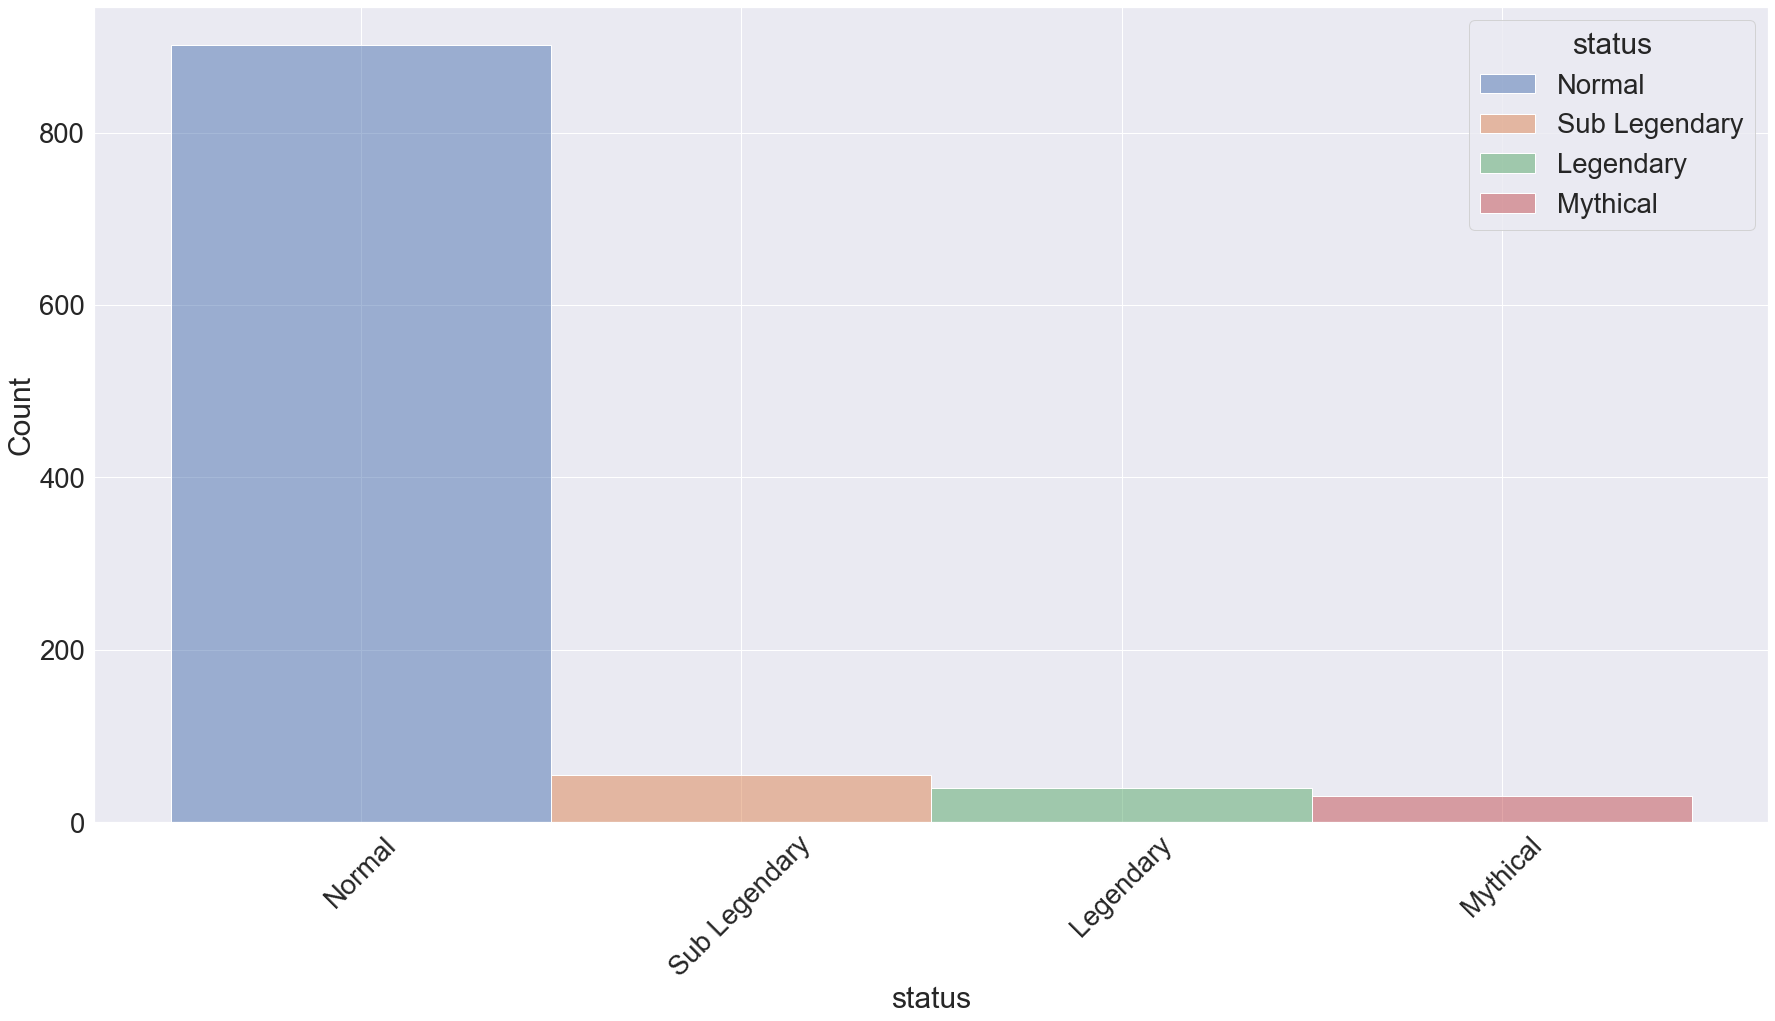

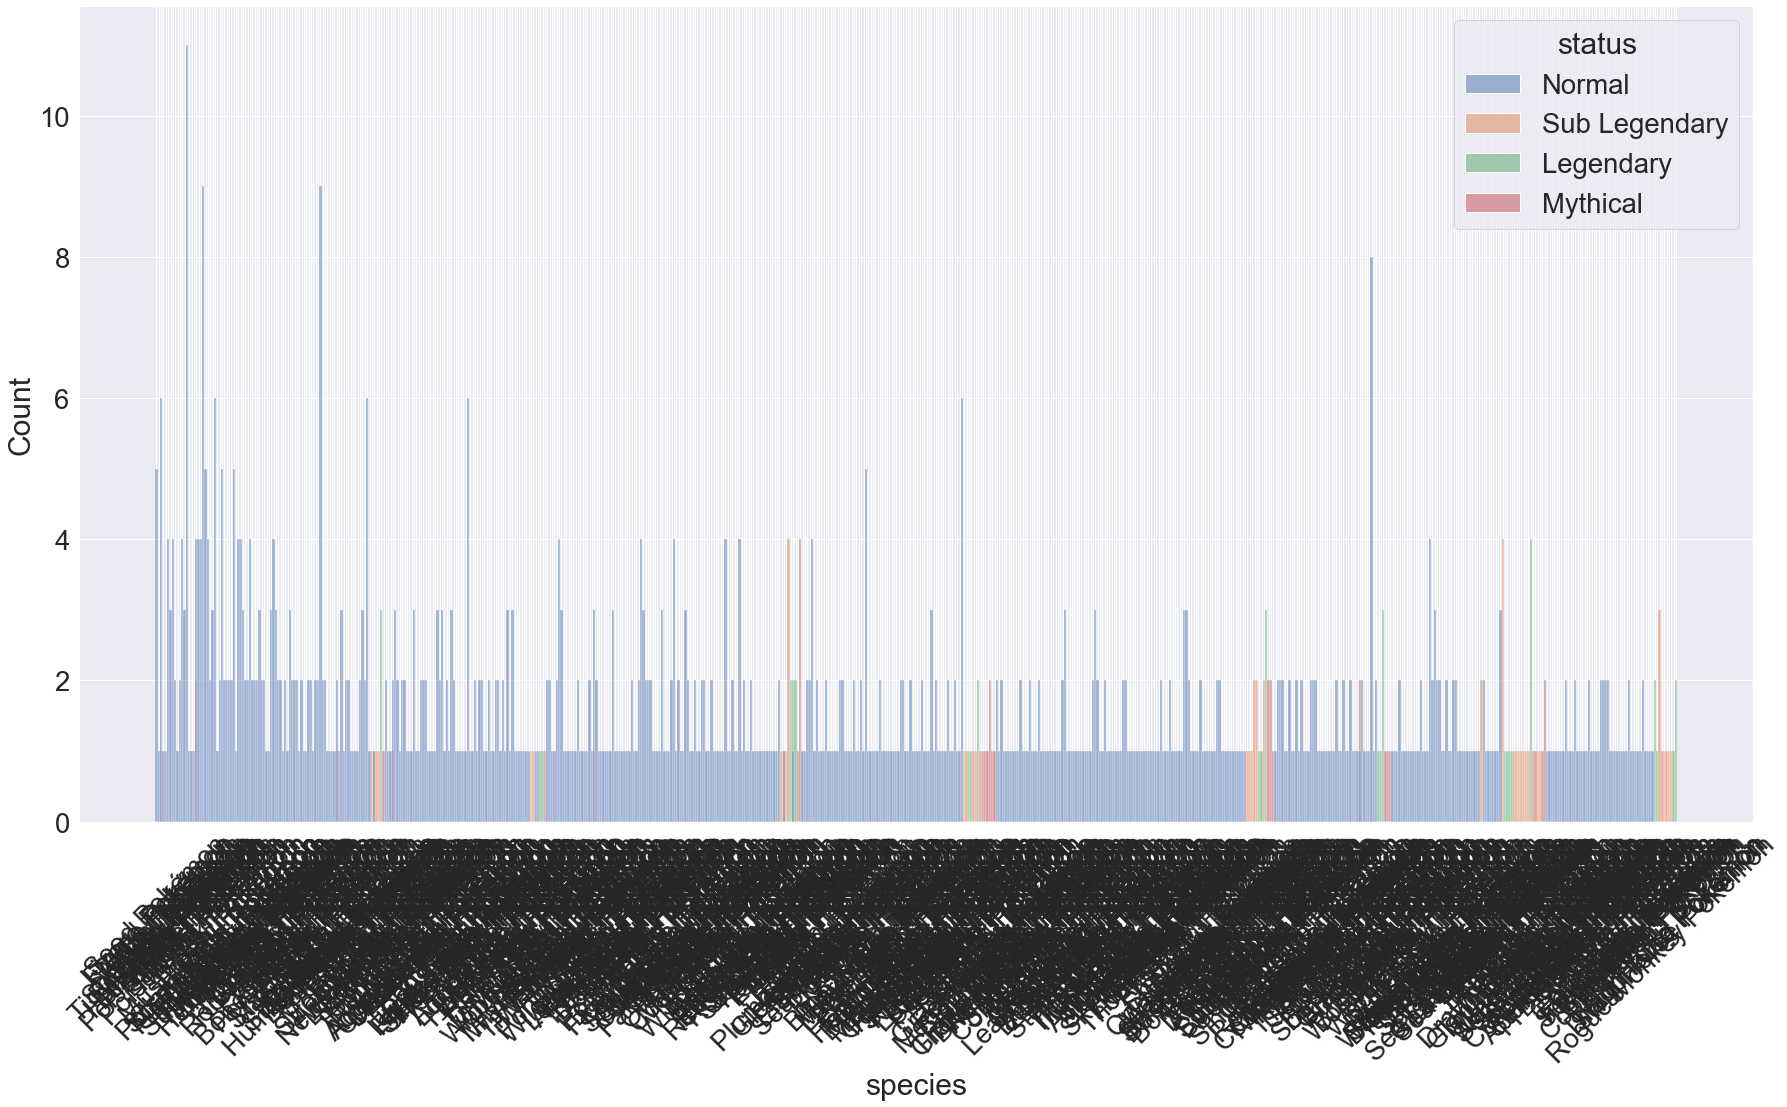

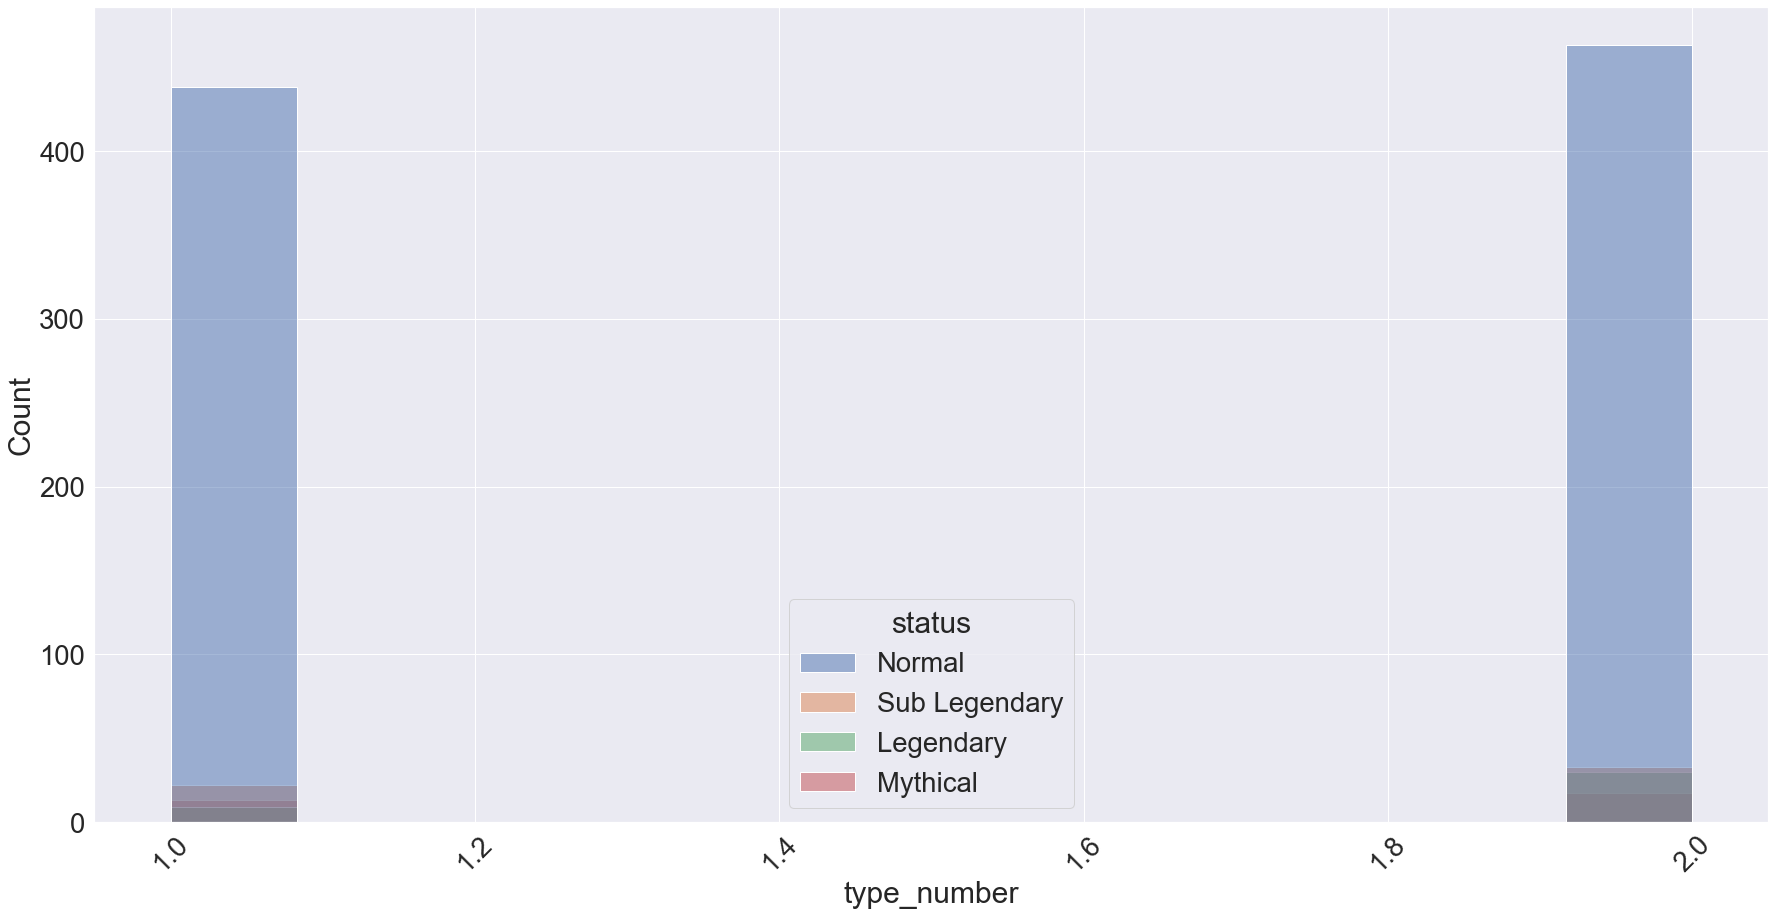

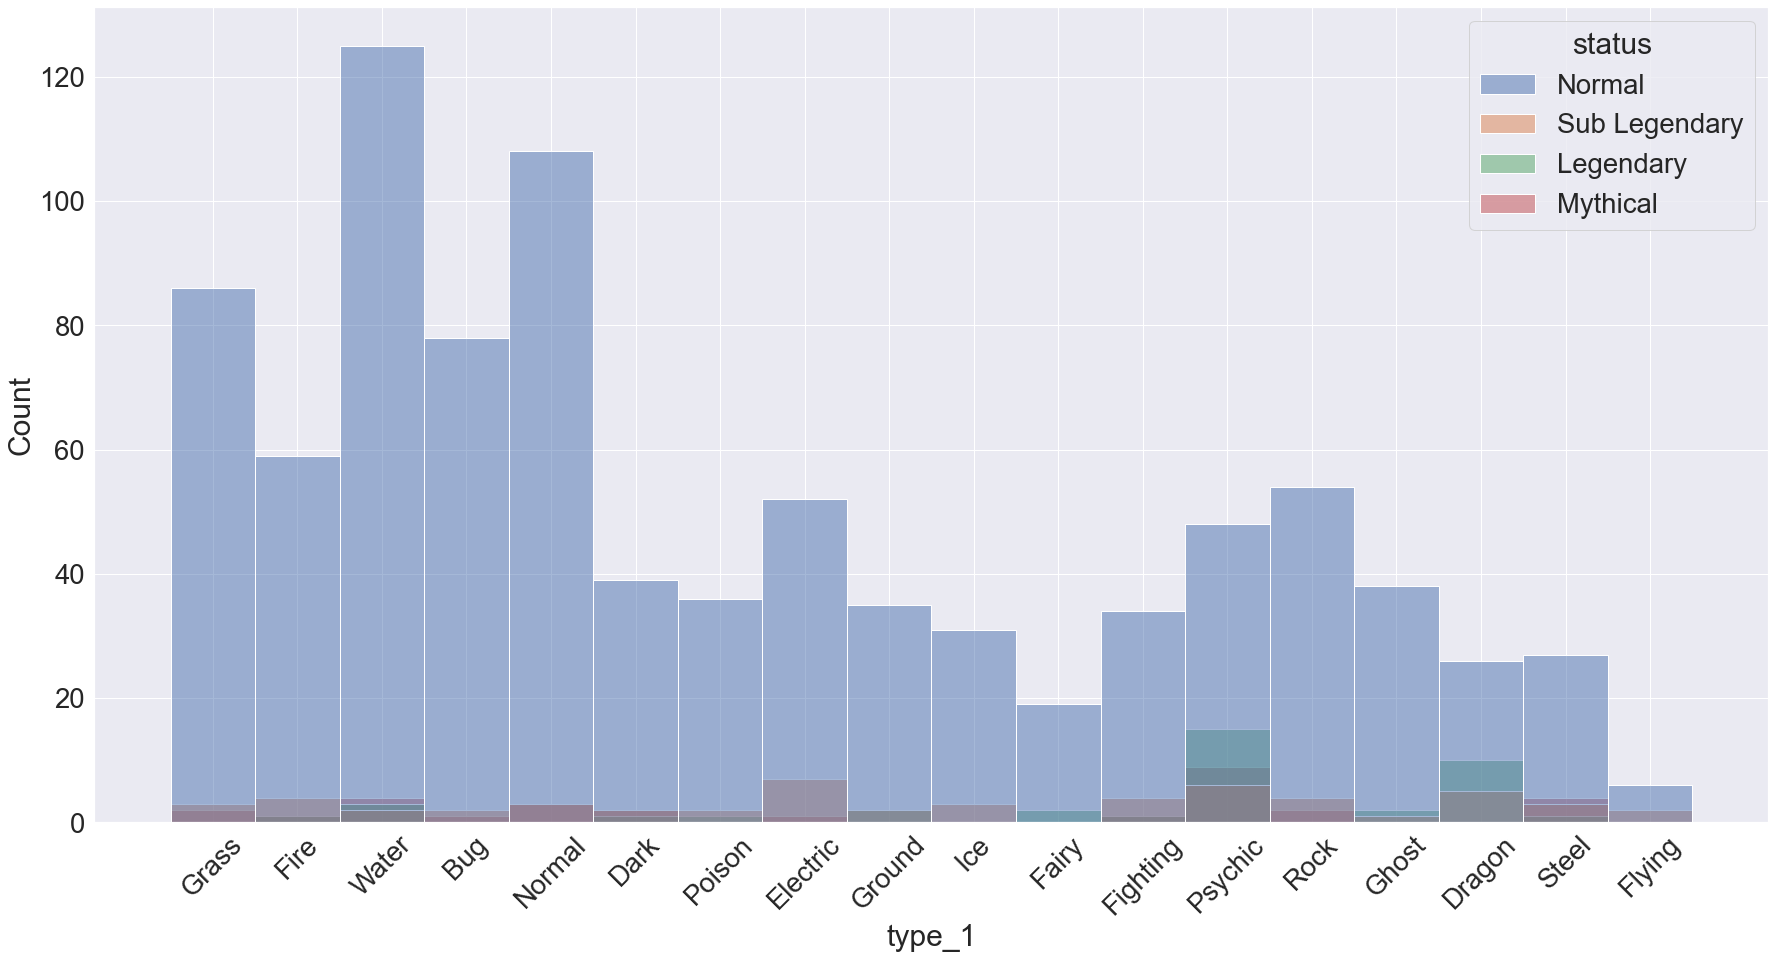

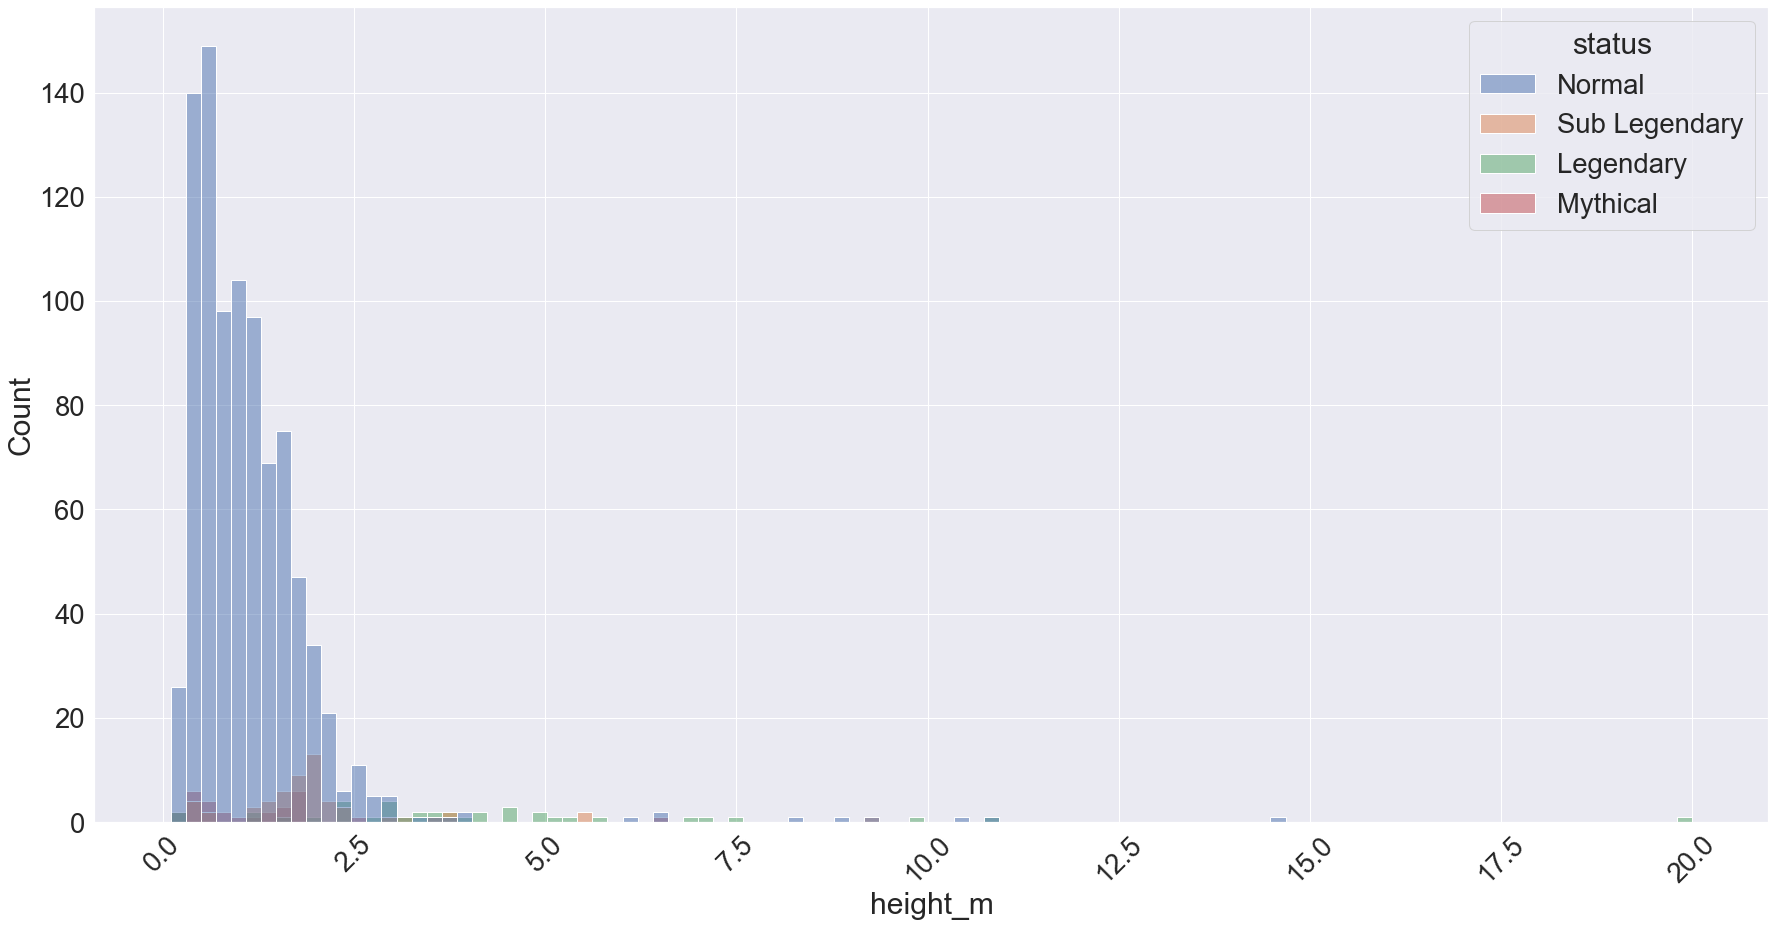

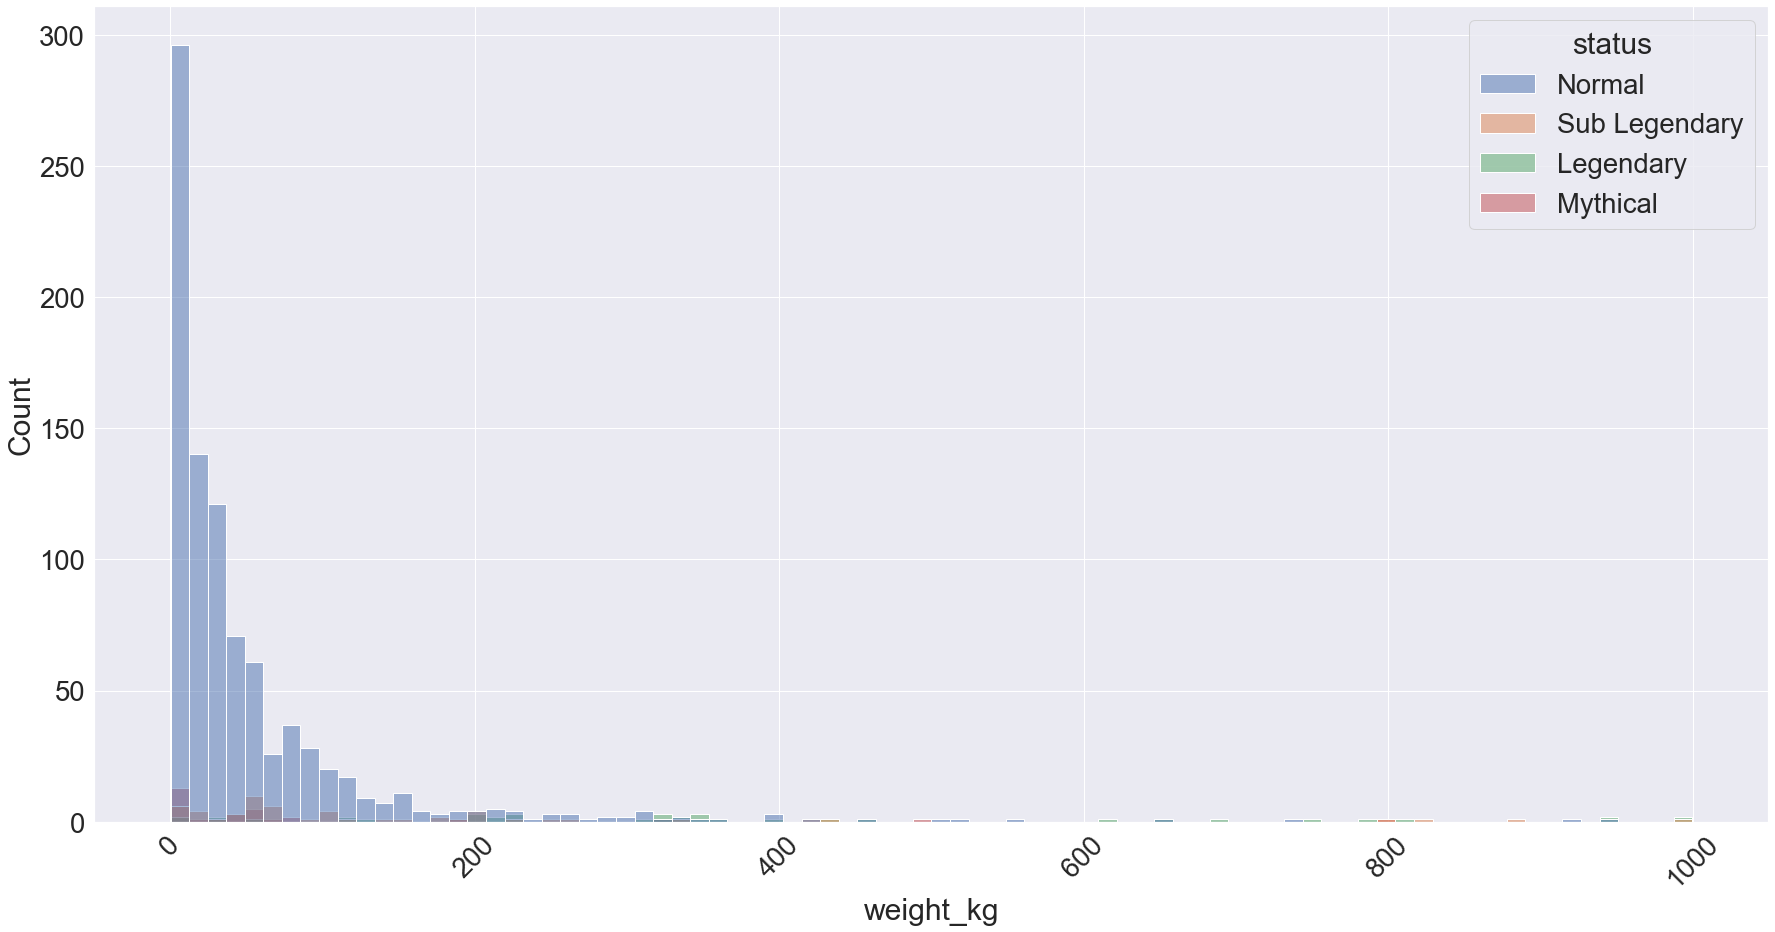

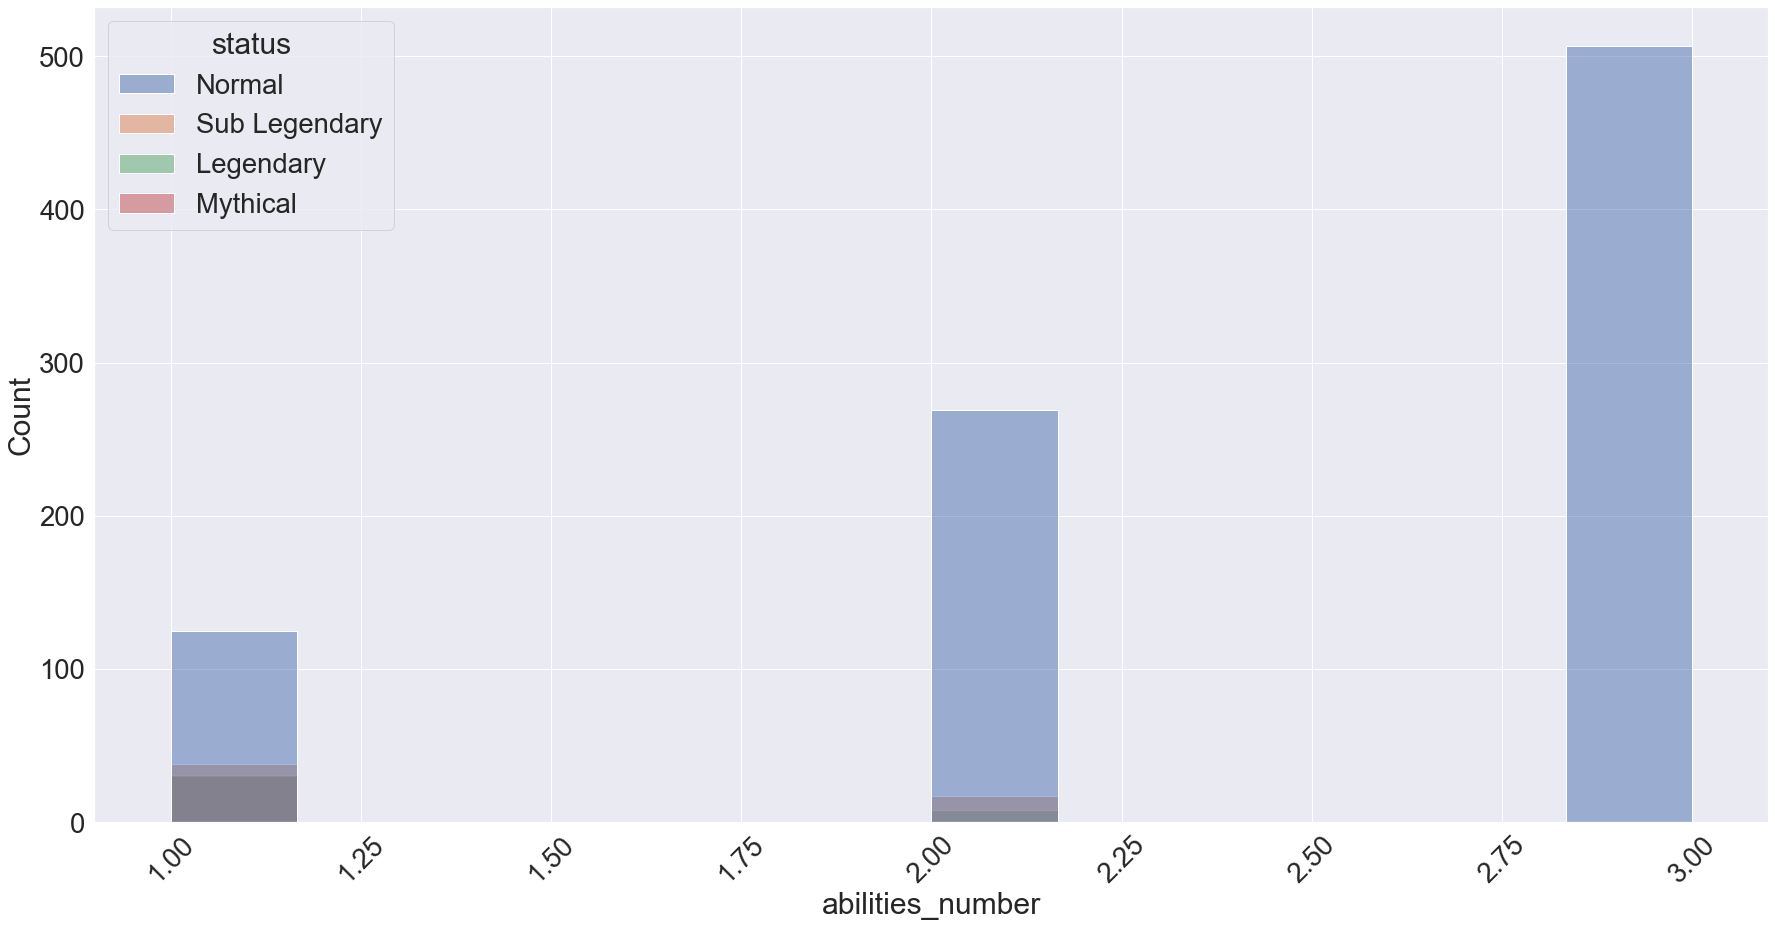

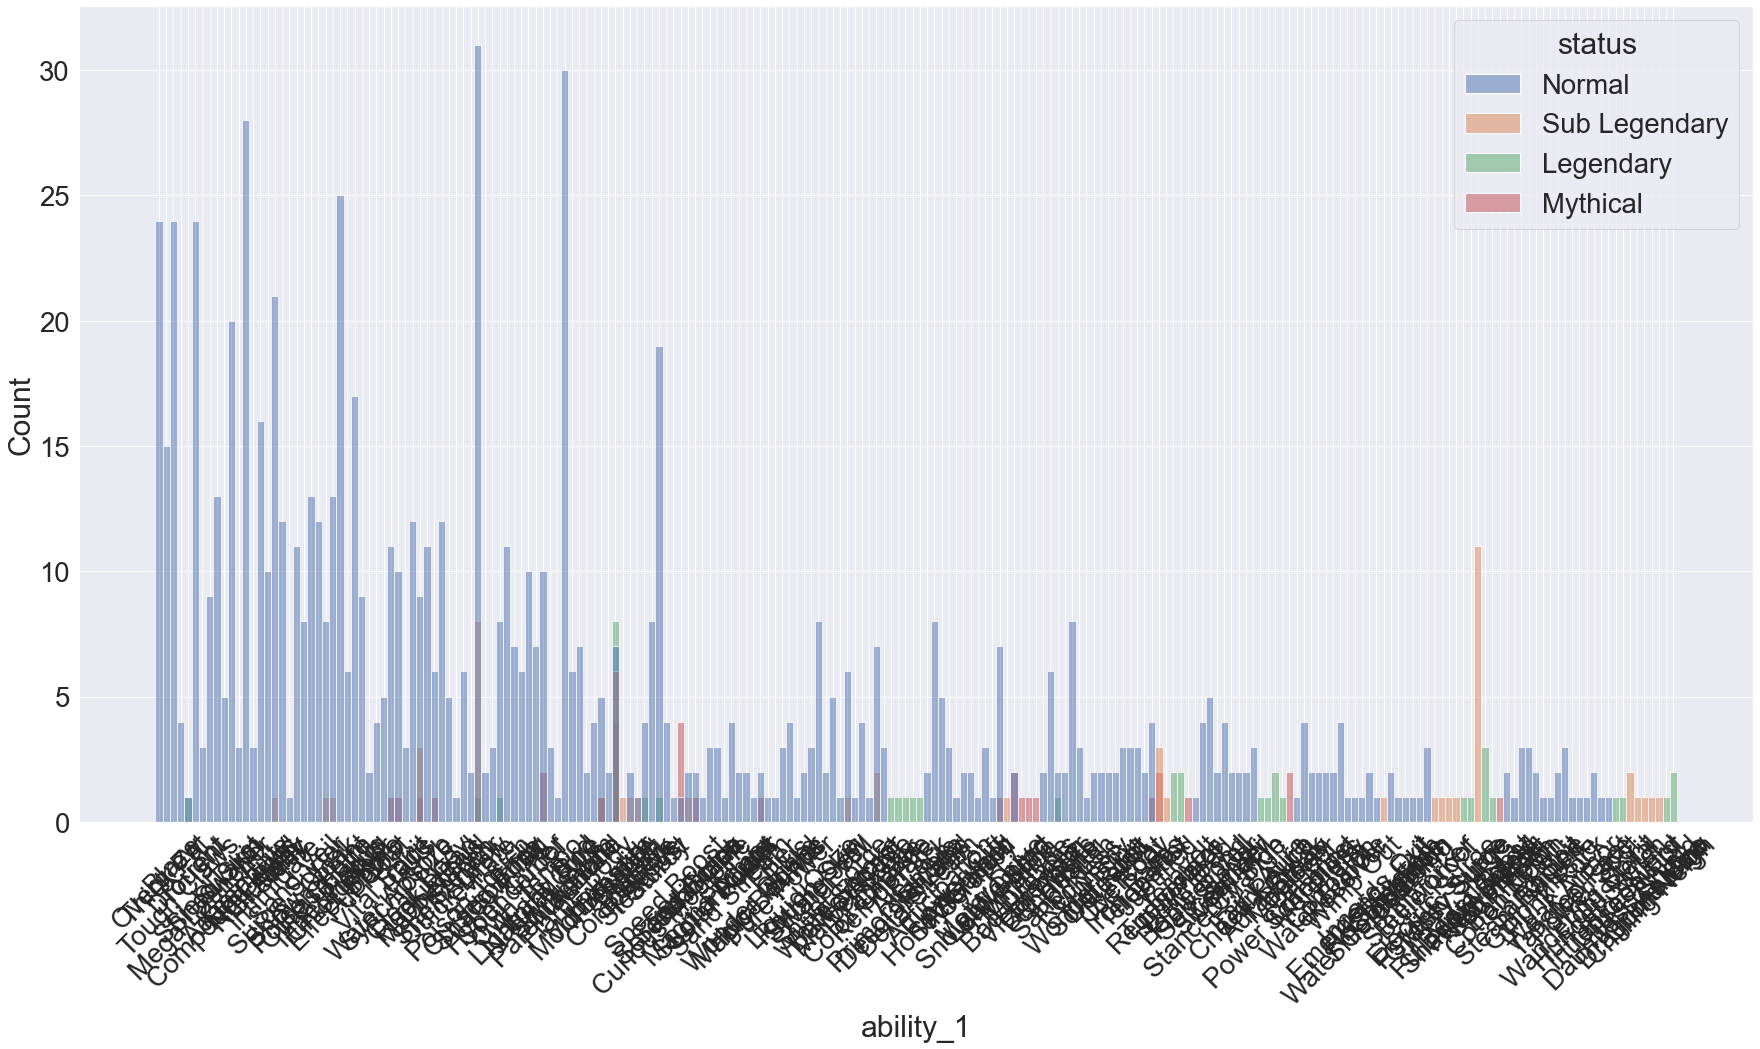

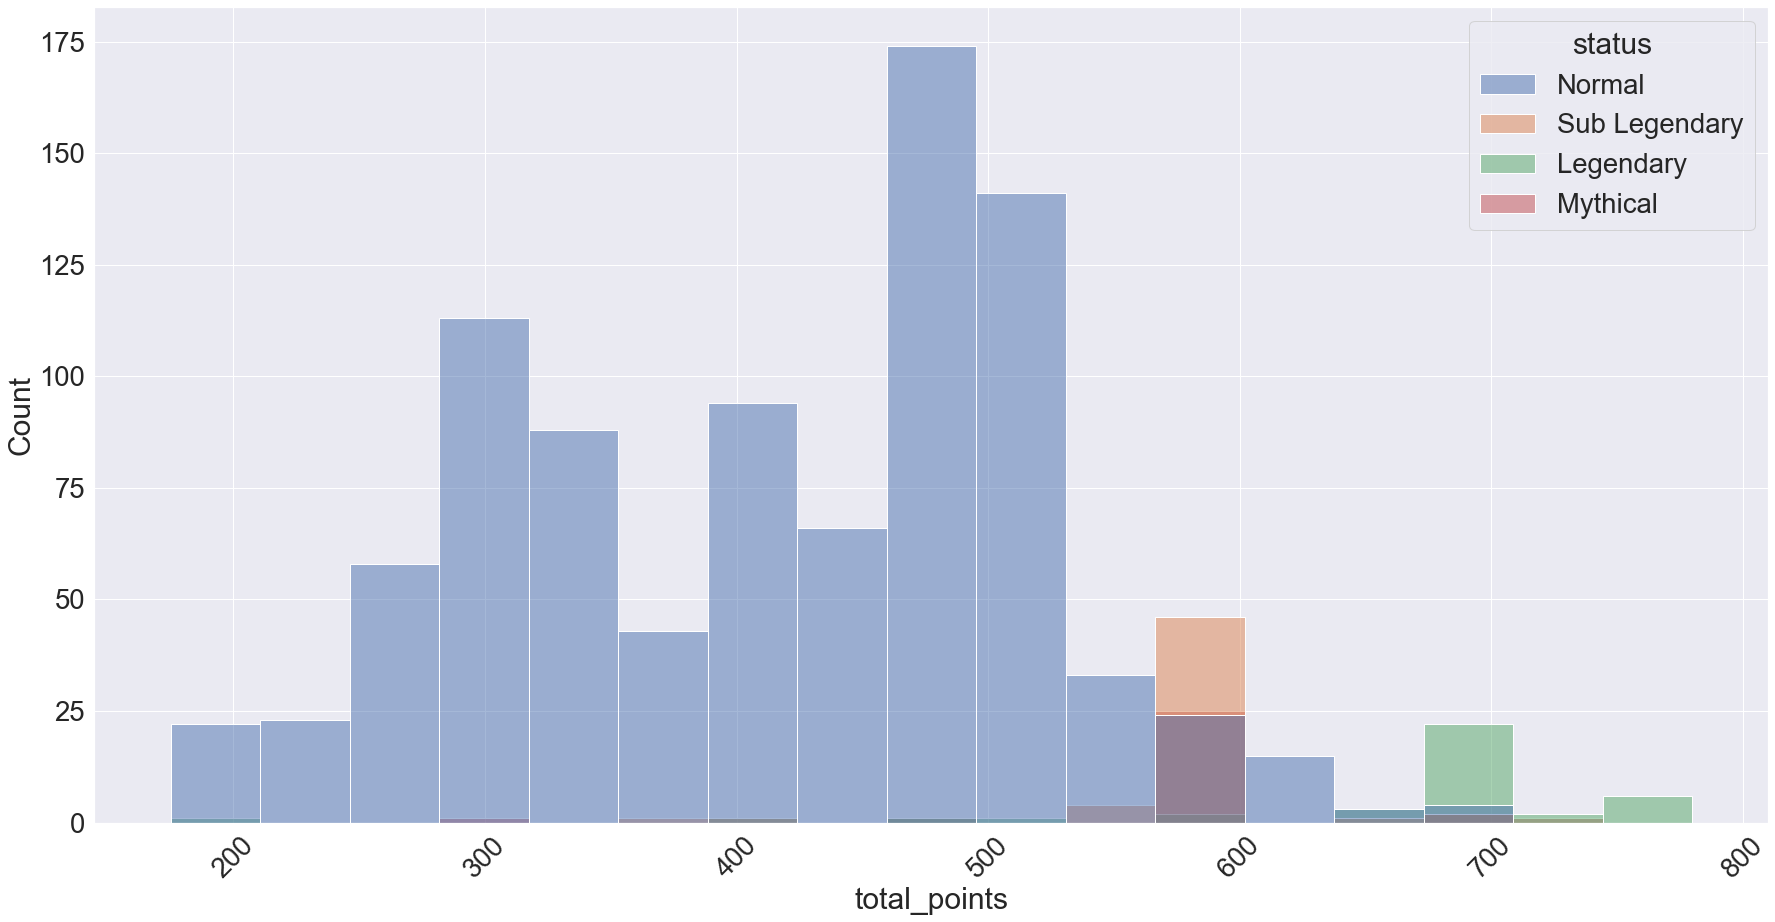

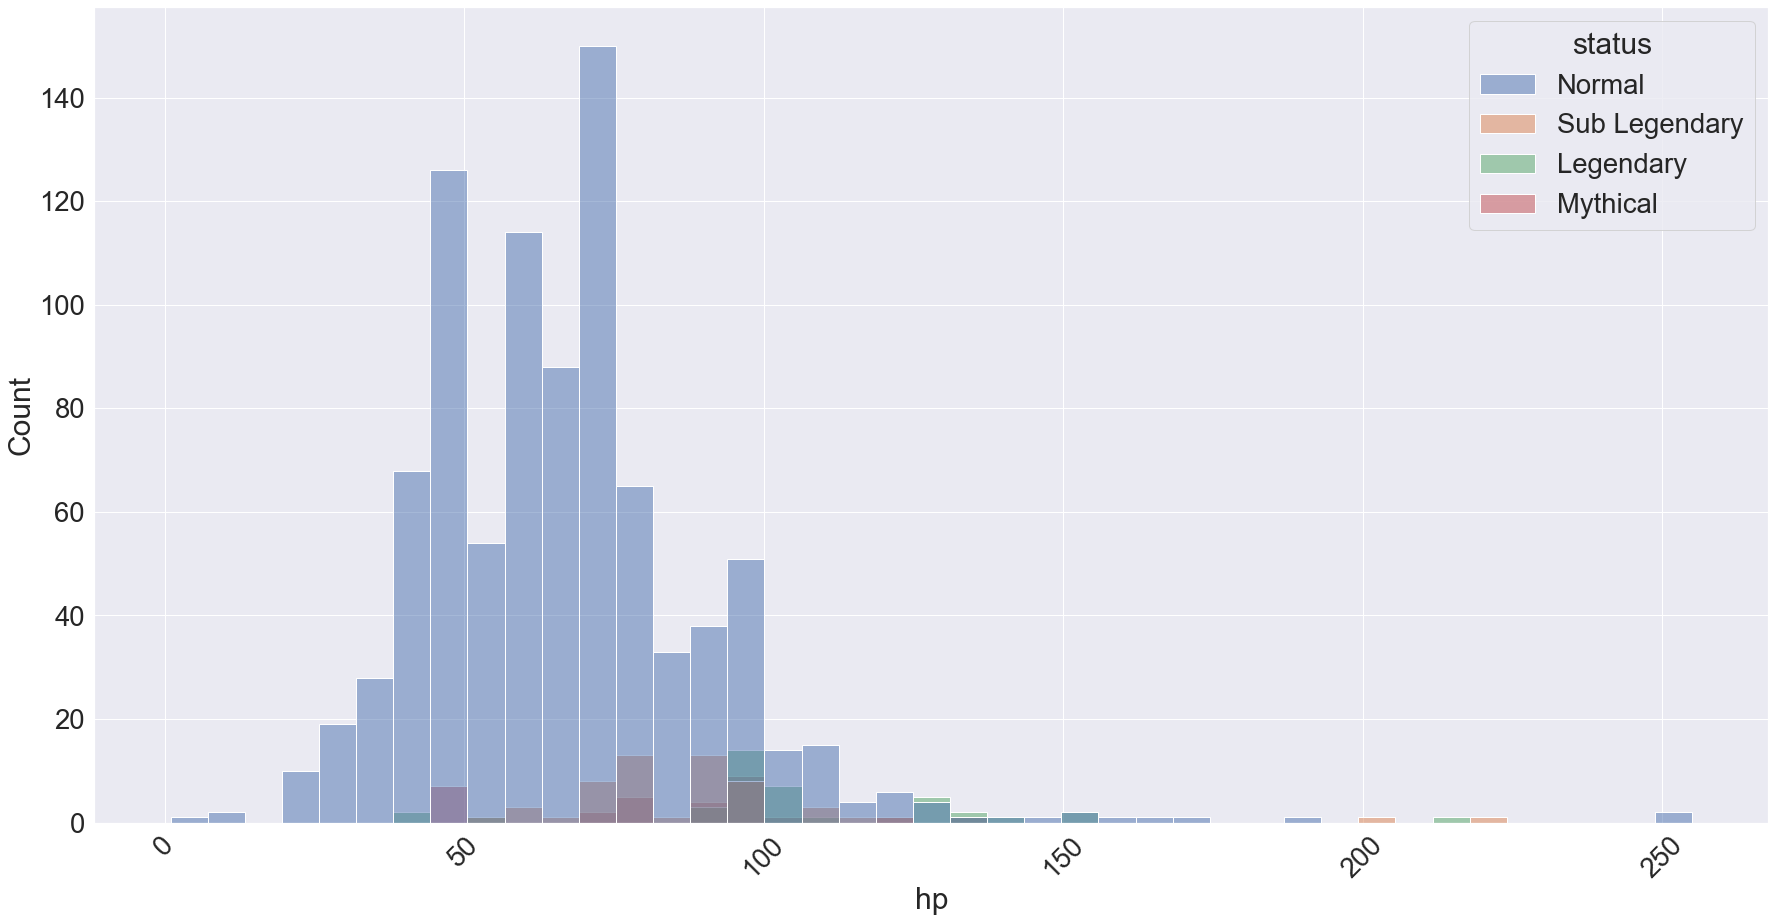

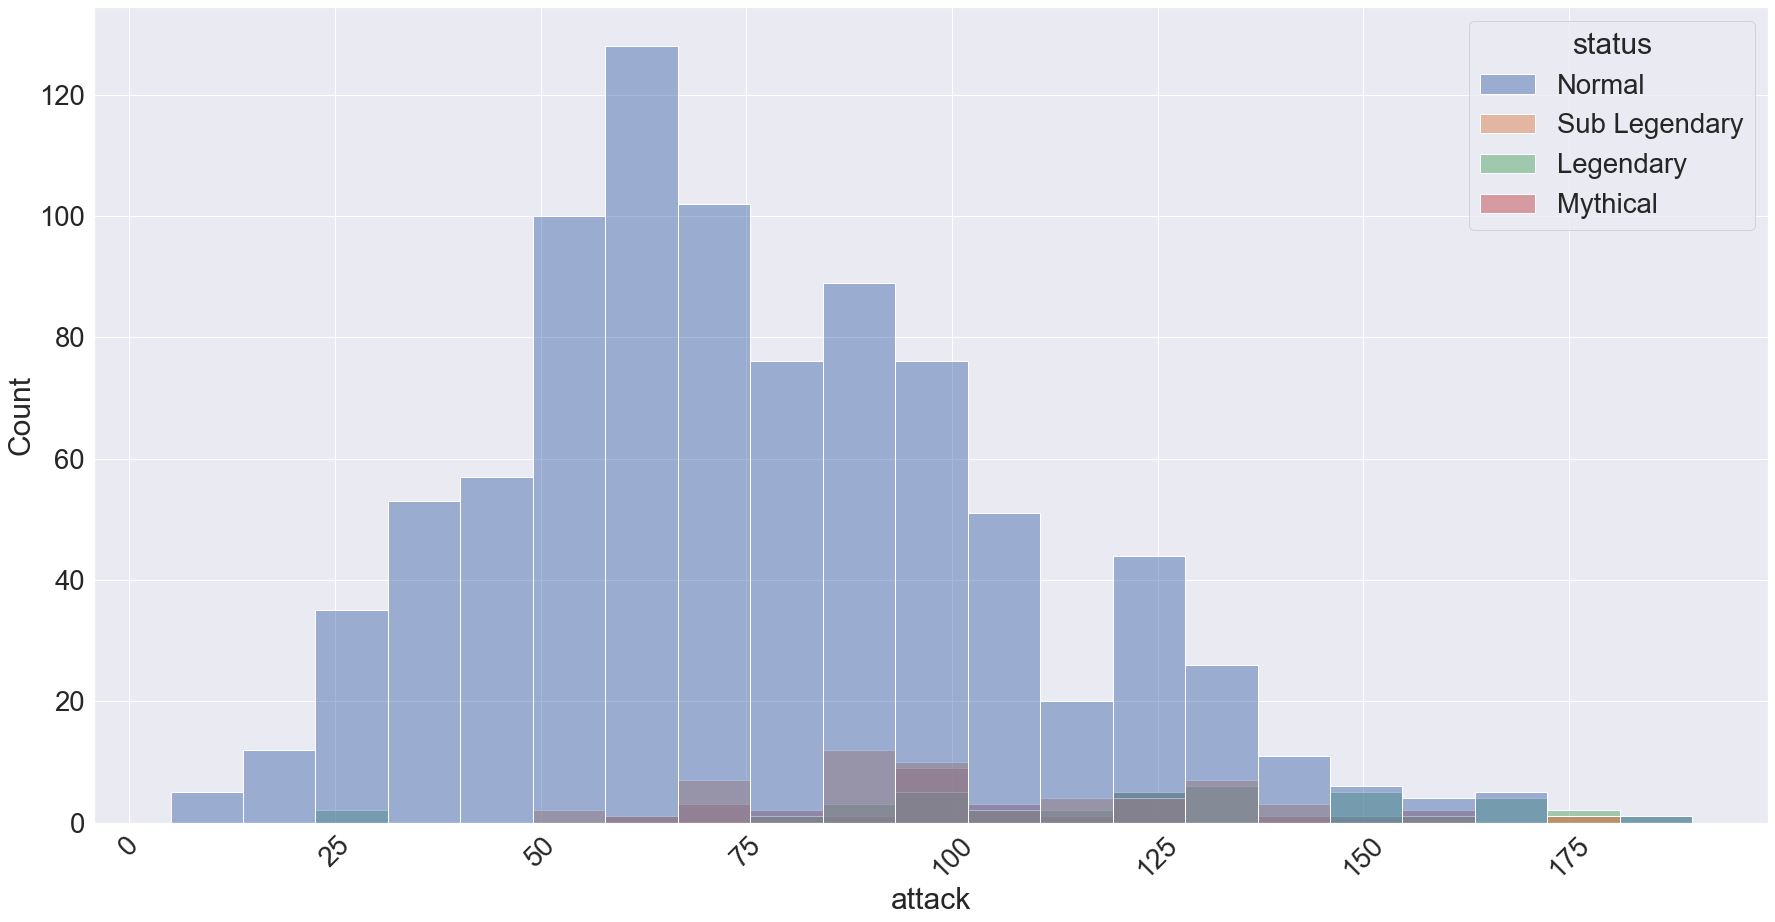

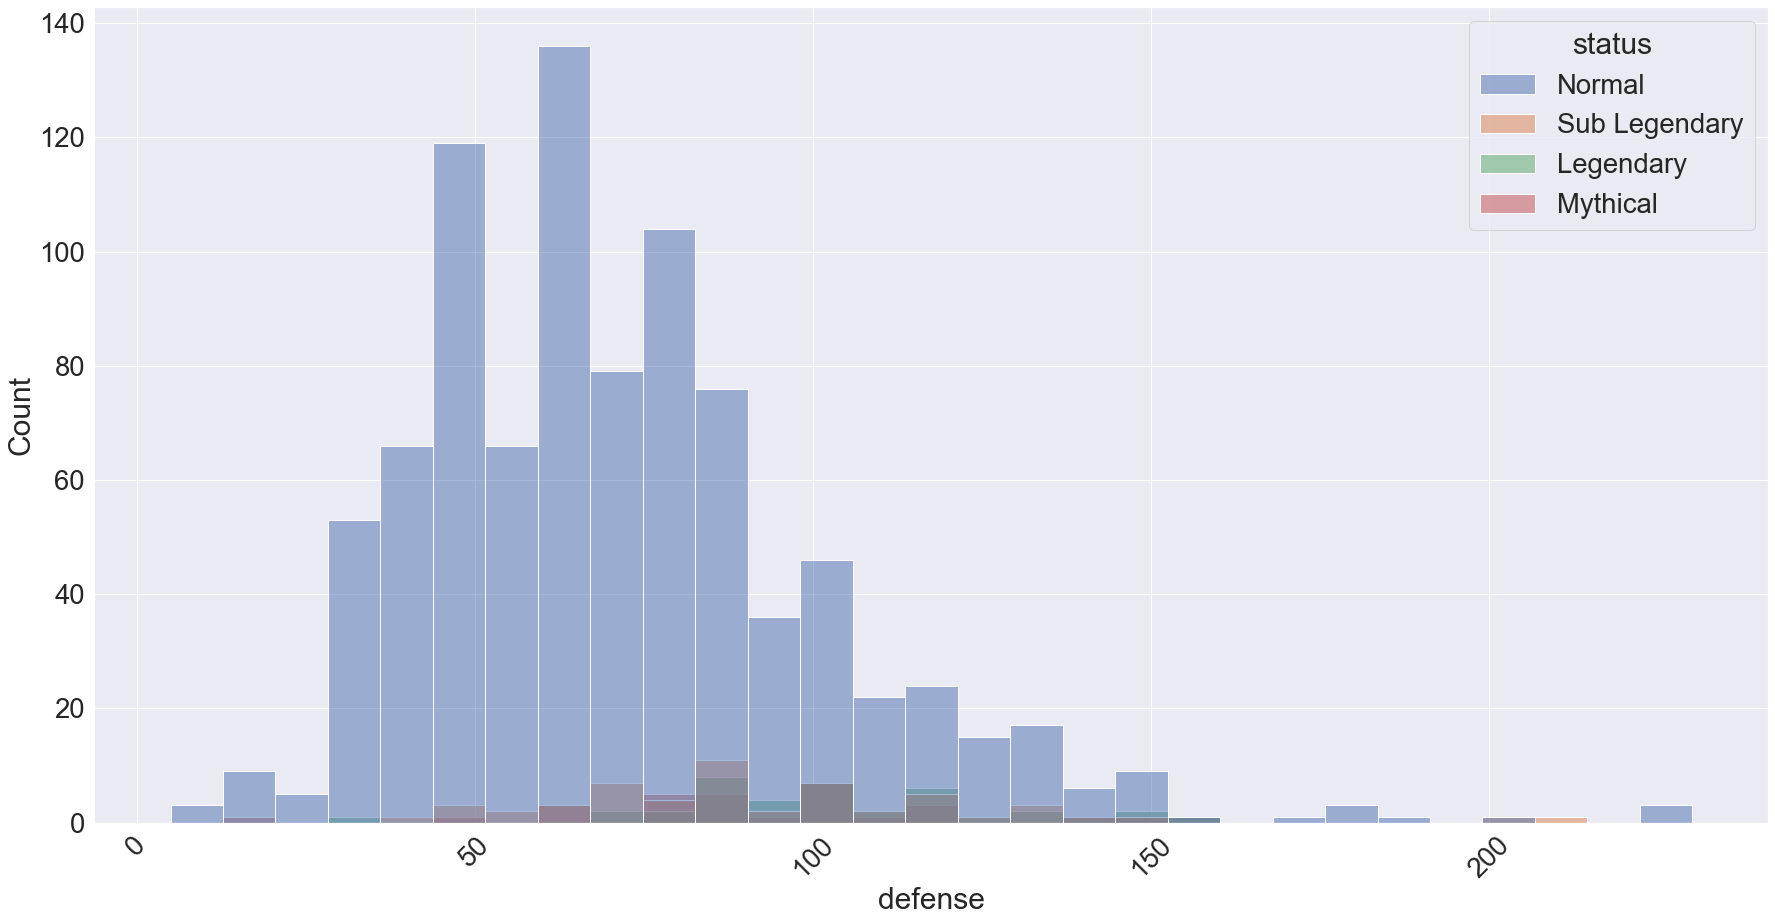

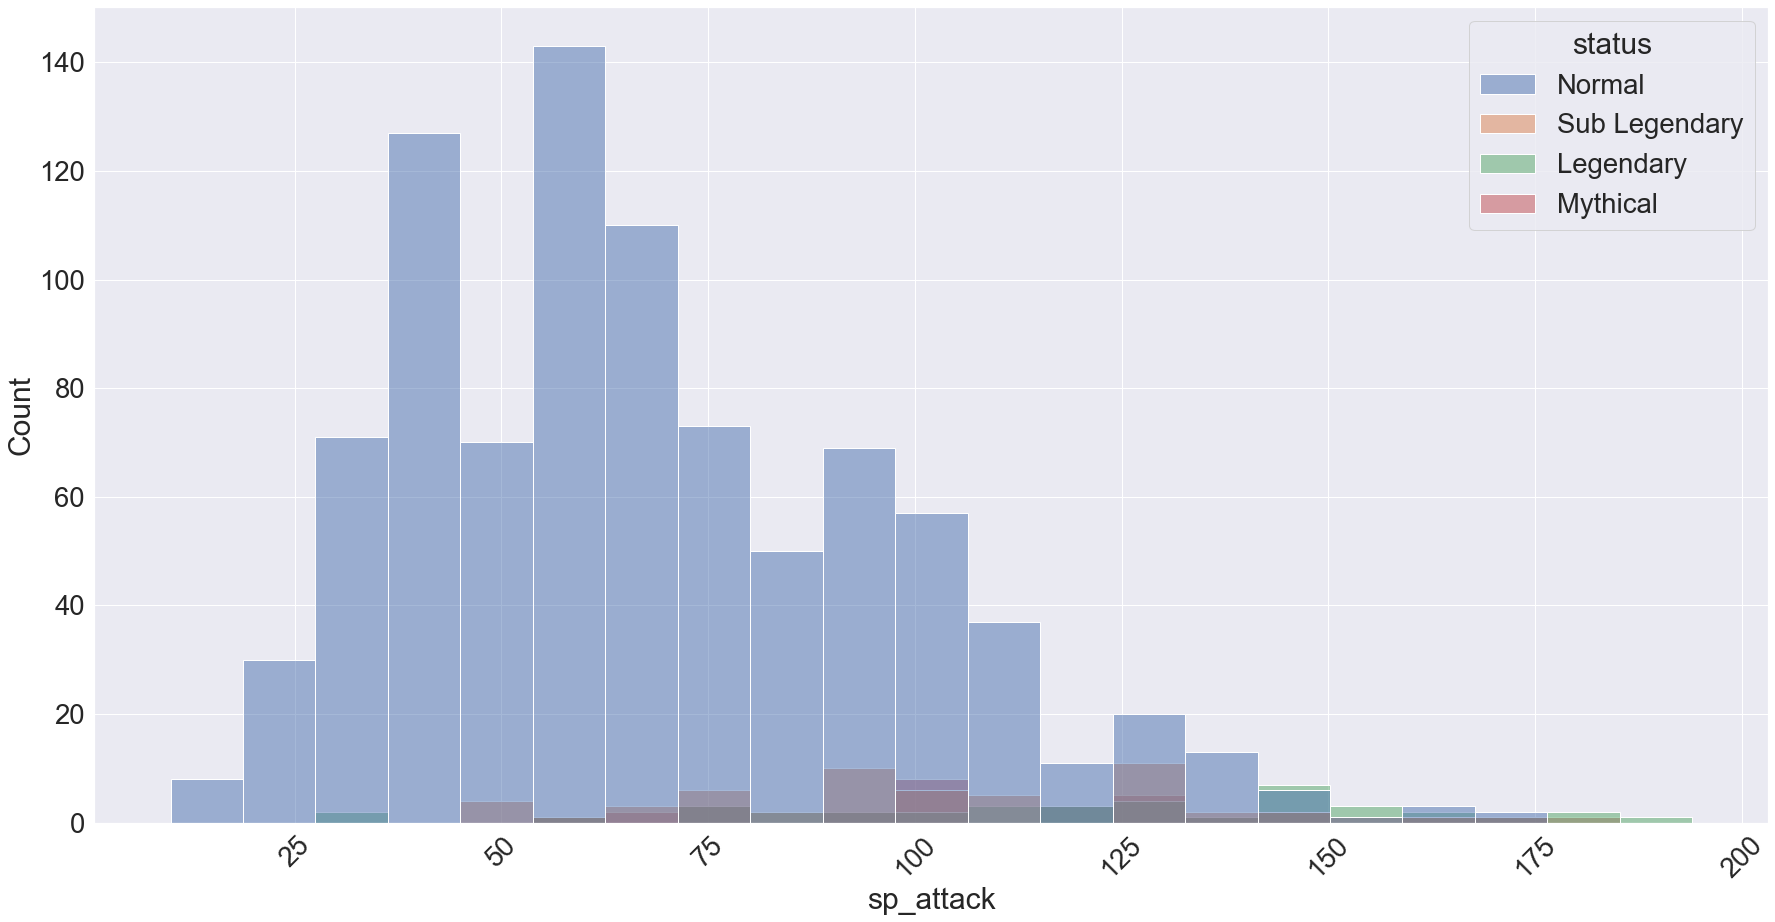

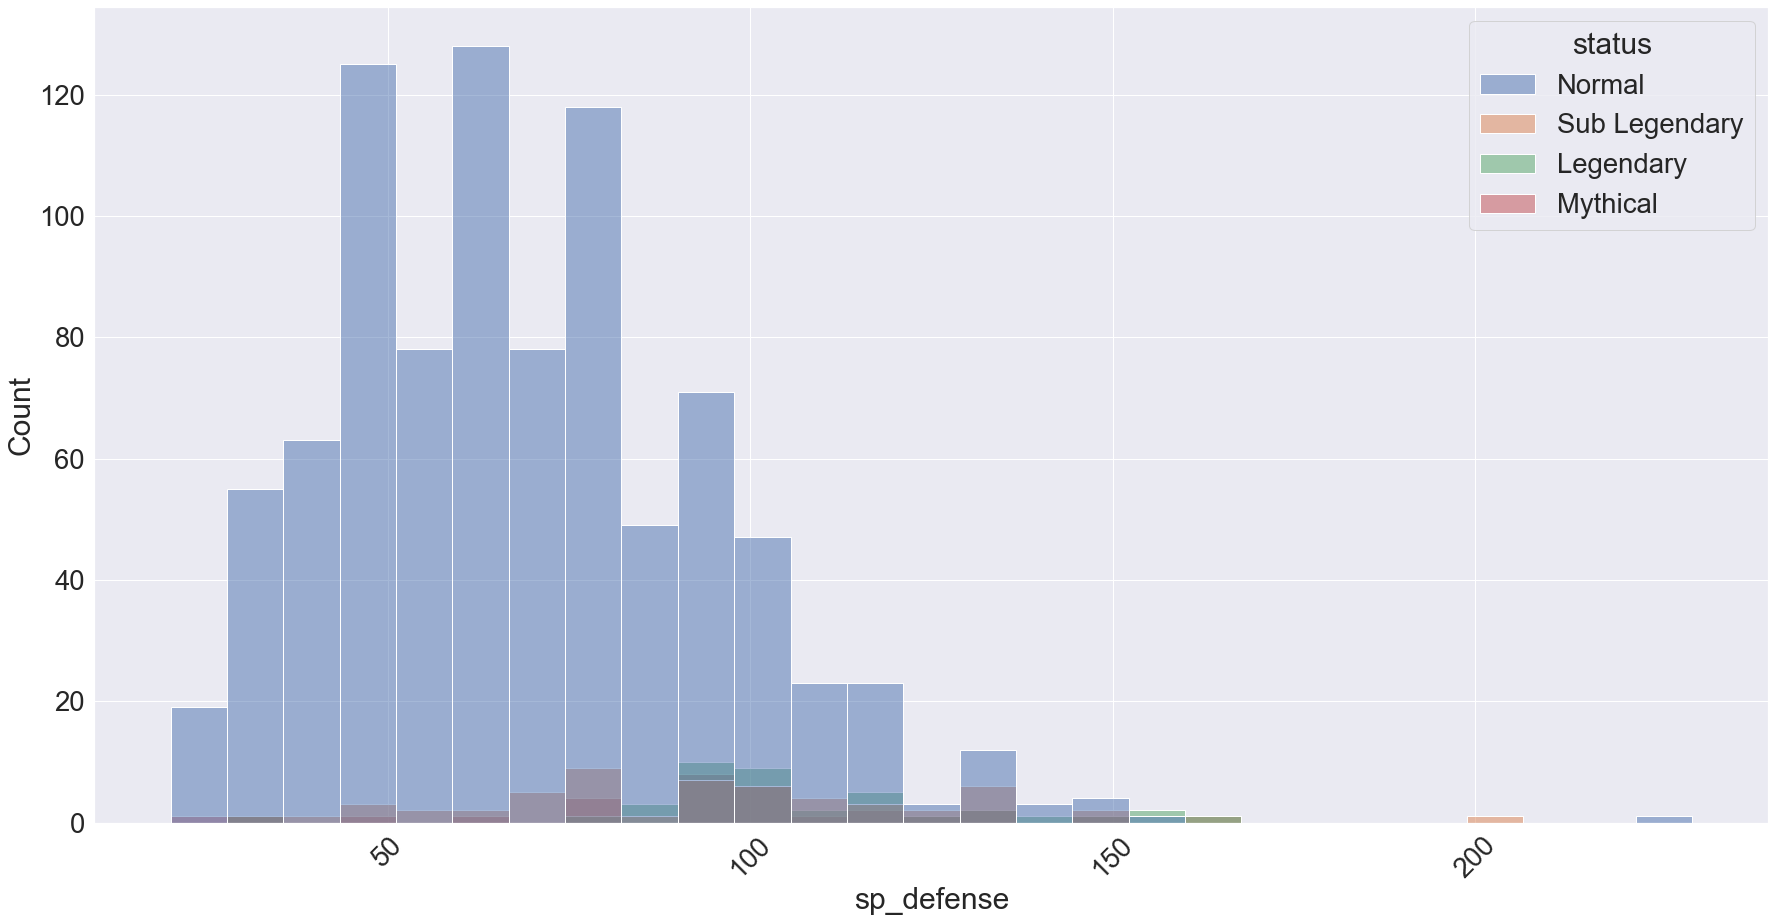

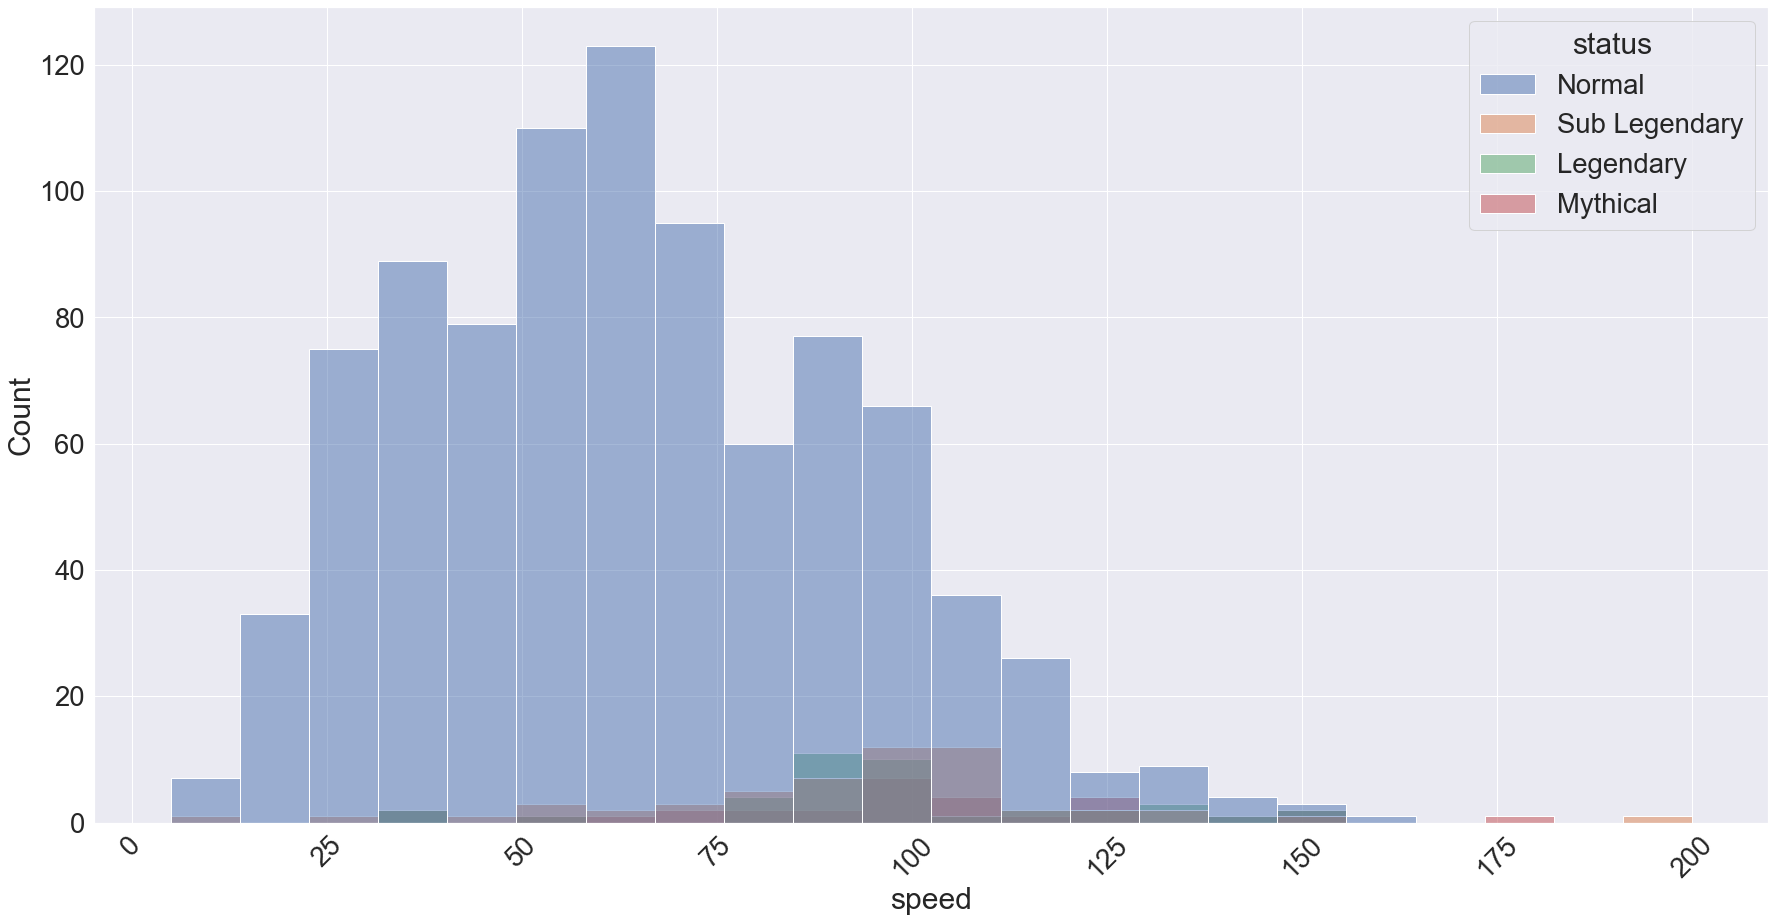

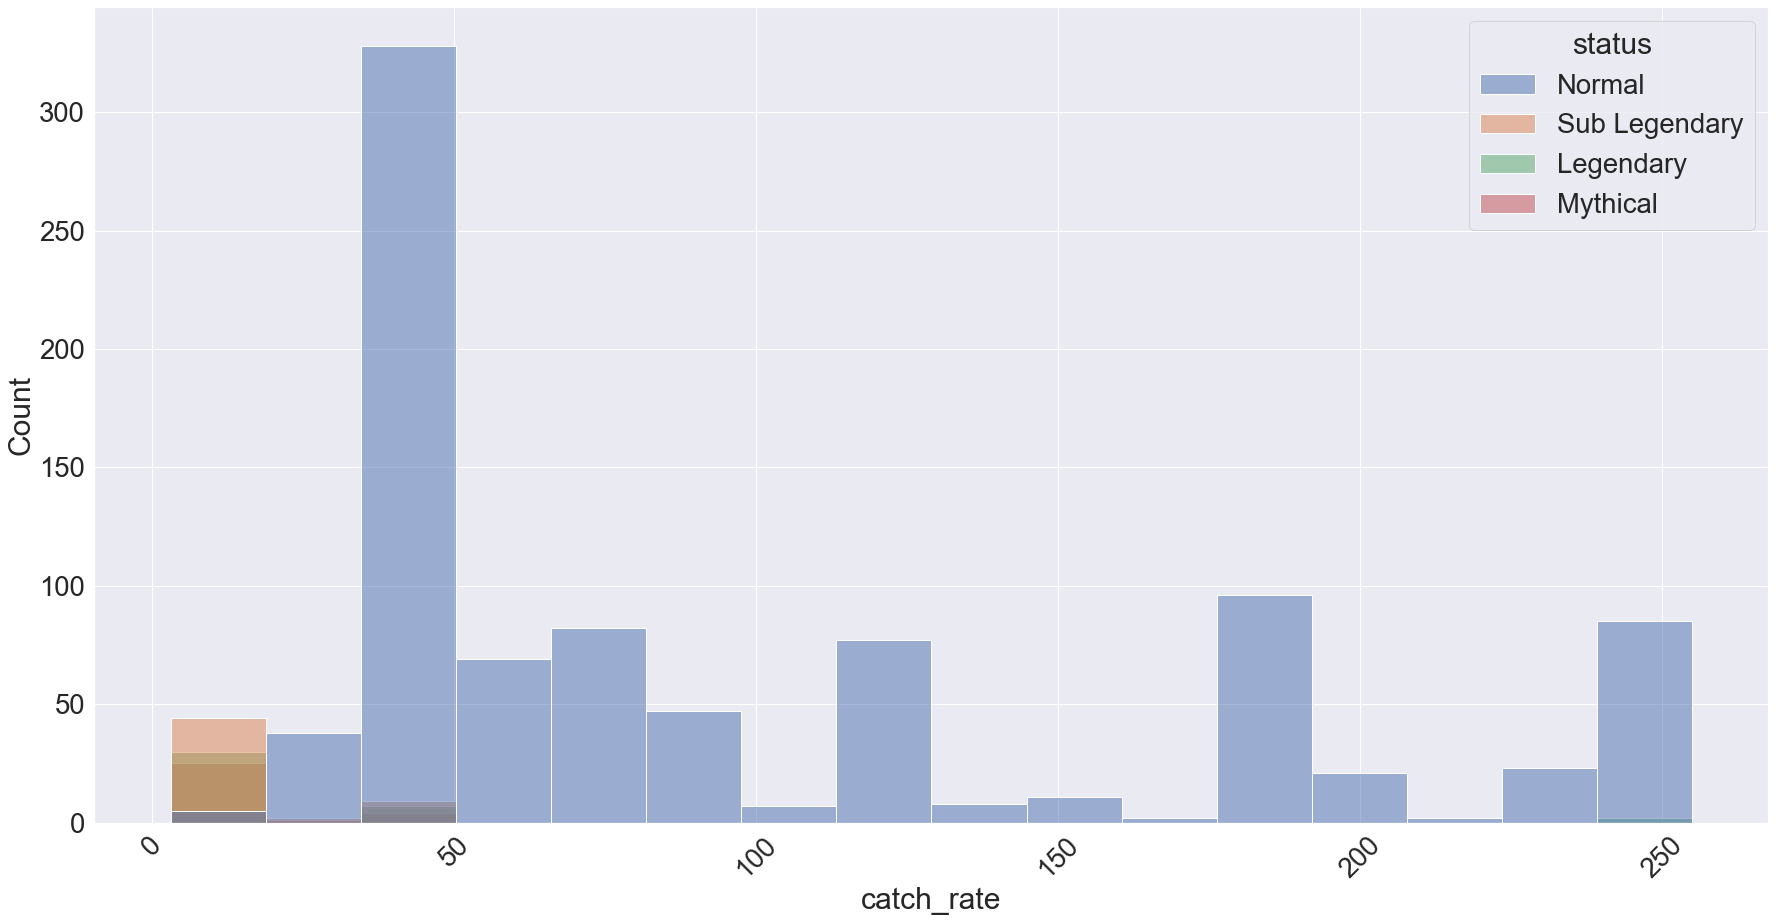

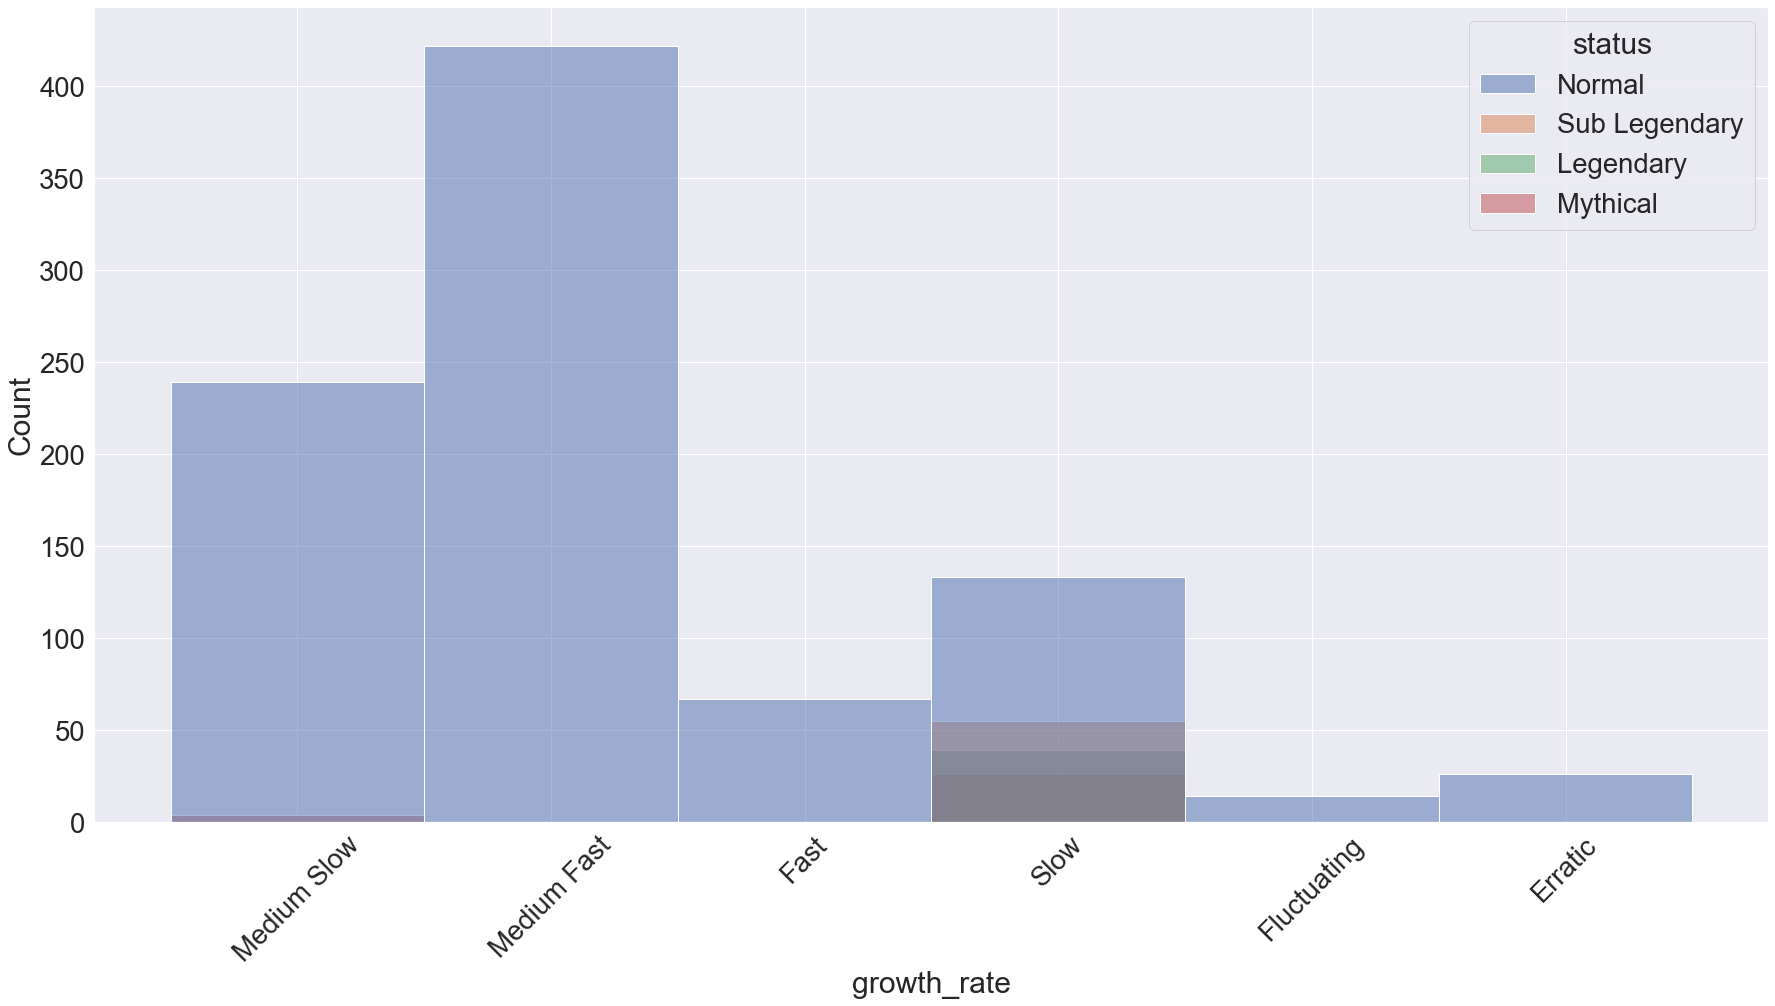

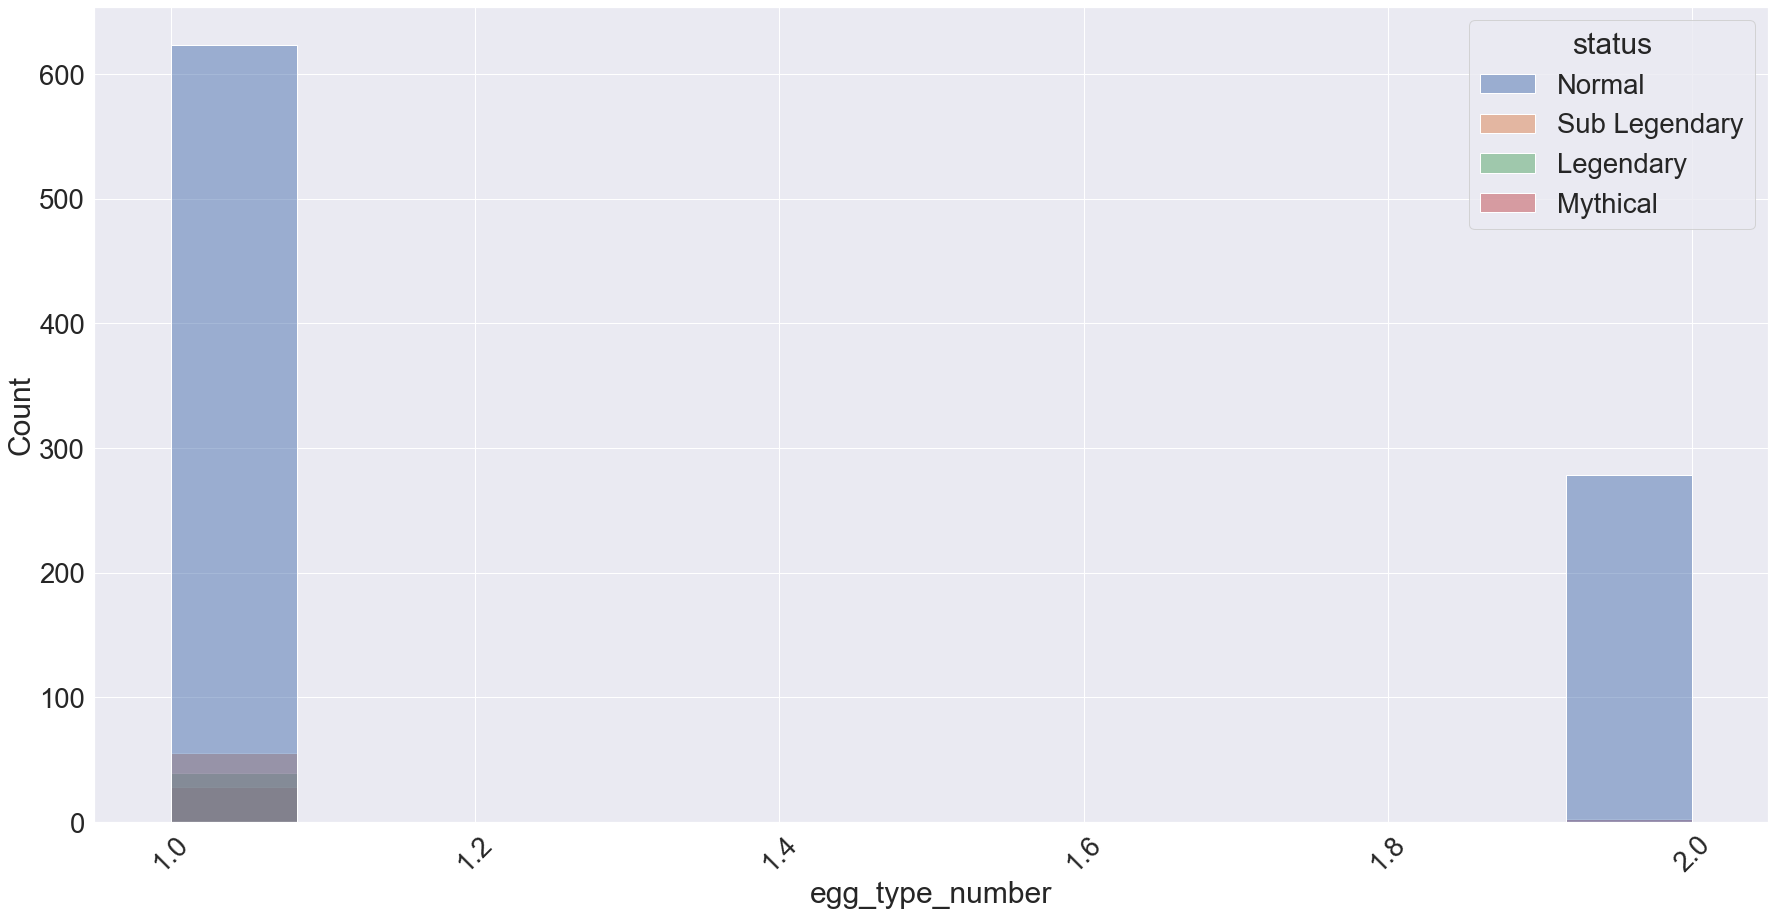

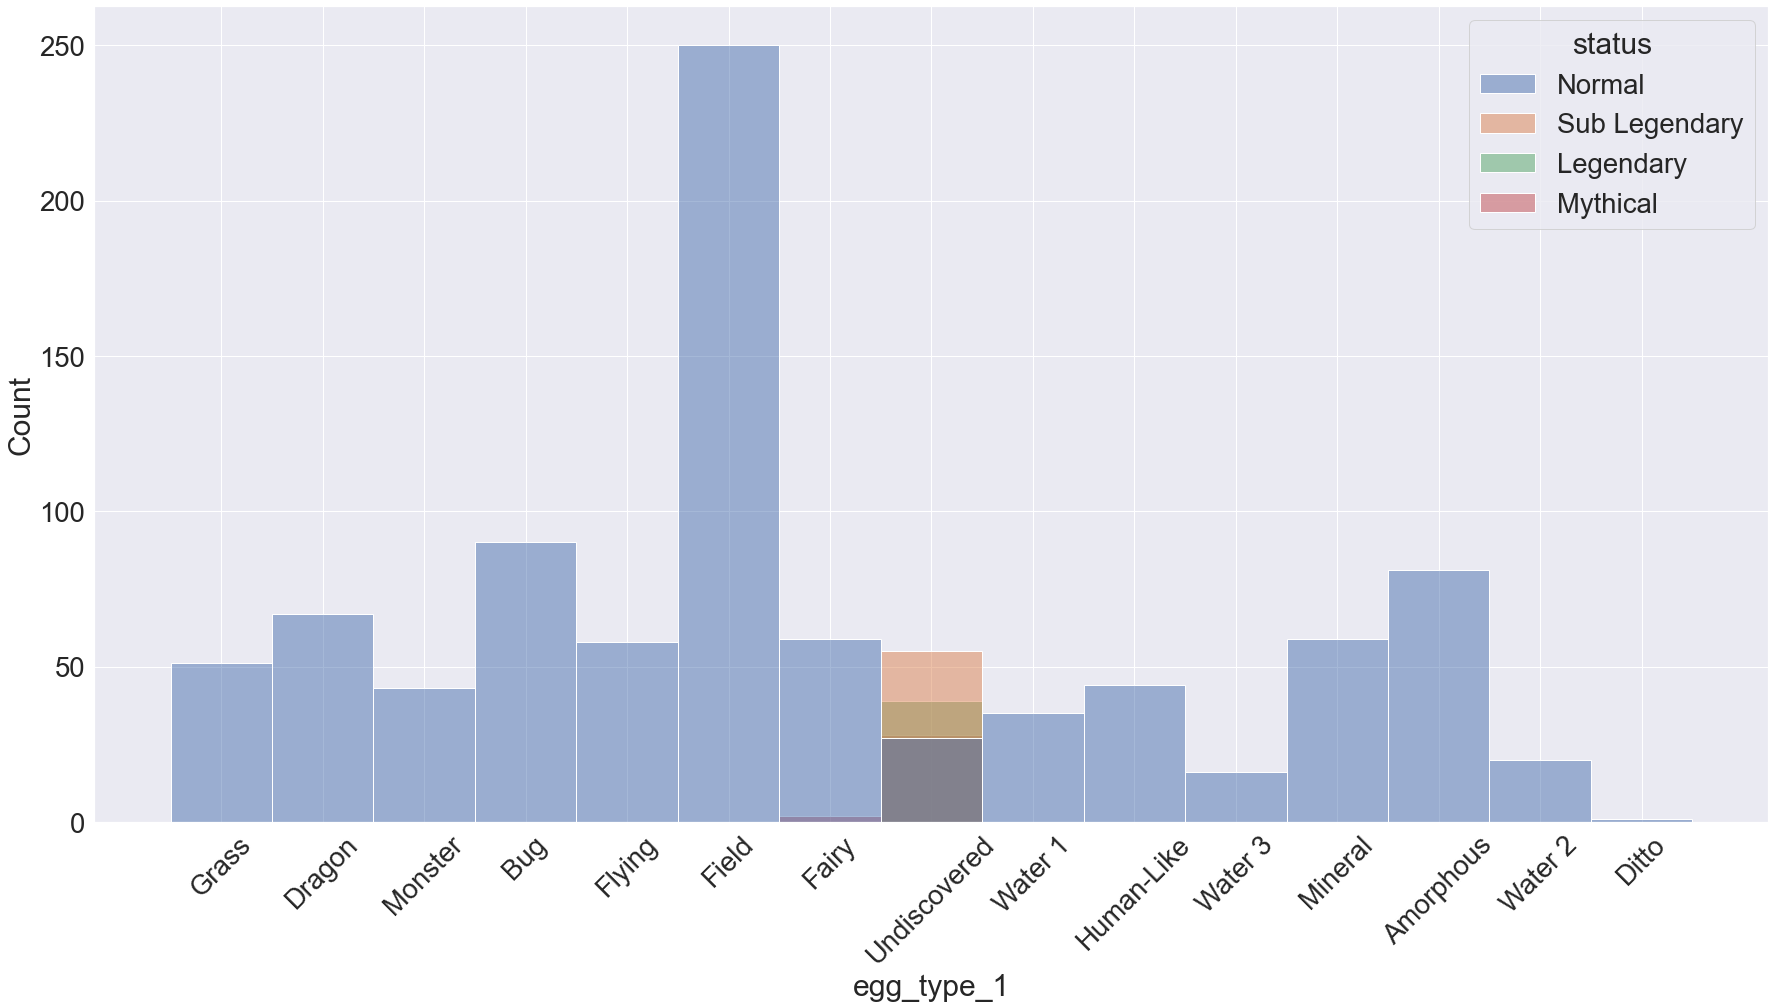

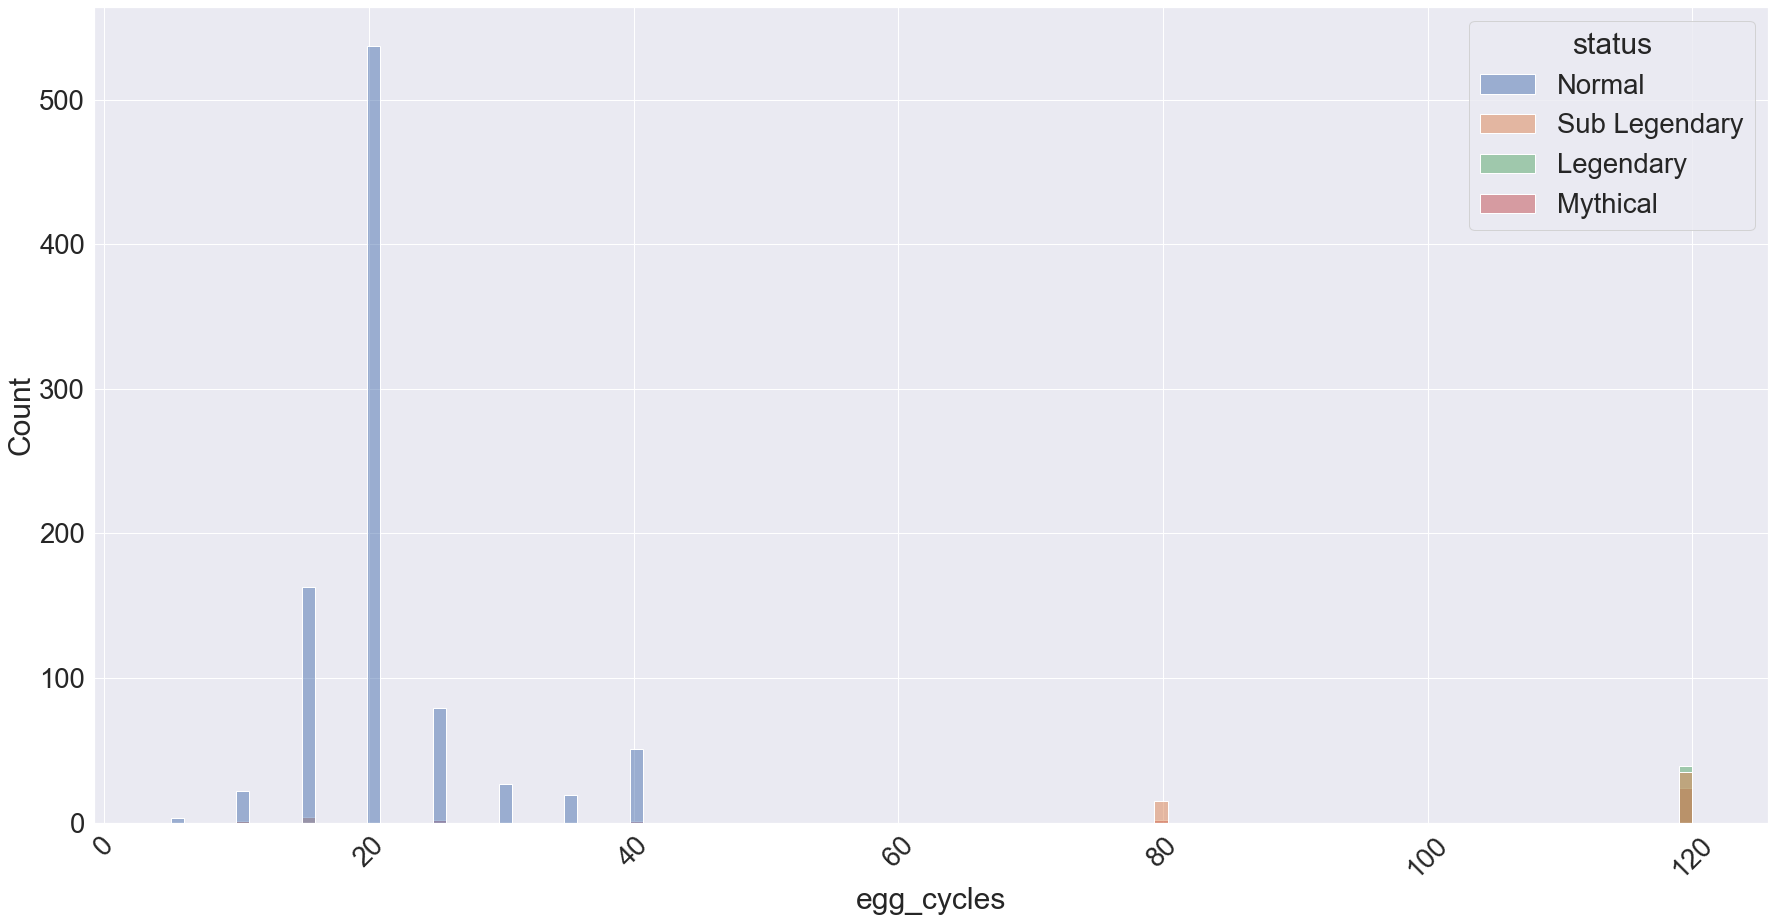

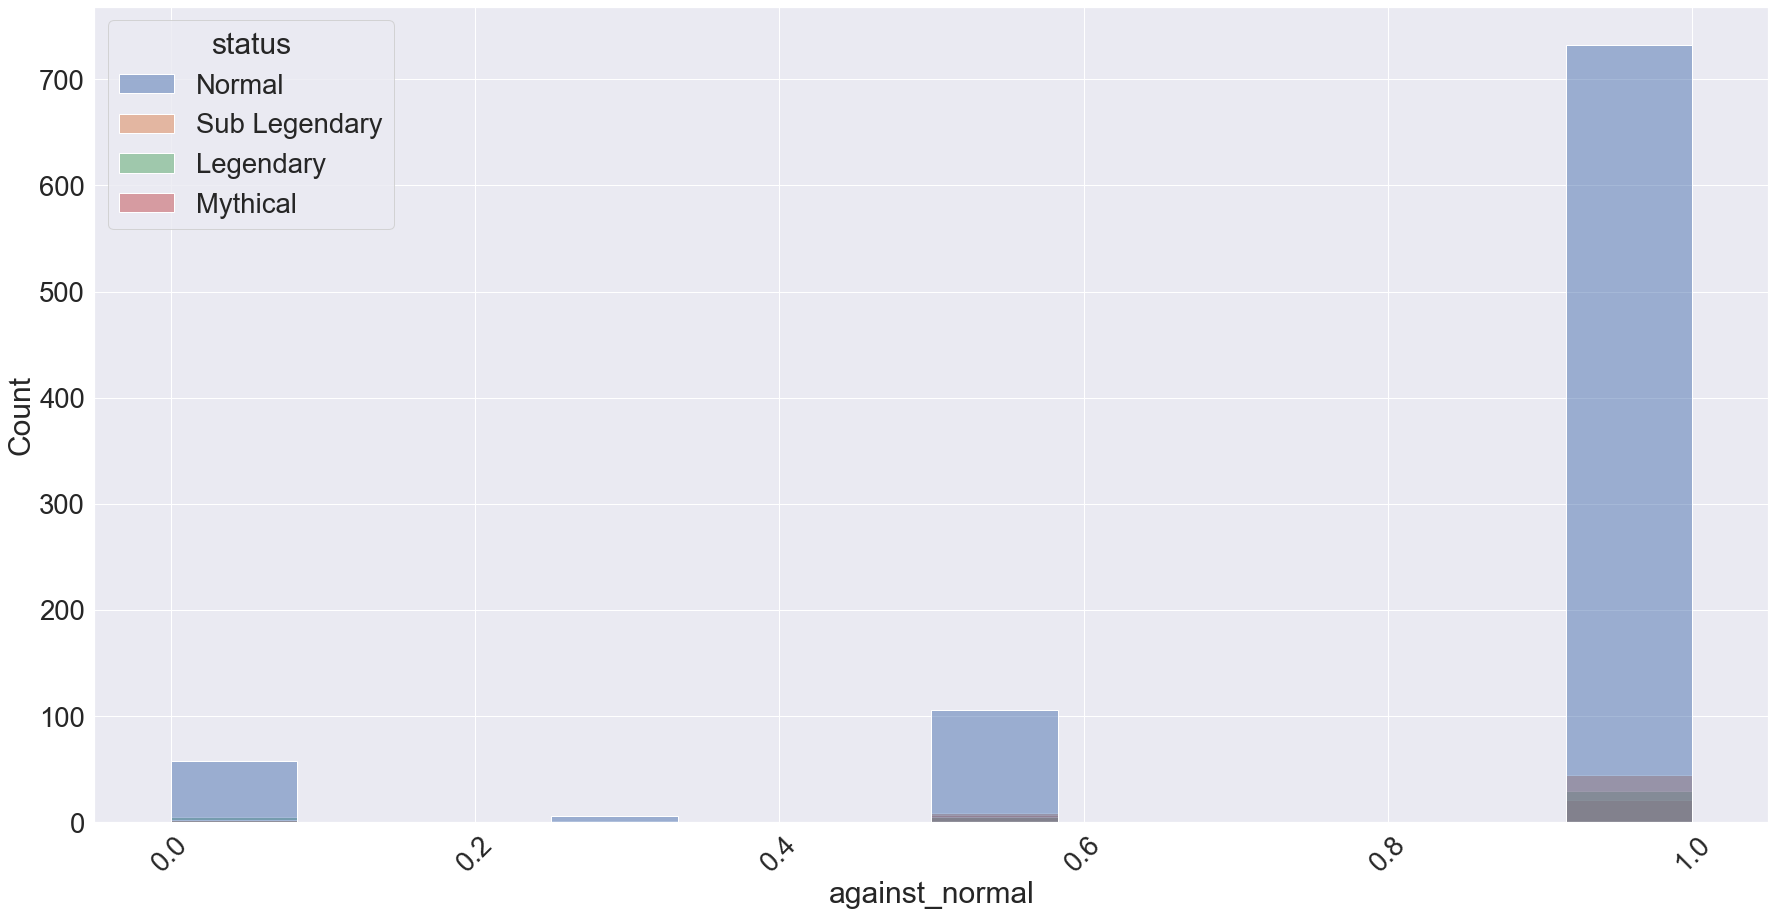

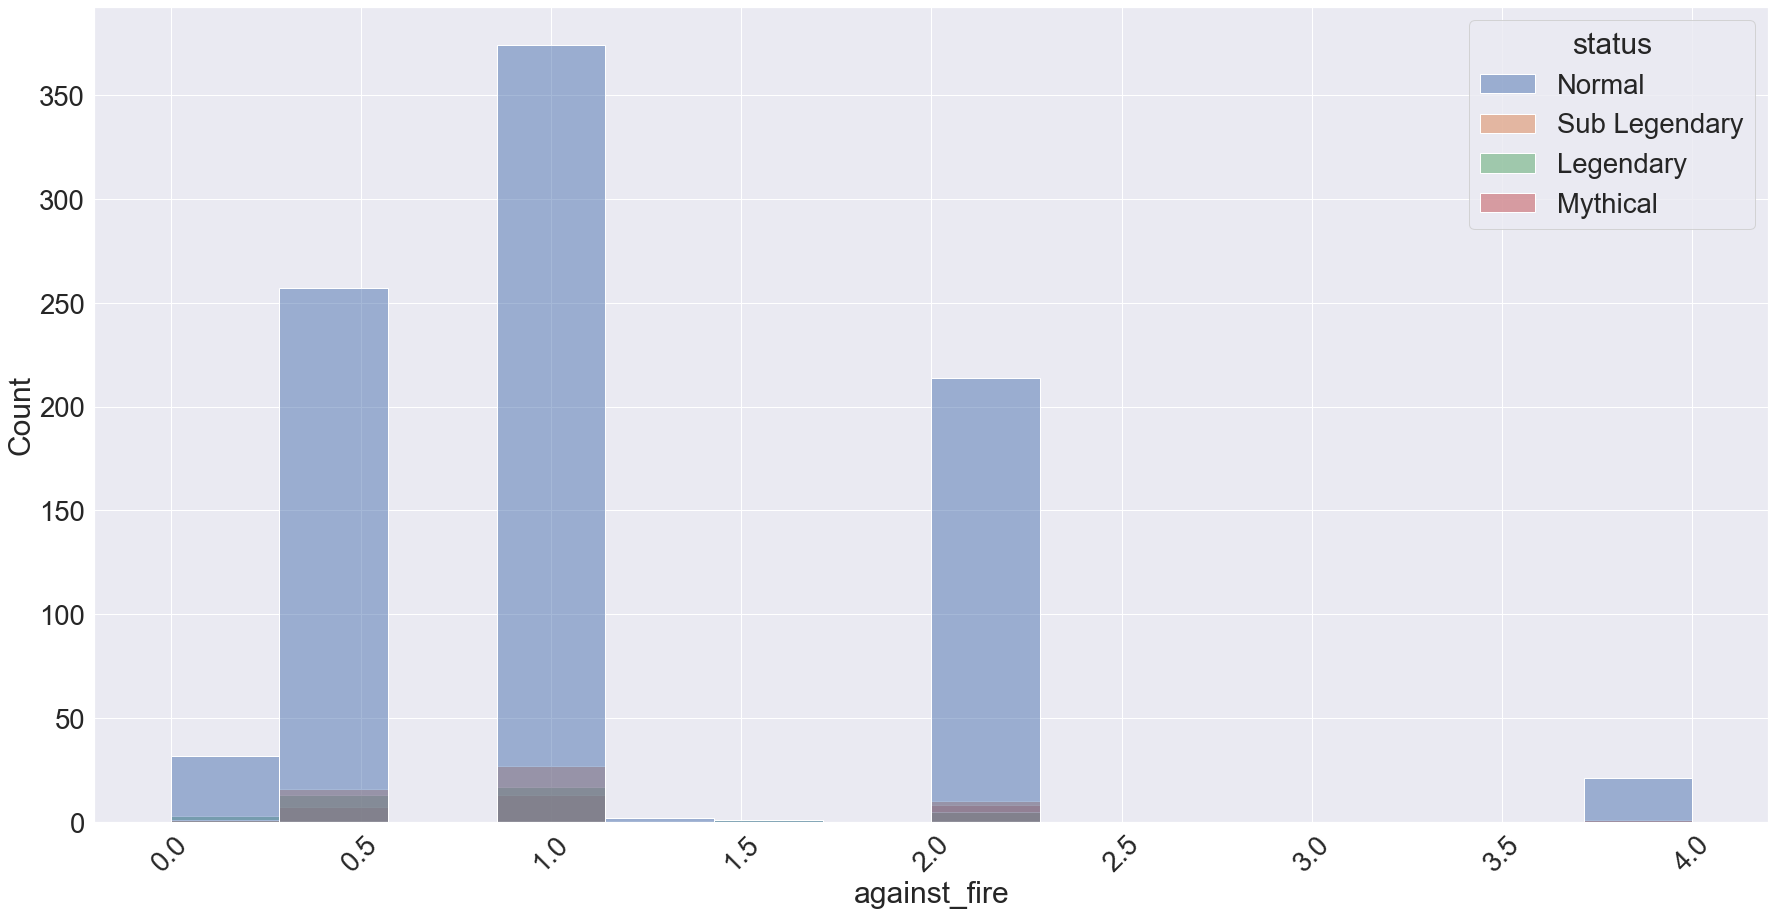

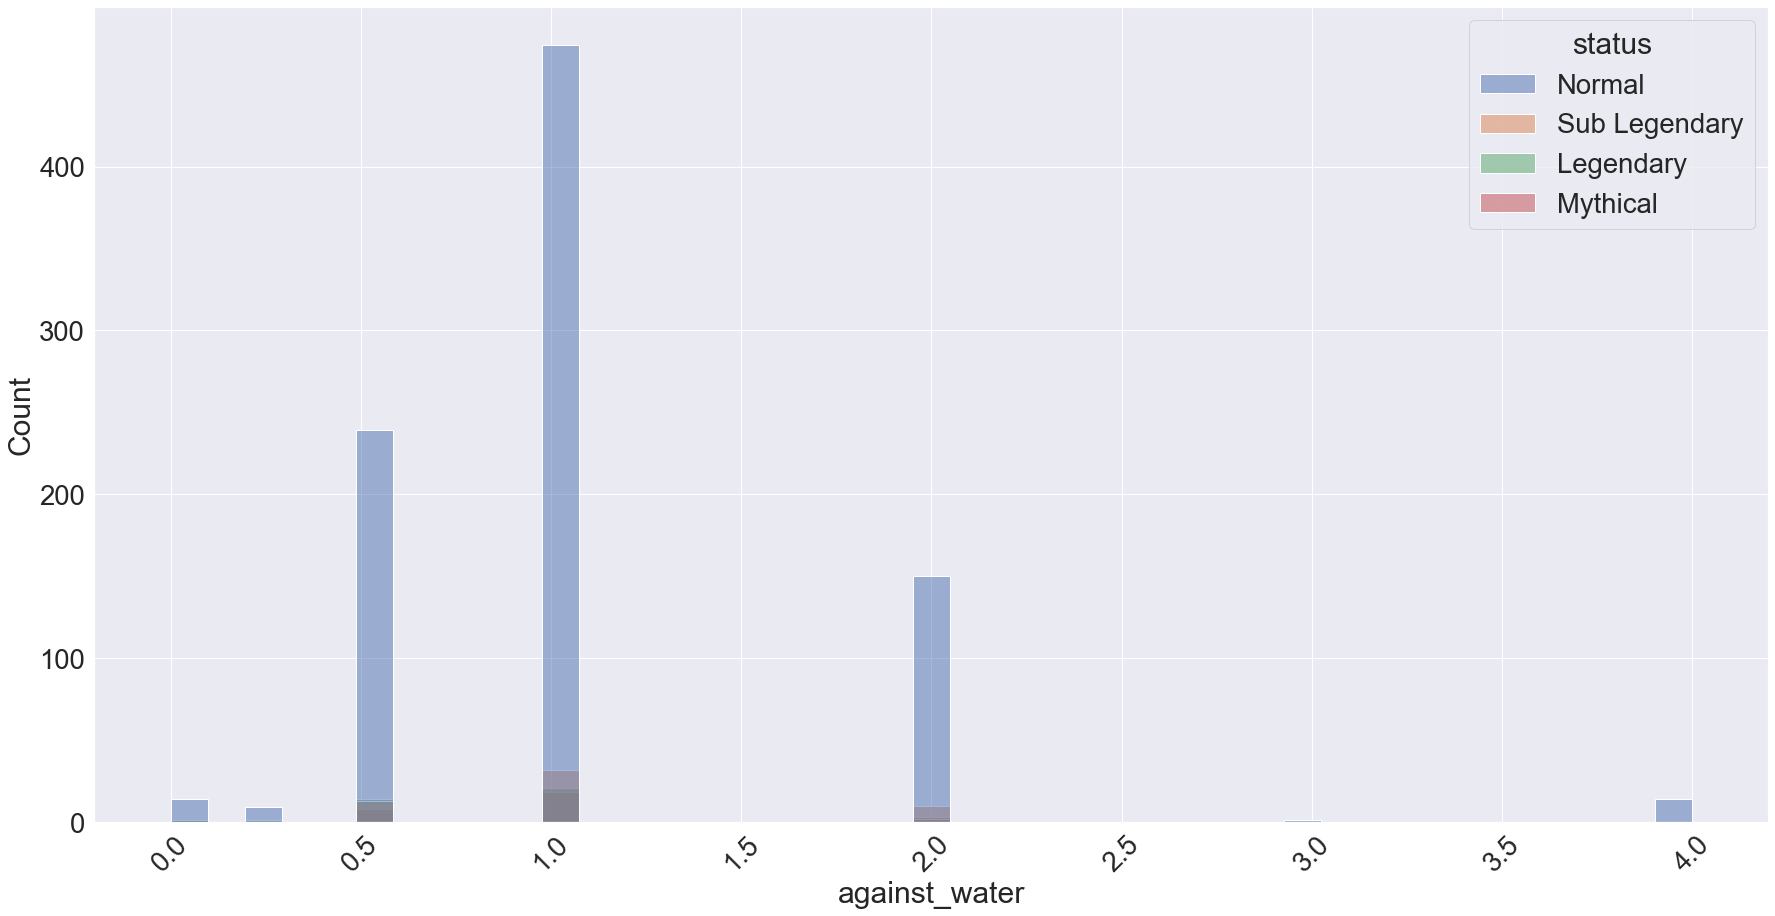

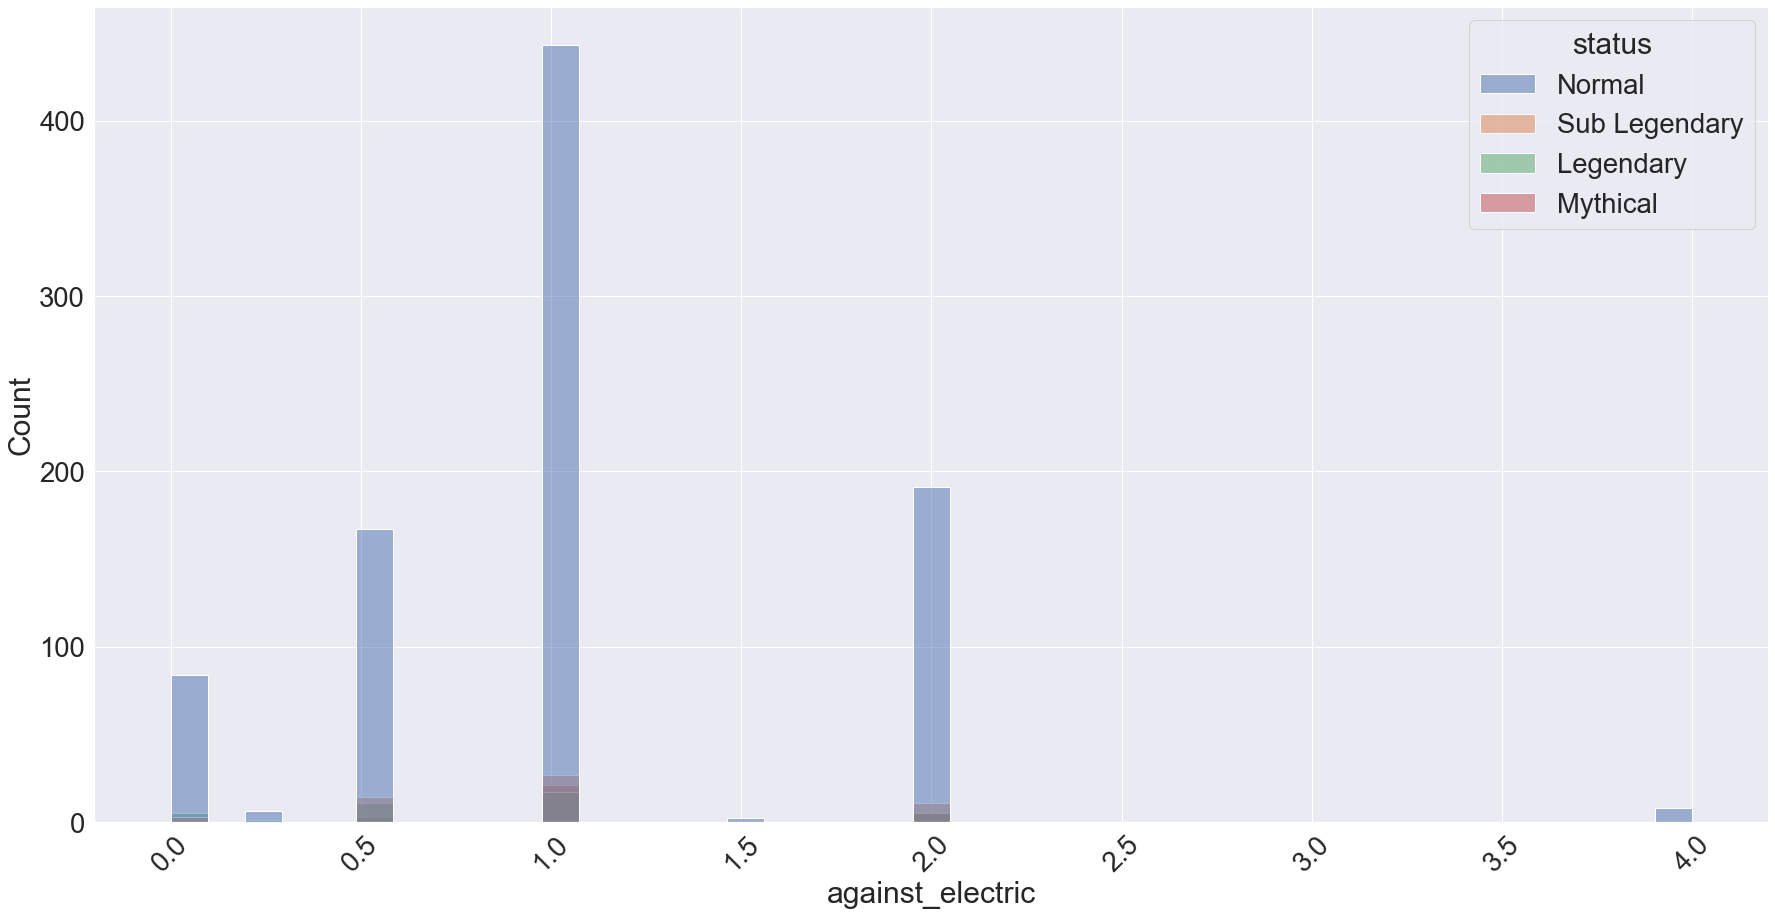

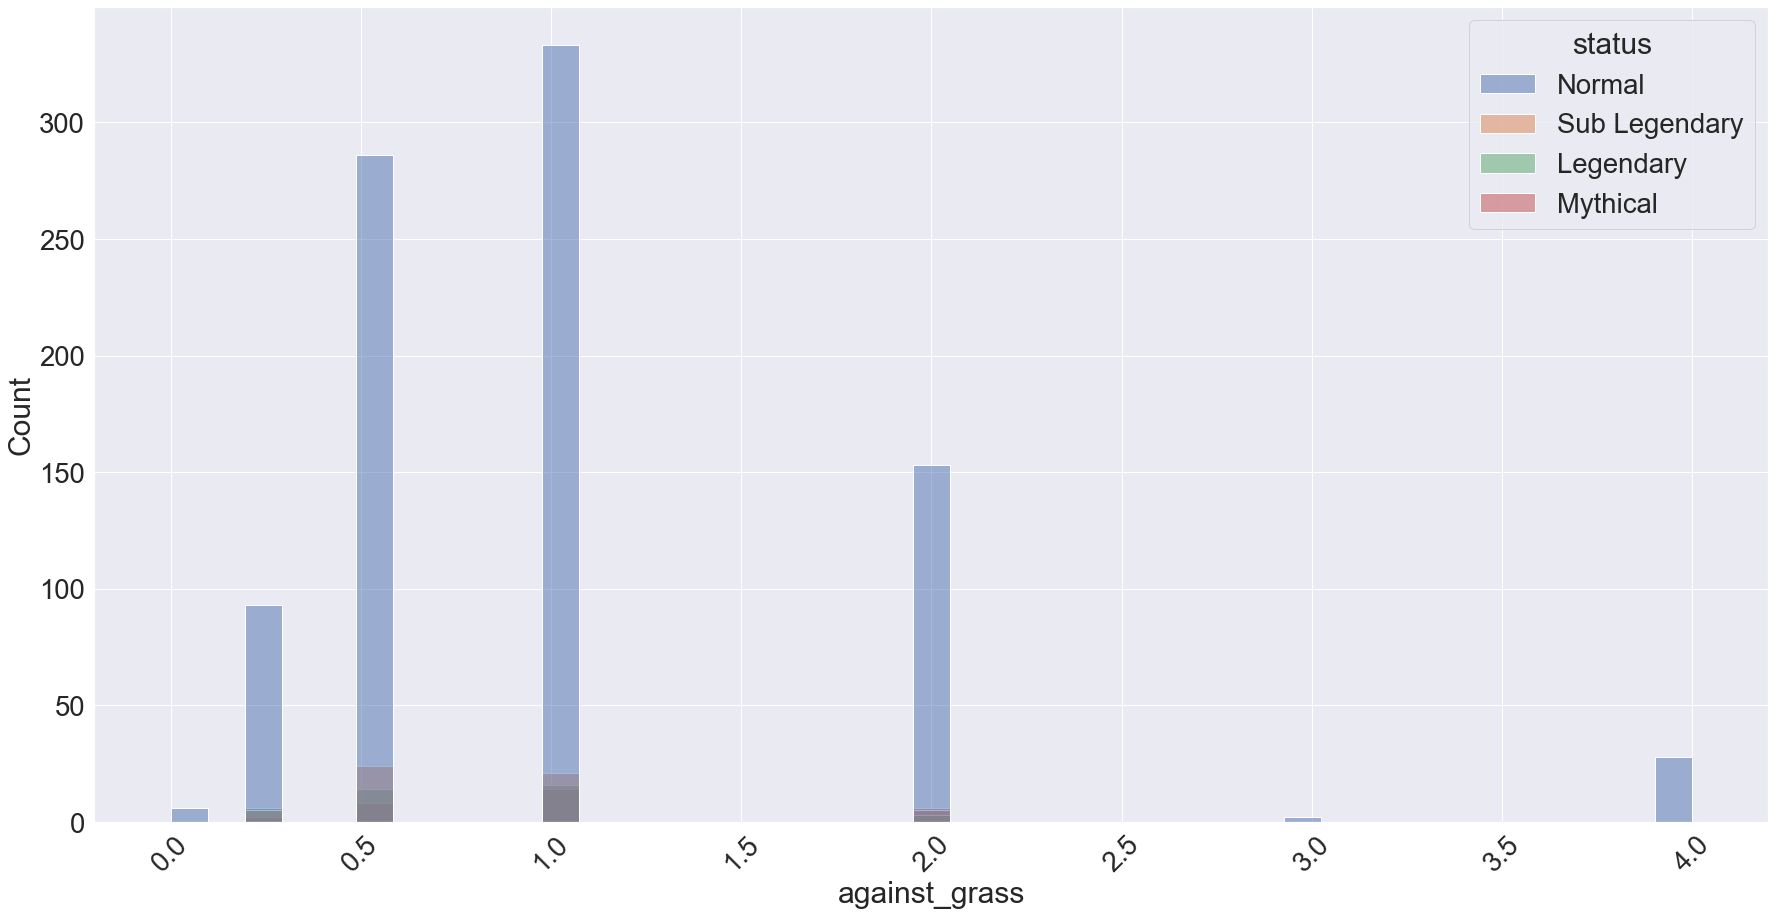

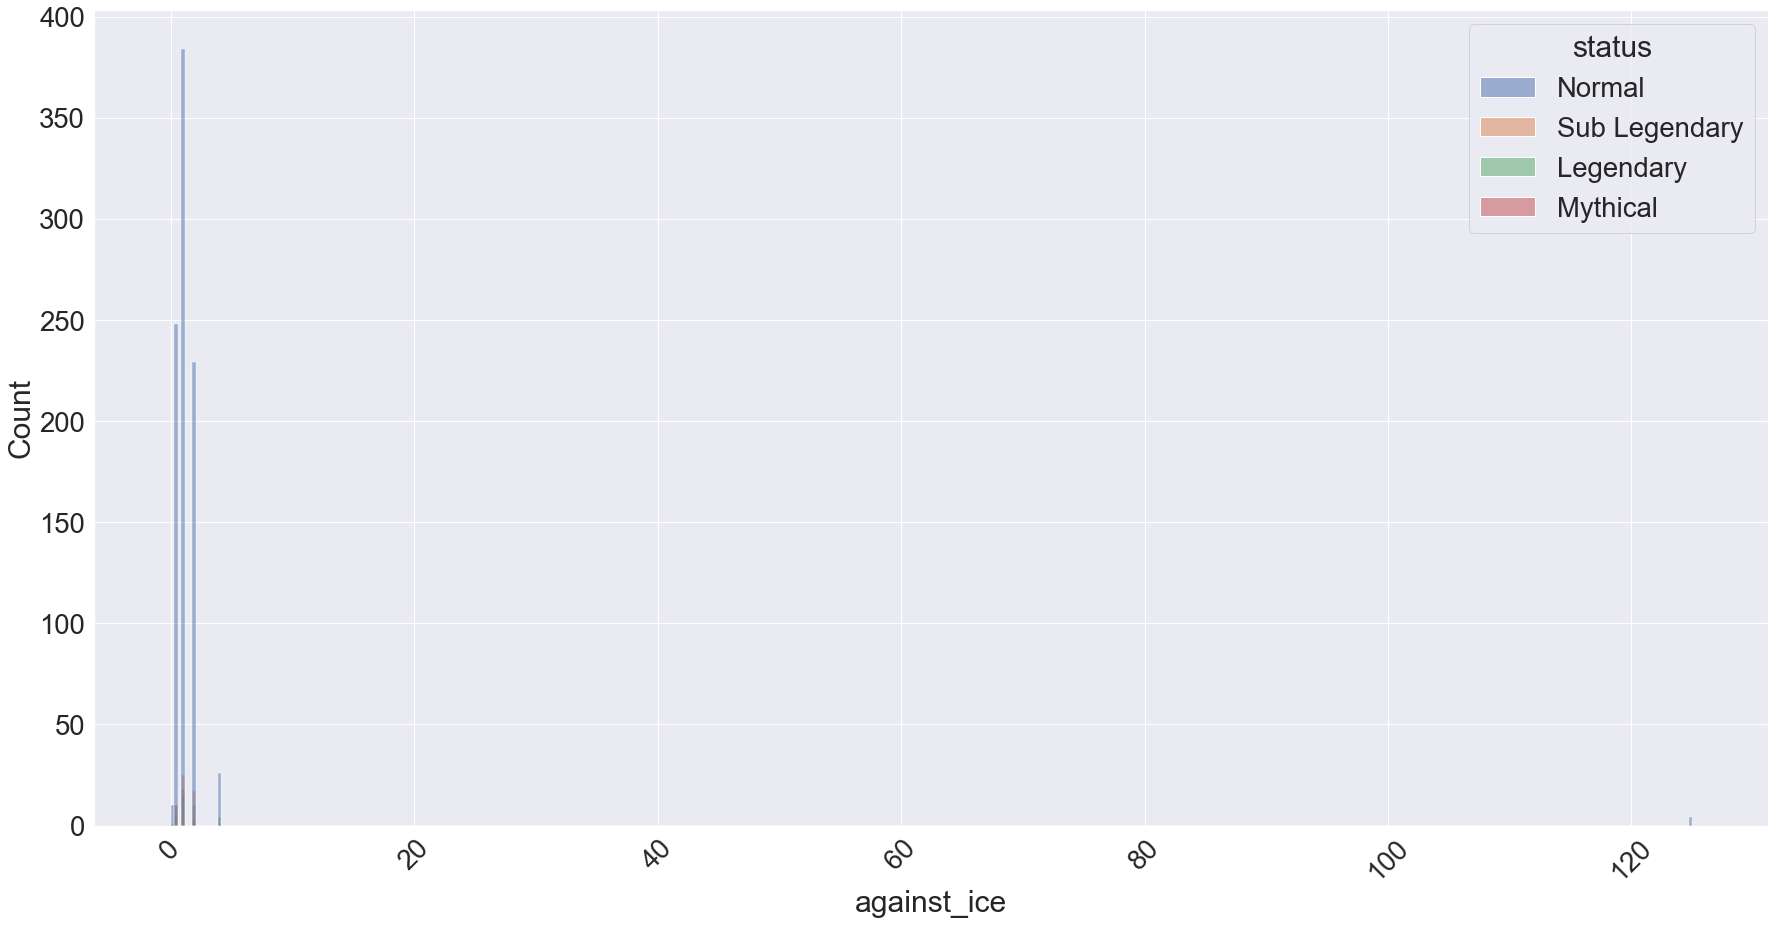

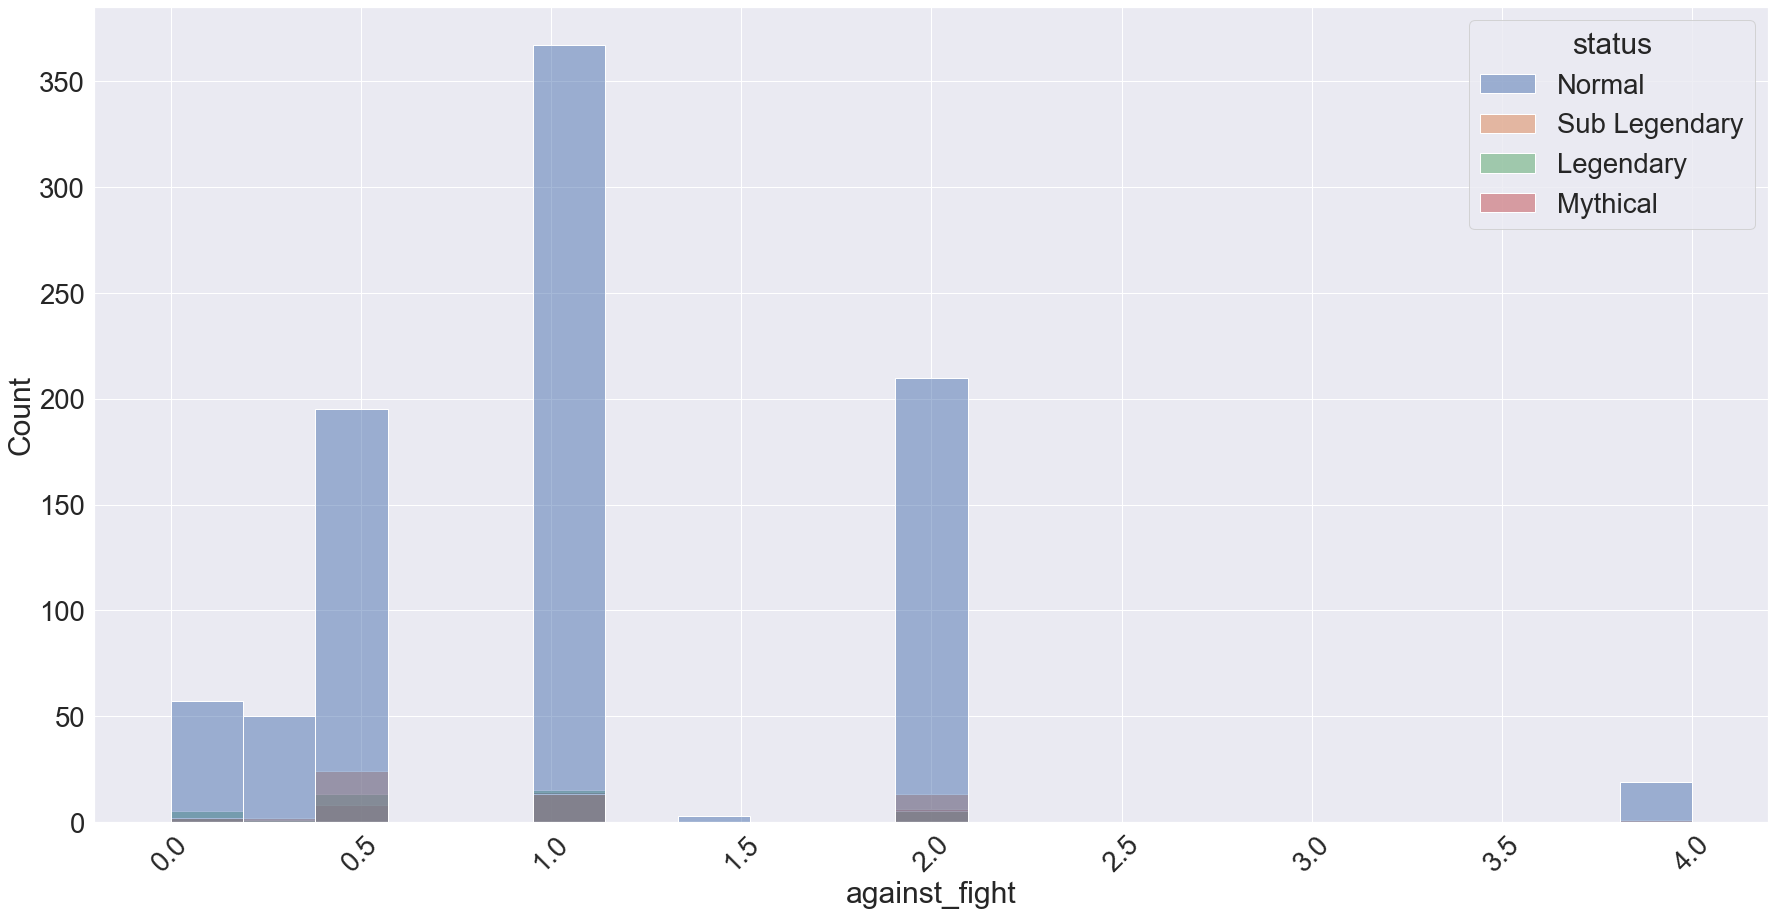

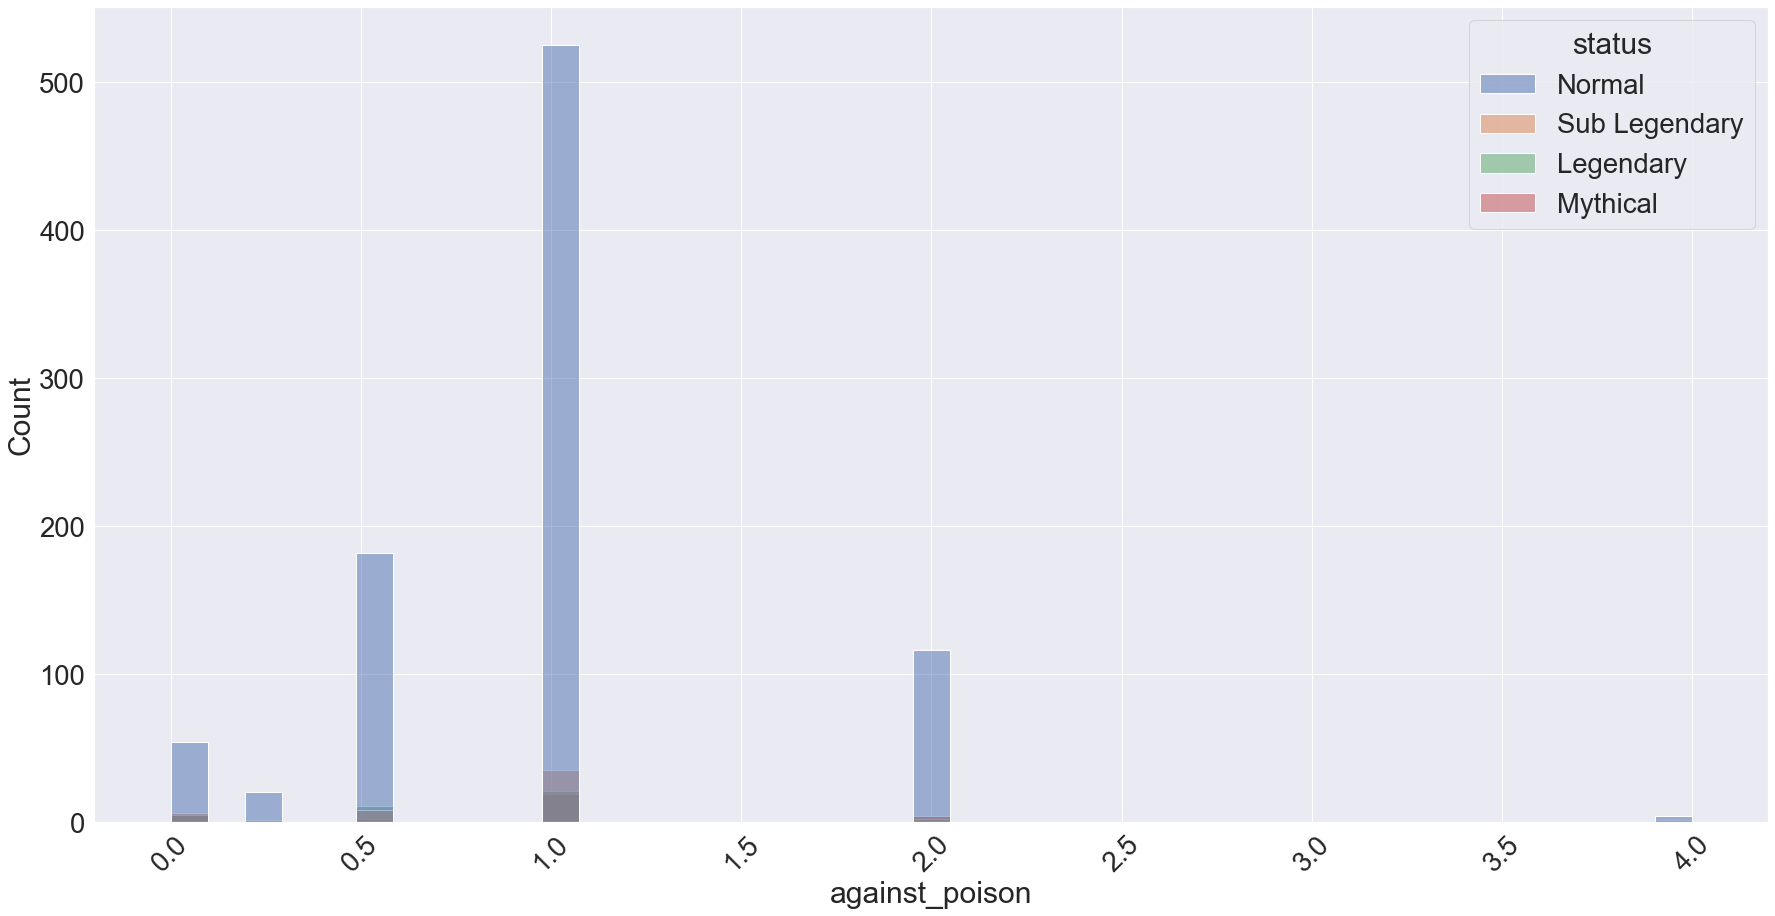

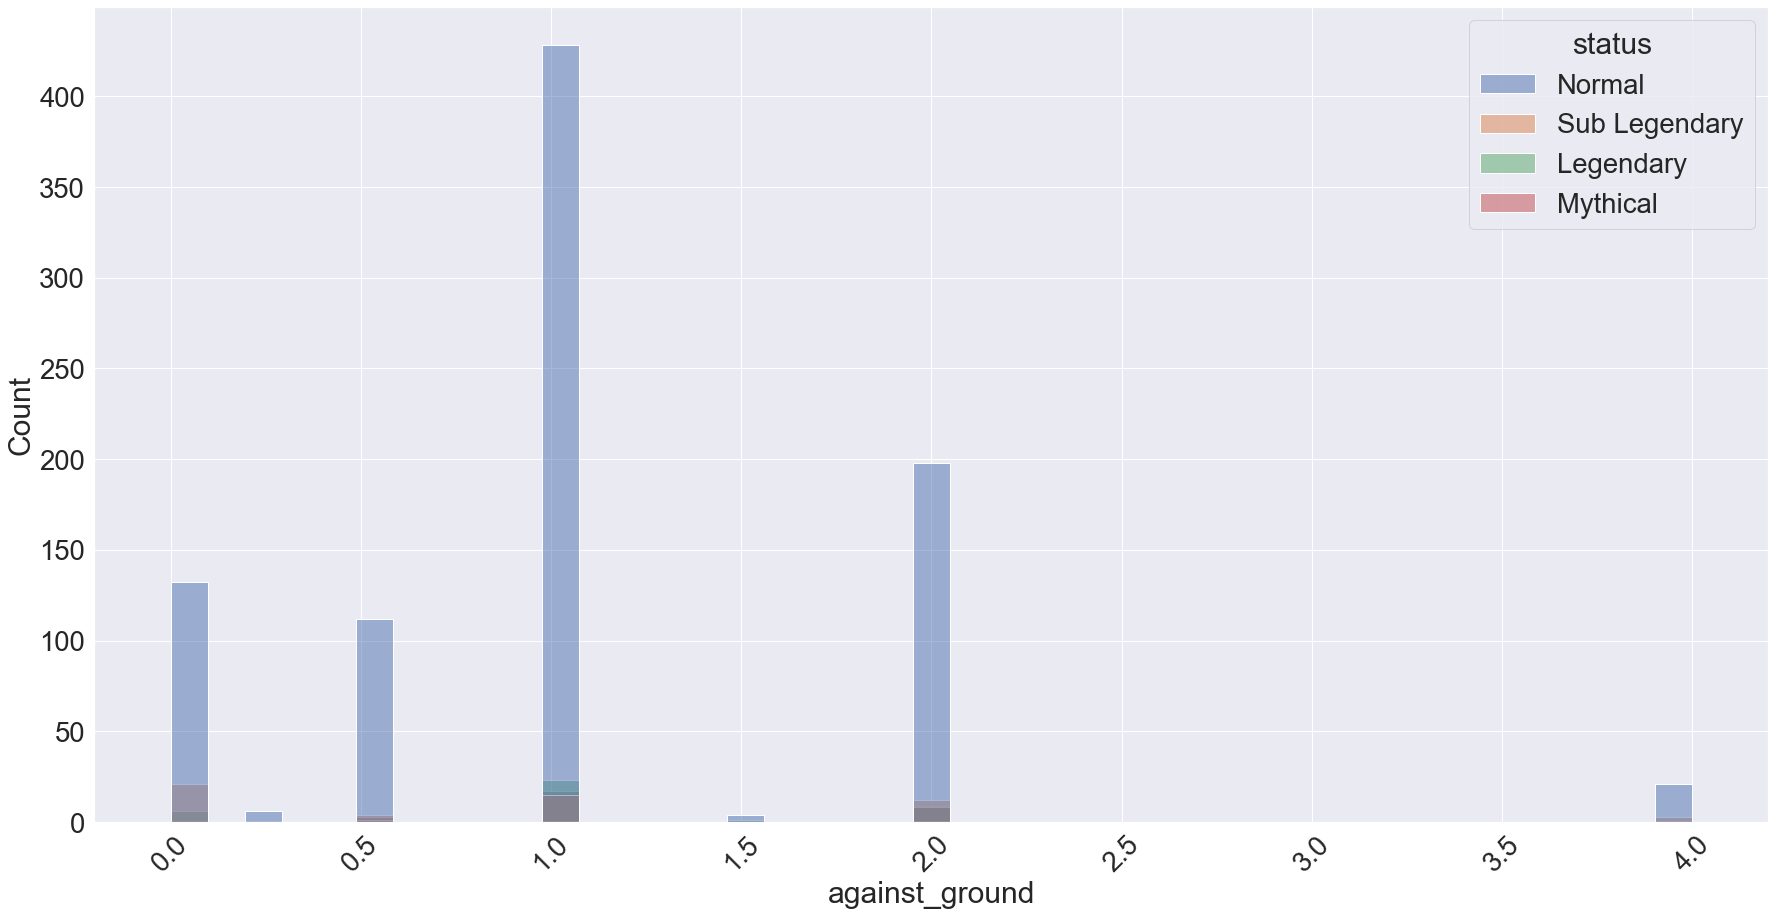

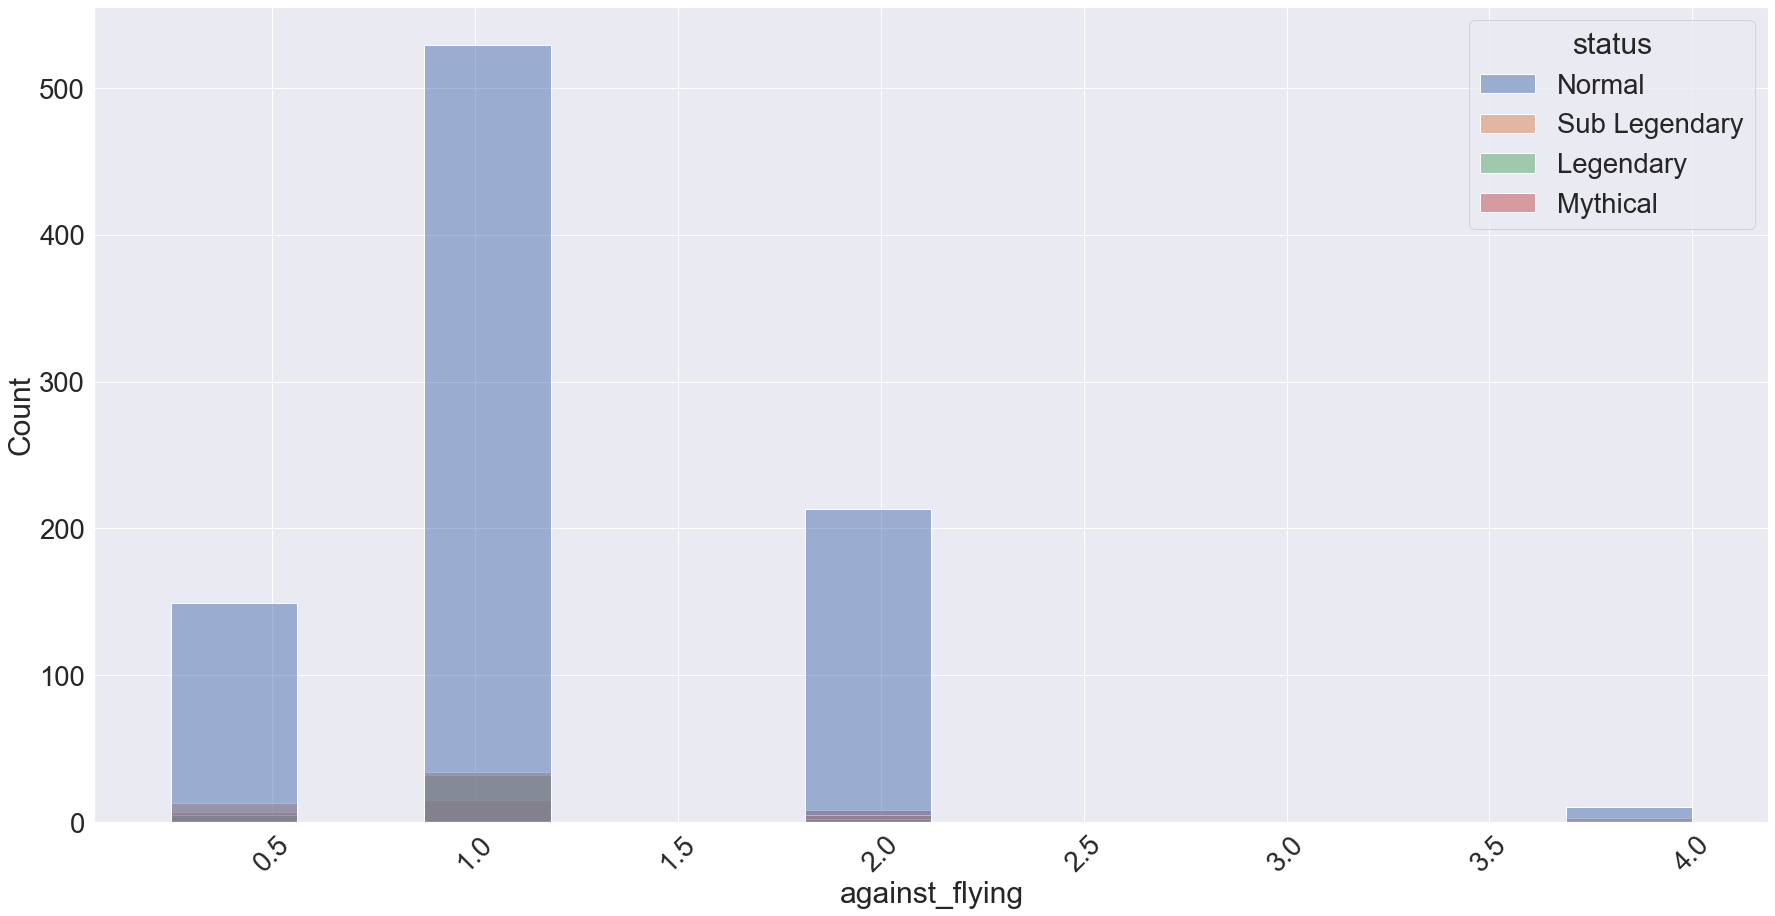

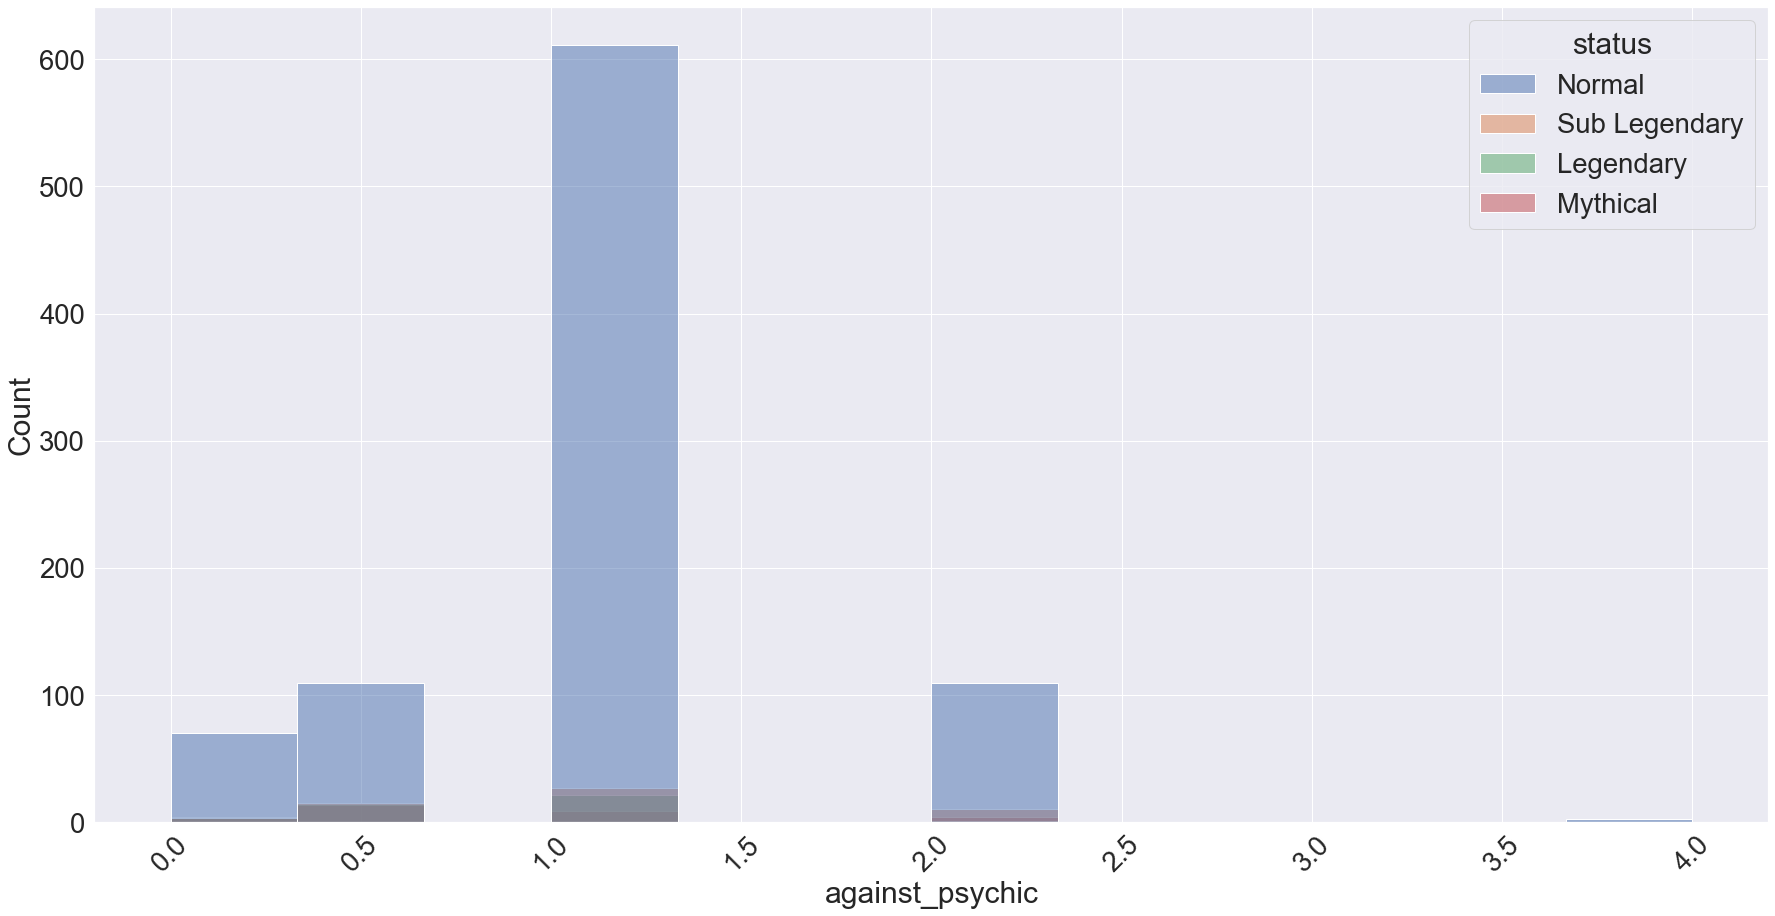

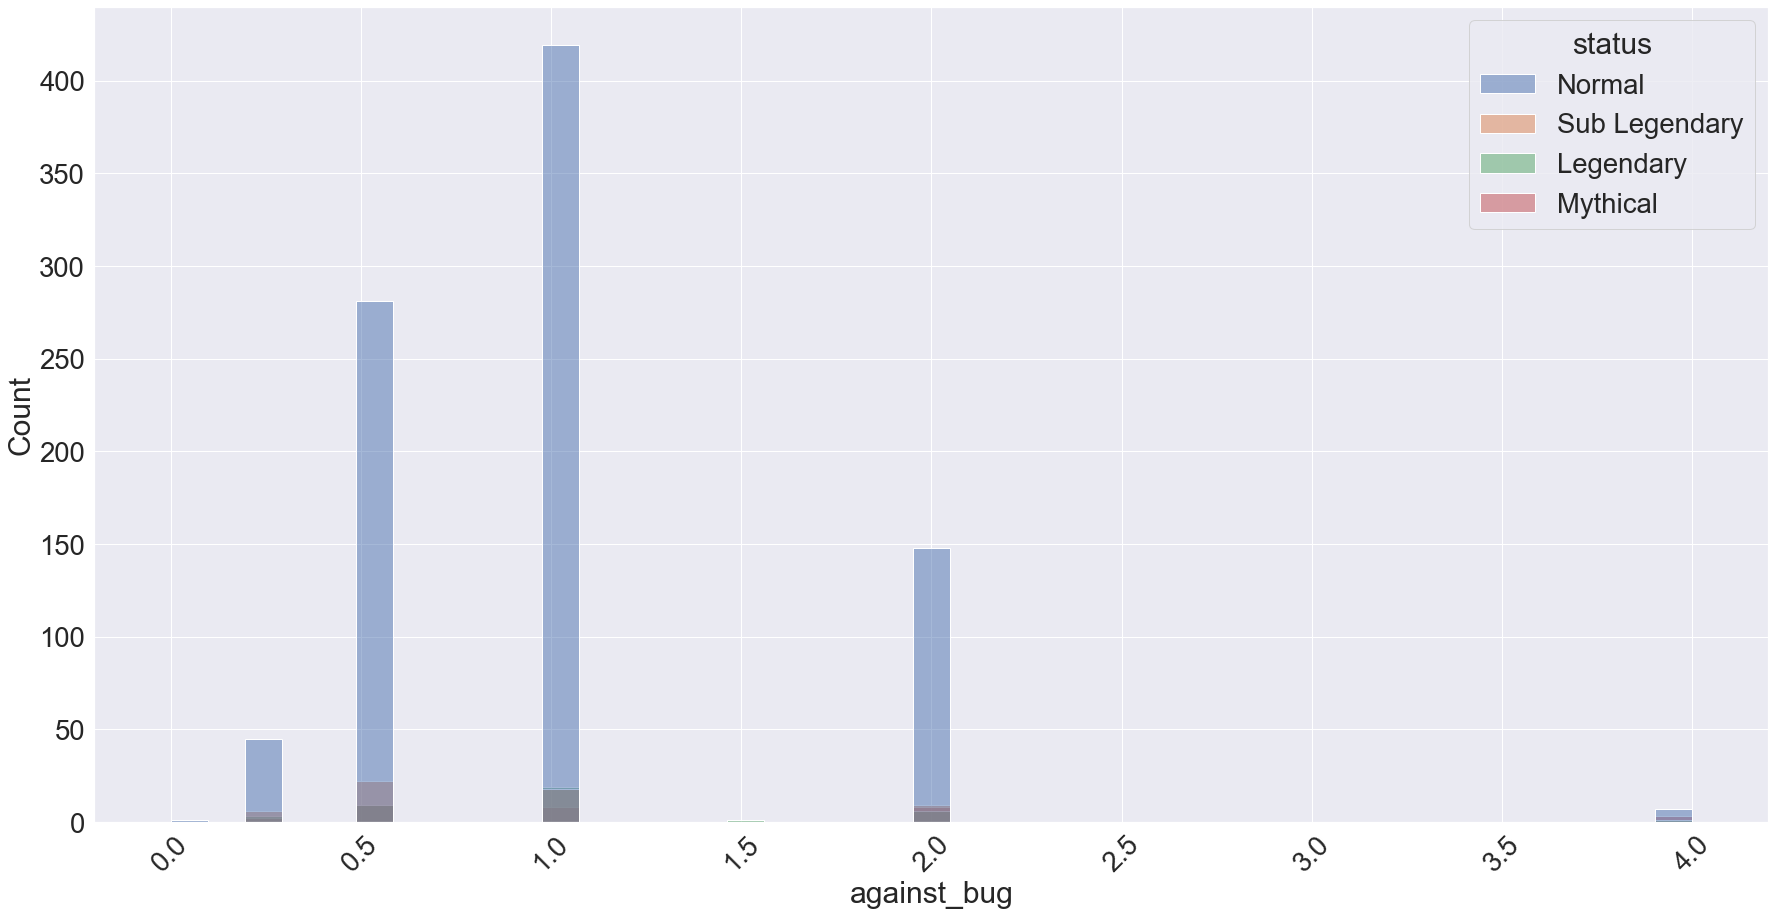

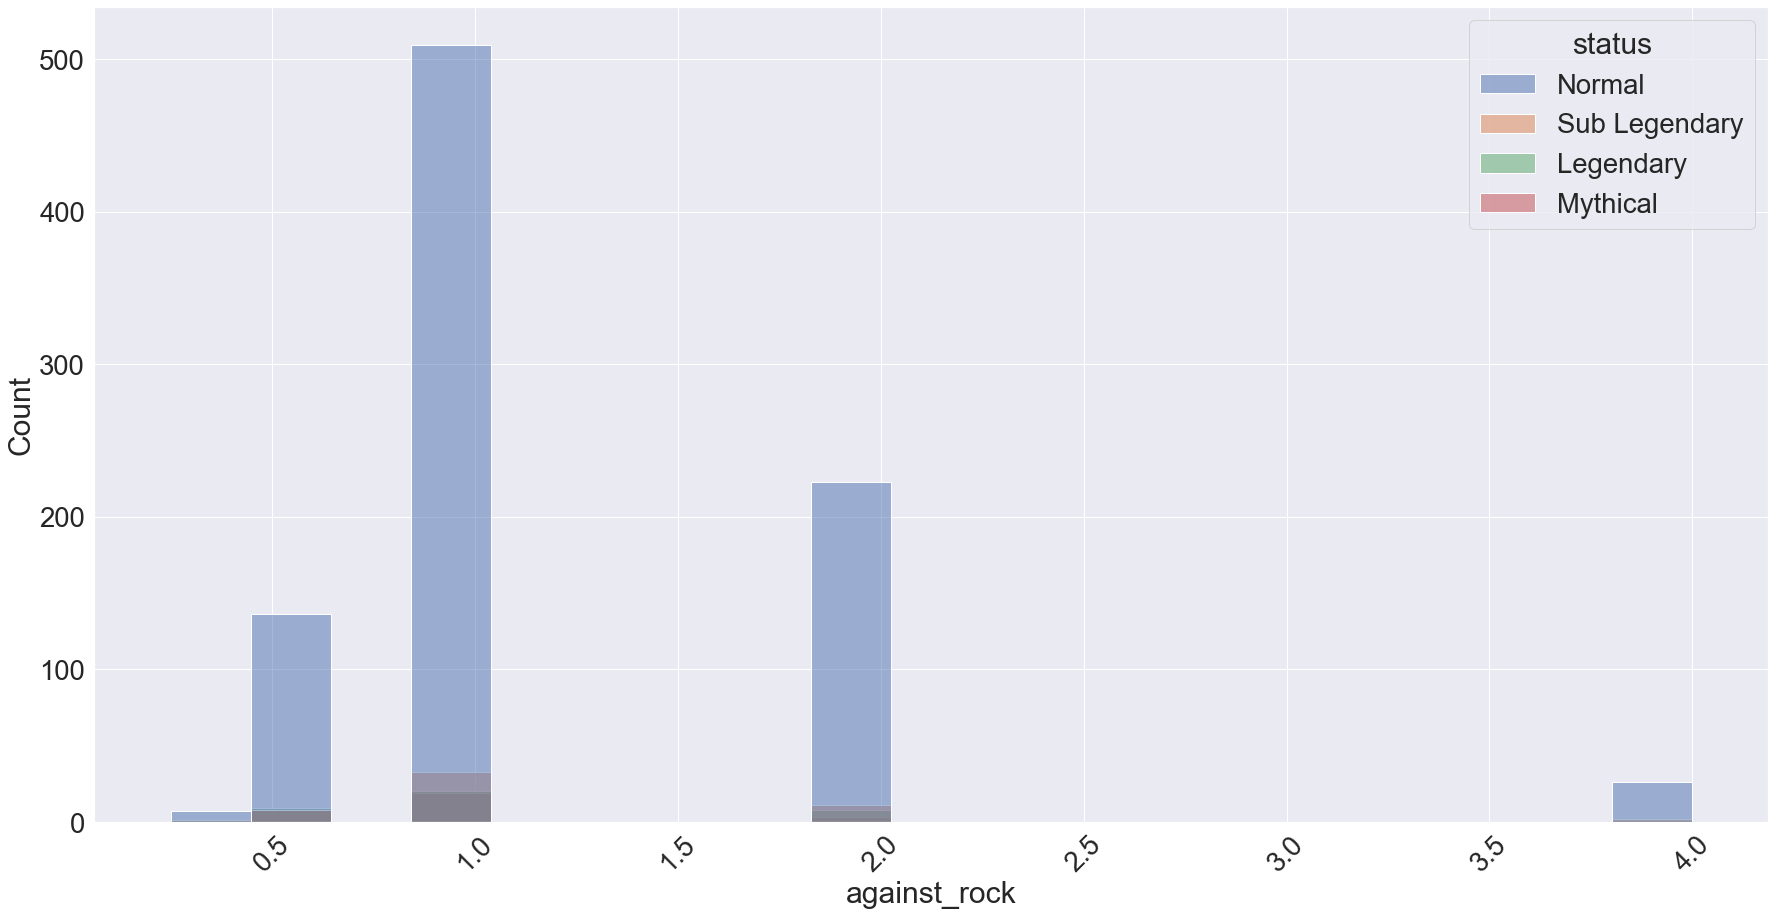

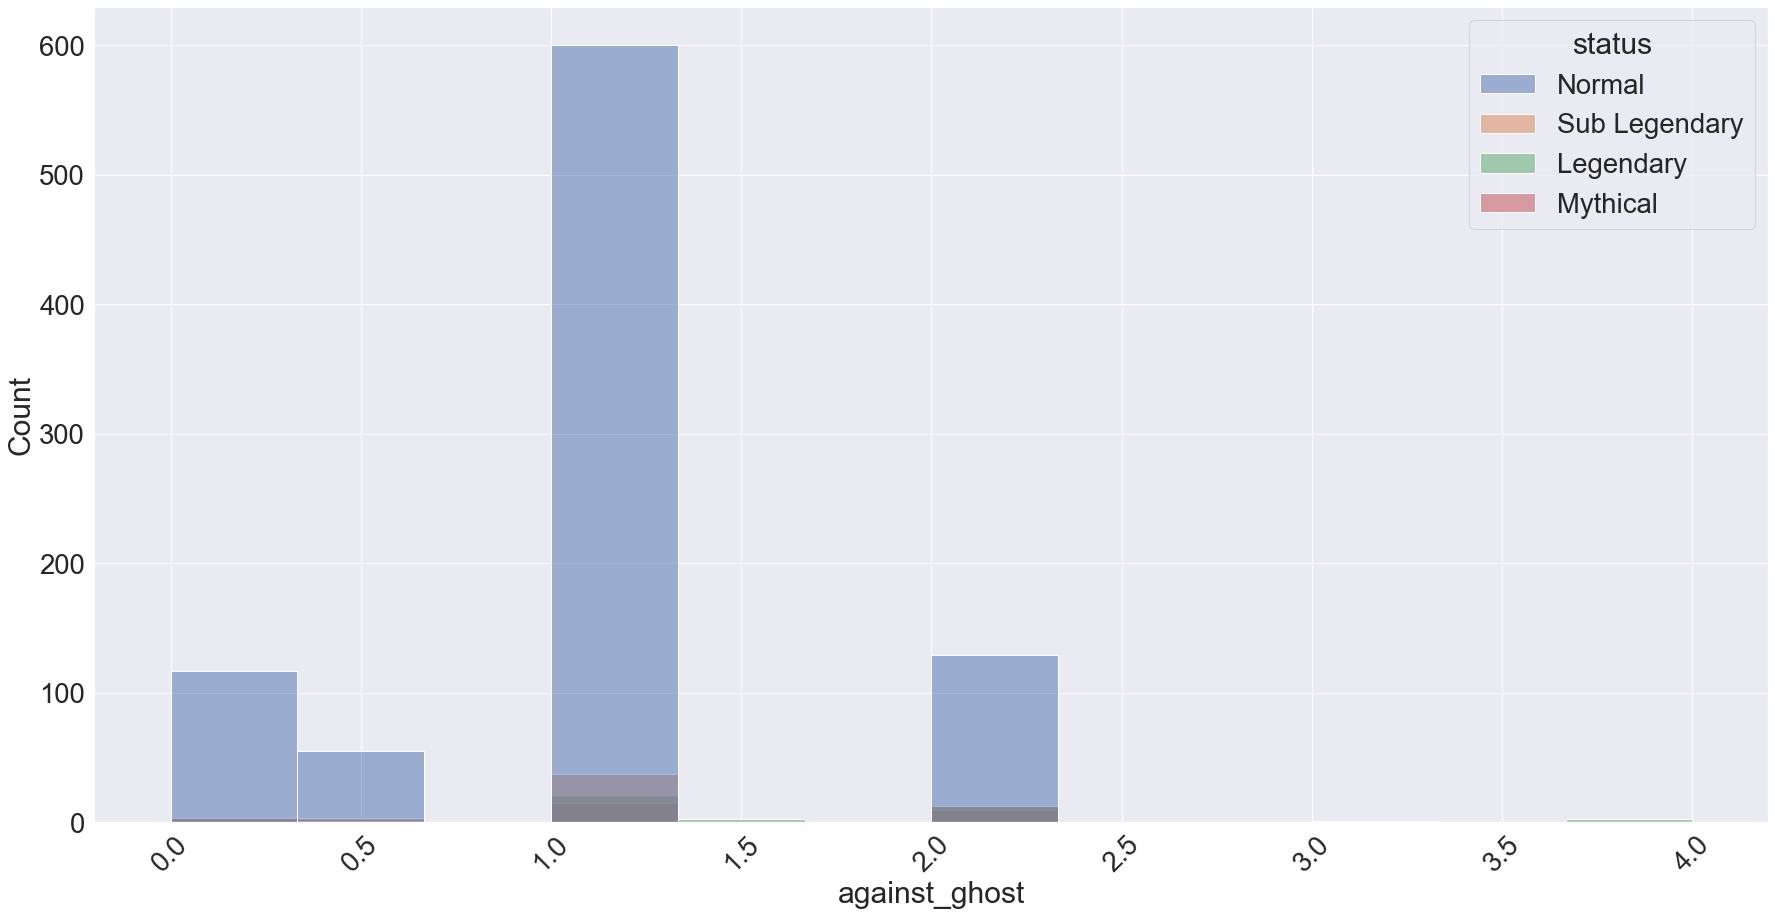

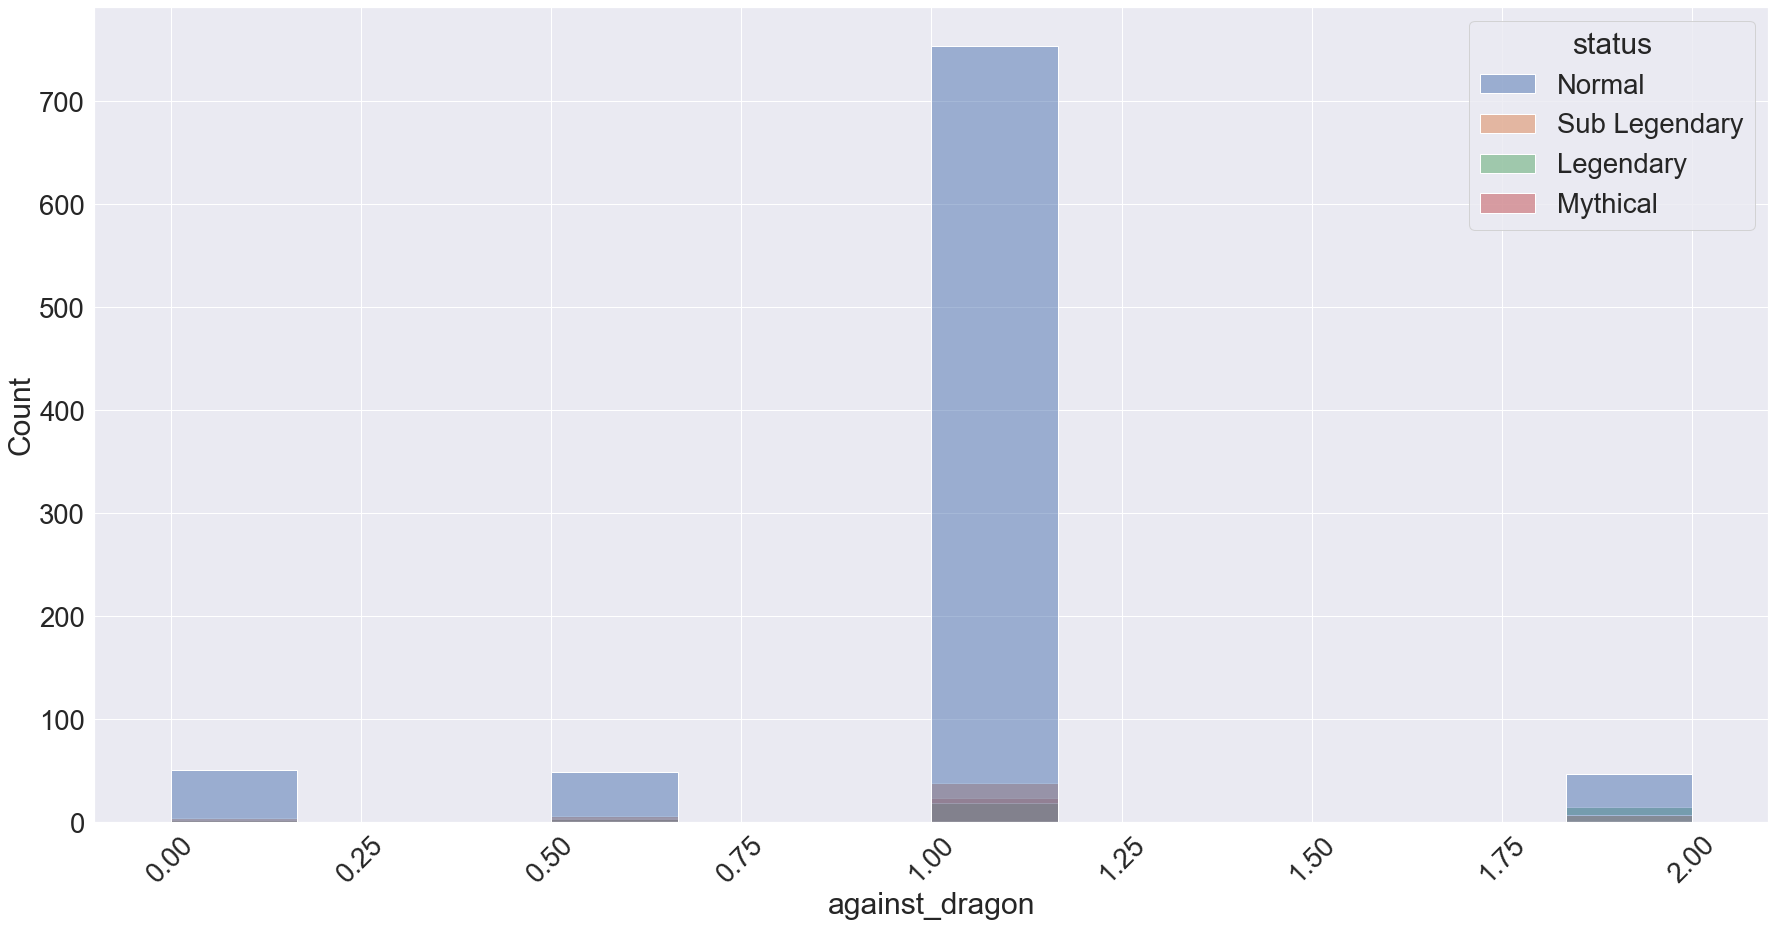

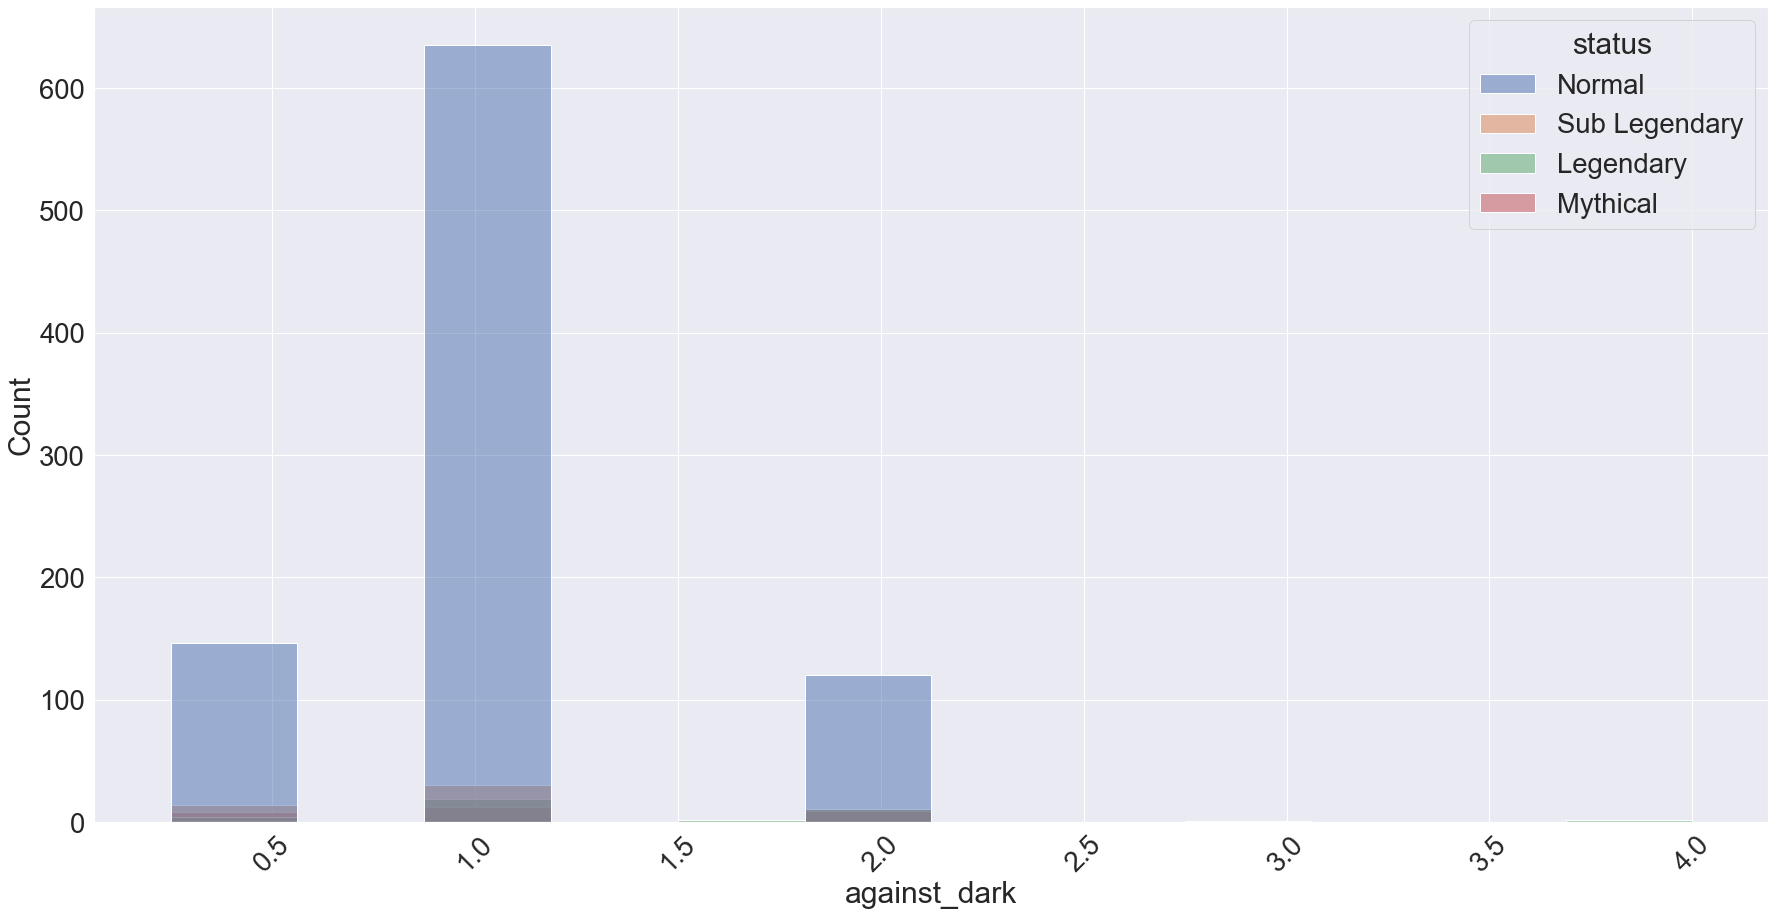

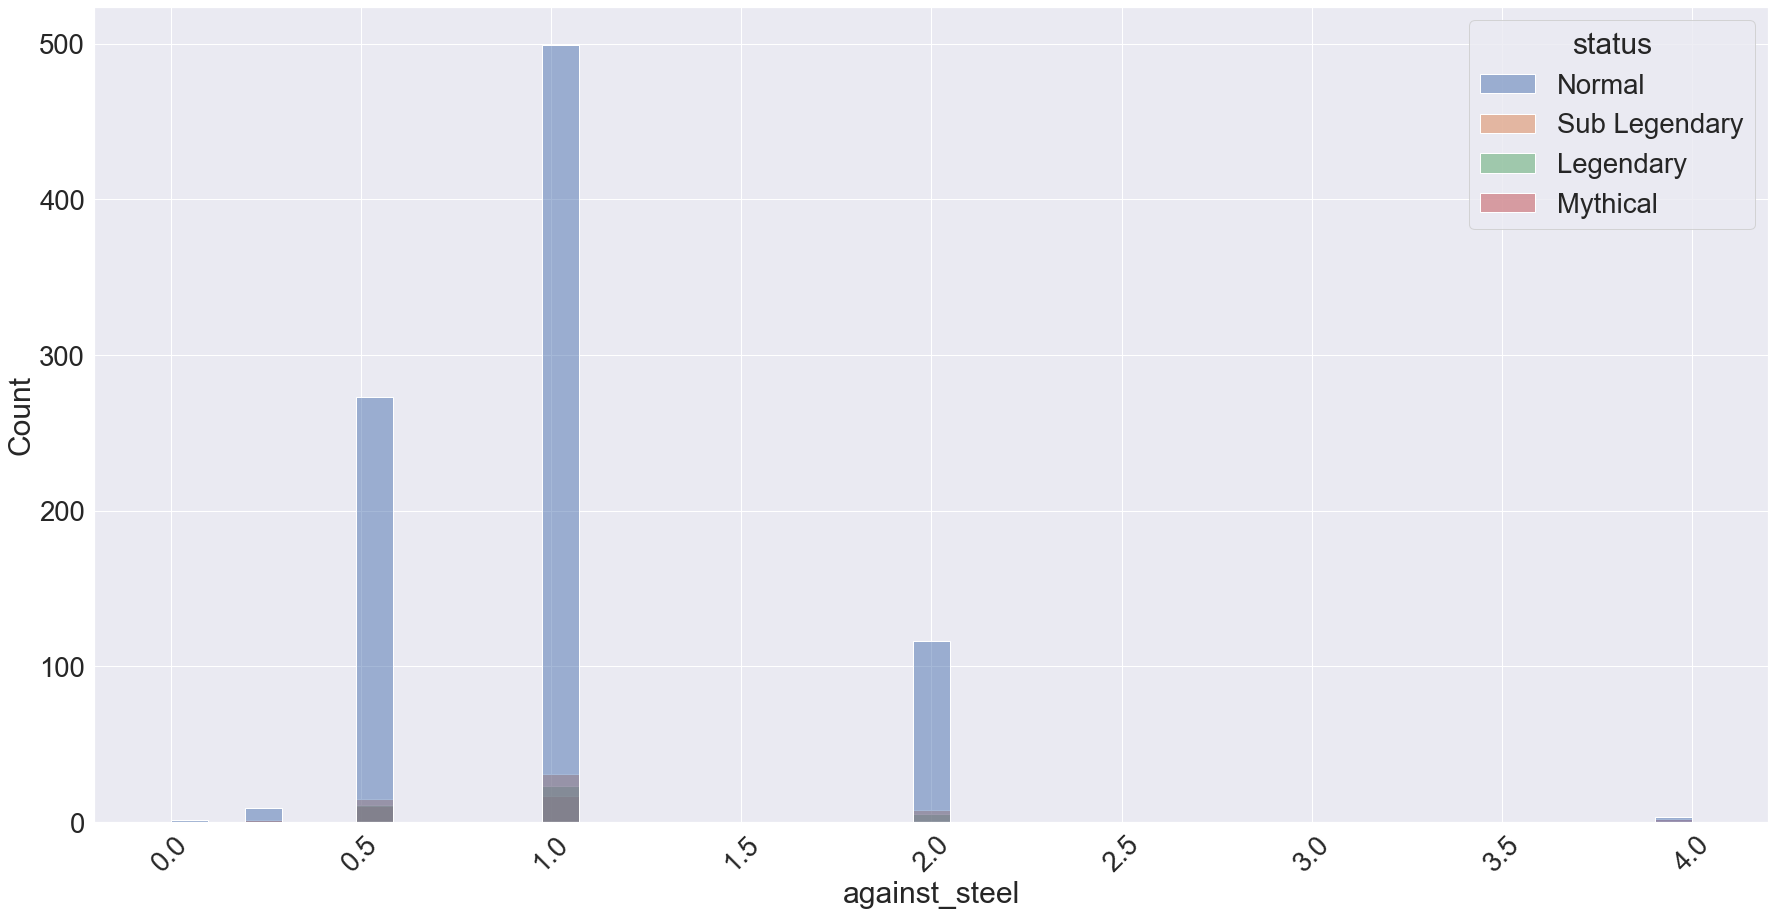

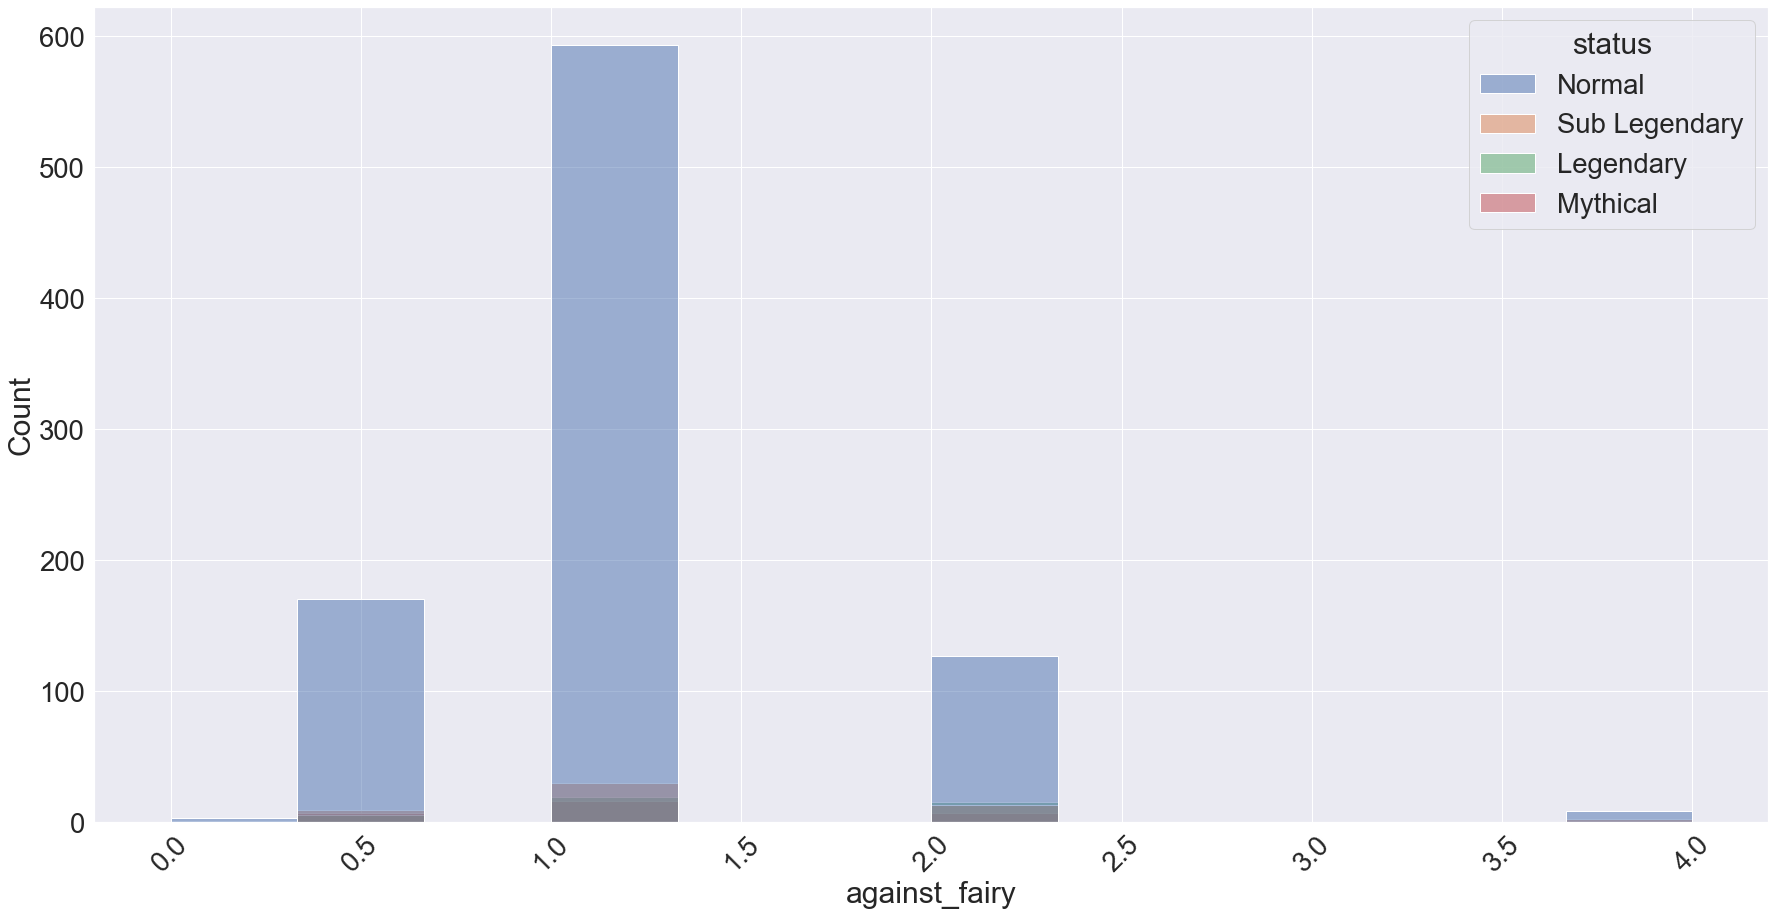

In [16]:
column_hist_plots()

# About this file
This file contains information about 1045 pokemon (including varieties). The information is sorted in different groups:

### Pokedex Data:
- `pokedex_number`: The entry number of the Pokemon in the National Pokedex
- `name`: The English name of the Pokemon
- `generation: The numbered generation which the Pokemon was first introduced
- `status`: Denotes if the Pokemon is normal, legendary, or mythical.
- `species`: The Categorie of the Pokemon
- `type_number`: Number of types that the Pokemon has
- `type_1`: The Primary Type of the Pokemon
- `type_2`: The Secondary Type of the Pokemon if it has it
- `height_m`: Height of the Pokemon in meters
- `weight_kg`: The Weight of the Pokemon in kilograms
- `abilities_number`: The number of abilities of the Pokemon
- `ability_`?: Name of the Pokemon abilities
- `ability_hidden`: Name of the hidden ability of the Pokemon if it has one
## Base stats:
- `total_points`: Total number of Base Points
- `hp`: The Base HP of the Pokemon
- `attack`: The Base Attack of the Pokemon
- `defense`: The Base Defense of the Pokemon
- `sp_attack`: The Base Special Attack of the Pokemon
- `sp_defense`: The Base Special Defense of the Pokemon
- `speed`: The Base Speed of the Pokemon
### Training:
- `catch_rate`: Catch Rate of the Pokemon
- `base_friendship`: The Base Friendship of the Pokemon
- `base_experience`: The Base experience of a wild Pokemon when caught
- `growth_rate`: The Growth Rate of the Pokemon
### Breeding:
- `eggtypenumber`: Number of groups where a Pokemon can hatch
- `eggtype?`: Names of the egg groups where a Pokemon can hatch
- `percentage_male`: The percentage of the species that are male. Blank if the Pokemon is genderless.
- `egg_cycles`: The number of cycles (255-257 steps) required to hatch an egg of the Pokemon
### Type defenses:
- `against_?`: Eighteen features that denote the amount of damage taken against an attack of a particular type

In [17]:
poke_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1025 entries, 0 to 1044
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pokedex_number    1025 non-null   int64  
 1   name              1025 non-null   object 
 2   generation        1025 non-null   int64  
 3   status            1025 non-null   object 
 4   species           1025 non-null   object 
 5   type_number       1025 non-null   int64  
 6   type_1            1025 non-null   object 
 7   height_m          1025 non-null   float64
 8   weight_kg         1025 non-null   float64
 9   abilities_number  1025 non-null   int64  
 10  ability_1         1025 non-null   object 
 11  total_points      1025 non-null   int64  
 12  hp                1025 non-null   int64  
 13  attack            1025 non-null   int64  
 14  defense           1025 non-null   int64  
 15  sp_attack         1025 non-null   int64  
 16  sp_defense        1025 non-null   int64  


# Splitting the data